In [65]:
! pip install kaleido==0.1.0post1

In [66]:
from IPython.display import Image

In [67]:
import plotly.express as px
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from scipy import ndimage
from skimage.transform import resize

import sys

import sqlite3

In [68]:
#WRITING THE DATA TO CSV FILE
billiboard_df = pd.read_csv('Billiboard_Data.csv')

In [69]:
df = pd.read_csv('spotify_singapore1.csv')

In [70]:
df.head()

,artist,popularity,track_uri,track,track_number,genre,release_date,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics
0,Lewis Capaldi,88,spotify:track:7qEHsqek33rTcFNT9PFqLf,Someone You Loved,4,pop,2019-05-17,182160,False,0.501,0.405,1,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,"\n\n[Verse 1]\nI'm going under, and this time,..."
1,Tones And I,87,spotify:track:2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,2,australian pop,2019-10-17,209438,False,0.824,0.588,6,-6.400,0.0924,0.69200,0.000104,0.1490,0.513,98.027,"[Verse 1]They say, ""Oh my God, I see the way y..."
2,The Weeknd,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,9,canadian pop,2020-03-20,200040,False,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,\n\n[Intro]\nYeah\n\n[Verse 1]\nI've been tryn...
3,Maroon 5,86,spotify:track:2b8fOow8UzyDFAE27YhOZM,Memories,1,pop,2019-09-20,189486,False,0.764,0.320,11,-7.209,0.0546,0.83700,0.000000,0.0822,0.575,91.019,\n\n[Chorus]\nHere's to the ones that we got\n...
4,Lewis Capaldi,82,spotify:track:7ce20yLkzuXXLUhzIDoZih,Before You Go,1,uk pop,2019-11-19,215106,False,0.459,0.575,3,-4.858,0.0573,0.60400,0.000000,0.0885,0.183,111.881,[Verse 1]I fell by the wayside like everyone e...


In [71]:
billiboard_df.head()

,Title,Artist
0,Blinding Lights,The Weeknd
1,Circles,Post Malone
2,The Box,Roddy Ricch
3,Don't Start Now,Dua Lipa
4,Rockstar,DaBaby featuring Roddy Ricch


In [72]:
#Dropping "track uri"
df=df.drop(columns=["track_uri"])

In [73]:
#Cleaned Spotify w/o track uri
df.head()

,artist,popularity,track,track_number,genre,release_date,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics
0,Lewis Capaldi,88,Someone You Loved,4,pop,2019-05-17,182160,False,0.501,0.405,1,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,"\n\n[Verse 1]\nI'm going under, and this time,..."
1,Tones And I,87,Dance Monkey,2,australian pop,2019-10-17,209438,False,0.824,0.588,6,-6.400,0.0924,0.69200,0.000104,0.1490,0.513,98.027,"[Verse 1]They say, ""Oh my God, I see the way y..."
2,The Weeknd,95,Blinding Lights,9,canadian pop,2020-03-20,200040,False,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,\n\n[Intro]\nYeah\n\n[Verse 1]\nI've been tryn...
3,Maroon 5,86,Memories,1,pop,2019-09-20,189486,False,0.764,0.320,11,-7.209,0.0546,0.83700,0.000000,0.0822,0.575,91.019,\n\n[Chorus]\nHere's to the ones that we got\n...
4,Lewis Capaldi,82,Before You Go,1,uk pop,2019-11-19,215106,False,0.459,0.575,3,-4.858,0.0573,0.60400,0.000000,0.0885,0.183,111.881,[Verse 1]I fell by the wayside like everyone e...


In [74]:
## Sorted most popular tracks

df=df.sort_values('popularity', ascending = False)

df.head(10)

,artist,popularity,track,track_number,genre,release_date,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics
2,The Weeknd,95,Blinding Lights,9,canadian pop,2020-03-20,200040,False,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,\n\n[Intro]\nYeah\n\n[Verse 1]\nI've been tryn...
30,Tate McRae,91,you broke me first,1,pop,2020-04-17,169265,False,0.642,0.374,4,-9.386,0.0545,0.78600,0.000000,0.0906,0.0799,124.099,[Intro]You broke me first[Verse 1]Maybe you do...
26,Conan Gray,89,Heather,10,indie pop,2020-03-20,198040,False,0.357,0.425,5,-7.301,0.0333,0.58400,0.000000,0.3220,0.2700,102.078,"\n\n[Verse 1]\nI still remember, third of Dece..."
20,Harry Styles,89,Watermelon Sugar,2,post-teen pop,2019-12-13,174000,False,0.548,0.816,0,-4.209,0.0465,0.12200,0.000000,0.3350,0.5570,95.390,[Verse 1]Tastes like strawberries on a summer ...
0,Lewis Capaldi,88,Someone You Loved,4,pop,2019-05-17,182160,False,0.501,0.405,1,-5.679,0.0319,0.75100,0.000000,0.1050,0.4460,109.891,"\n\n[Verse 1]\nI'm going under, and this time,..."
10,Powfu,87,death bed (coffee for your head),1,sad rap,2020-02-08,173333,False,0.726,0.431,8,-8.765,0.1350,0.73100,0.000000,0.6960,0.3480,144.026,Unavailable
37,SAINt JHN,87,Roses - Imanbek Remix,1,melodic rap,2019-10-09,176840,True,0.770,0.724,8,-5.484,0.0495,0.01670,0.010700,0.3530,0.8980,121.975,Unavailable
1,Tones And I,87,Dance Monkey,2,australian pop,2019-10-17,209438,False,0.824,0.588,6,-6.400,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,"[Verse 1]They say, ""Oh my God, I see the way y..."
25,Roddy Ricch,87,The Box,2,trap,2019-12-06,196652,True,0.896,0.586,10,-6.687,0.0559,0.10400,0.000000,0.7900,0.6420,116.971,[Chorus]Pullin' out the coupe at the lotTold '...
8,Post Malone,87,Circles,6,melodic rap,2019-09-06,215280,False,0.695,0.762,0,-3.497,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,"[Intro]Oh, oh, ohOh, oh, ohOh, oh, oh, oh, o..."


The above list shows the **Top 10 most Popular Songs on Spotify in Singapore in 2020**, with the The Weekend, Tate McRae and Conan Gray as the top 3 songs


### Comparison of Top Spotify Singapore against Top Billboard US

In [75]:
## Popular Tracks in Singapore which are also in Billiboard chart

df_top50_track = df[df['track'].isin(billiboard_df['Title'])]

df_top50_track.head()

,artist,popularity,track,track_number,genre,release_date,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics
2,The Weeknd,95,Blinding Lights,9,canadian pop,2020-03-20,200040,False,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,\n\n[Intro]\nYeah\n\n[Verse 1]\nI've been tryn...
20,Harry Styles,89,Watermelon Sugar,2,post-teen pop,2019-12-13,174000,False,0.548,0.816,0,-4.209,0.0465,0.12200,0.000000,0.3350,0.557,95.390,[Verse 1]Tastes like strawberries on a summer ...
0,Lewis Capaldi,88,Someone You Loved,4,pop,2019-05-17,182160,False,0.501,0.405,1,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,"\n\n[Verse 1]\nI'm going under, and this time,..."
1,Tones And I,87,Dance Monkey,2,australian pop,2019-10-17,209438,False,0.824,0.588,6,-6.400,0.0924,0.69200,0.000104,0.1490,0.513,98.027,"[Verse 1]They say, ""Oh my God, I see the way y..."
25,Roddy Ricch,87,The Box,2,trap,2019-12-06,196652,True,0.896,0.586,10,-6.687,0.0559,0.10400,0.000000,0.7900,0.642,116.971,[Chorus]Pullin' out the coupe at the lotTold '...


In [76]:
df_top50_track.describe()

,popularity,track_number,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,83.235294,2.823529,197318.705882,0.709412,0.614471,6.058824,-5.629471,0.063476,0.271980,0.000158,0.156647,0.542529,116.477353
std,7.276069,2.270333,21020.458718,0.130869,0.147213,4.307995,1.503645,0.033012,0.279625,0.000589,0.173591,0.187498,19.867437
min,61.000000,1.000000,159381.000000,0.459000,0.320000,0.000000,-8.756000,0.028700,0.001460,0.000000,0.082200,0.183000,91.019000
25%,82.000000,1.000000,183290.000000,0.676000,0.540000,1.000000,-6.652000,0.039500,0.037000,0.000000,0.089700,0.446000,99.048000
50%,84.000000,2.000000,199053.000000,0.759000,0.588000,7.000000,-5.679000,0.054600,0.192000,0.000000,0.095100,0.557000,114.044000
75%,87.000000,4.000000,209438.000000,0.787000,0.762000,10.000000,-4.521000,0.083000,0.345000,0.000007,0.123000,0.679000,123.950000
max,95.000000,9.000000,237893.000000,0.896000,0.816000,11.000000,-3.497000,0.158000,0.837000,0.002440,0.790000,0.817000,171.005000


In [77]:
## Popular Artists in SG which are also in Billiboard US

df_top50 = df[df['artist'].isin(billiboard_df['Artist'])]

df_top50

,artist,popularity,track,track_number,genre,release_date,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics
2,The Weeknd,95,Blinding Lights,9,canadian pop,2020-03-20,200040,False,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,\n\n[Intro]\nYeah\n\n[Verse 1]\nI've been tryn...
20,Harry Styles,89,Watermelon Sugar,2,post-teen pop,2019-12-13,174000,False,0.548,0.816,0,-4.209,0.0465,0.12200,0.000000,0.3350,0.557,95.390,[Verse 1]Tastes like strawberries on a summer ...
0,Lewis Capaldi,88,Someone You Loved,4,pop,2019-05-17,182160,False,0.501,0.405,1,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,"\n\n[Verse 1]\nI'm going under, and this time,..."
25,Roddy Ricch,87,The Box,2,trap,2019-12-06,196652,True,0.896,0.586,10,-6.687,0.0559,0.10400,0.000000,0.7900,0.642,116.971,[Chorus]Pullin' out the coupe at the lotTold '...
8,Post Malone,87,Circles,6,melodic rap,2019-09-06,215280,False,0.695,0.762,0,-3.497,0.0395,0.19200,0.002440,0.0863,0.553,120.042,"[Intro]Oh, oh, ohOh, oh, ohOh, oh, oh, oh, o..."
3,Maroon 5,86,Memories,1,pop,2019-09-20,189486,False,0.764,0.320,11,-7.209,0.0546,0.83700,0.000000,0.0822,0.575,91.019,\n\n[Chorus]\nHere's to the ones that we got\n...
46,Harry Styles,85,Adore You,3,post-teen pop,2019-12-13,207133,False,0.676,0.771,8,-3.675,0.0483,0.02370,0.000007,0.1020,0.569,99.048,\n\n[Verse 1: Harry Styles]\nWalk in your rain...
34,Billie Eilish,84,everything i wanted,1,electropop,2019-11-13,245425,False,0.704,0.225,6,-14.454,0.0994,0.90200,0.657000,0.1060,0.243,120.006,[Verse 1]I had a dreamI got everything I wante...
16,Arizona Zervas,84,ROXANNE,1,pop rap,2019-10-10,163636,True,0.621,0.601,6,-5.616,0.1480,0.05220,0.000000,0.4600,0.457,116.735,\n\n[Intro]\nAll for the 'Gram\nBitches love t...
15,Doja Cat,84,Say So,5,dance pop,2019-11-07,237893,True,0.787,0.673,11,-4.577,0.1580,0.25600,0.000004,0.0904,0.786,110.962,"\n\n[Chorus]\nDay to night to morning, keep wi..."


In [78]:
df_top50.describe()

,popularity,track_number,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,82.105263,3.052632,196884.789474,0.698316,0.602421,6.210526,-6.151000,0.071779,0.269429,0.034713,0.169889,0.537316,118.573895
std,8.095916,2.391505,26288.546631,0.125223,0.176903,4.223992,2.477188,0.036188,0.289100,0.150695,0.179482,0.202462,19.397248
min,61.000000,1.000000,158571.000000,0.459000,0.225000,0.000000,-14.454000,0.031900,0.001460,0.000000,0.071400,0.183000,91.019000
25%,81.500000,1.000000,178080.000000,0.633000,0.515500,2.000000,-6.759500,0.047400,0.072250,0.000000,0.089200,0.397500,110.426500
50%,84.000000,2.000000,199053.000000,0.704000,0.586000,6.000000,-5.679000,0.057500,0.183000,0.000000,0.102000,0.557000,116.735000
75%,86.500000,4.500000,213986.000000,0.786000,0.763500,10.000000,-4.549000,0.096150,0.322500,0.000002,0.125000,0.686500,121.996000
max,95.000000,9.000000,245425.000000,0.896000,0.862000,11.000000,-3.497000,0.158000,0.902000,0.657000,0.790000,0.874000,171.005000


**Analysis**

From the above we can infer out of 50 Songs, at least **19 Songs** are similar when Singapore charts are compared with US Billboard Charts.

It can be said, that Singaporeans alike have a preference and inclination towards English Song and predominantly from North American or UK 

Correlation of Audio features of Top Tracks
List of Audio Features

**Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Danceability**: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

**Instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

<AxesSubplot:>

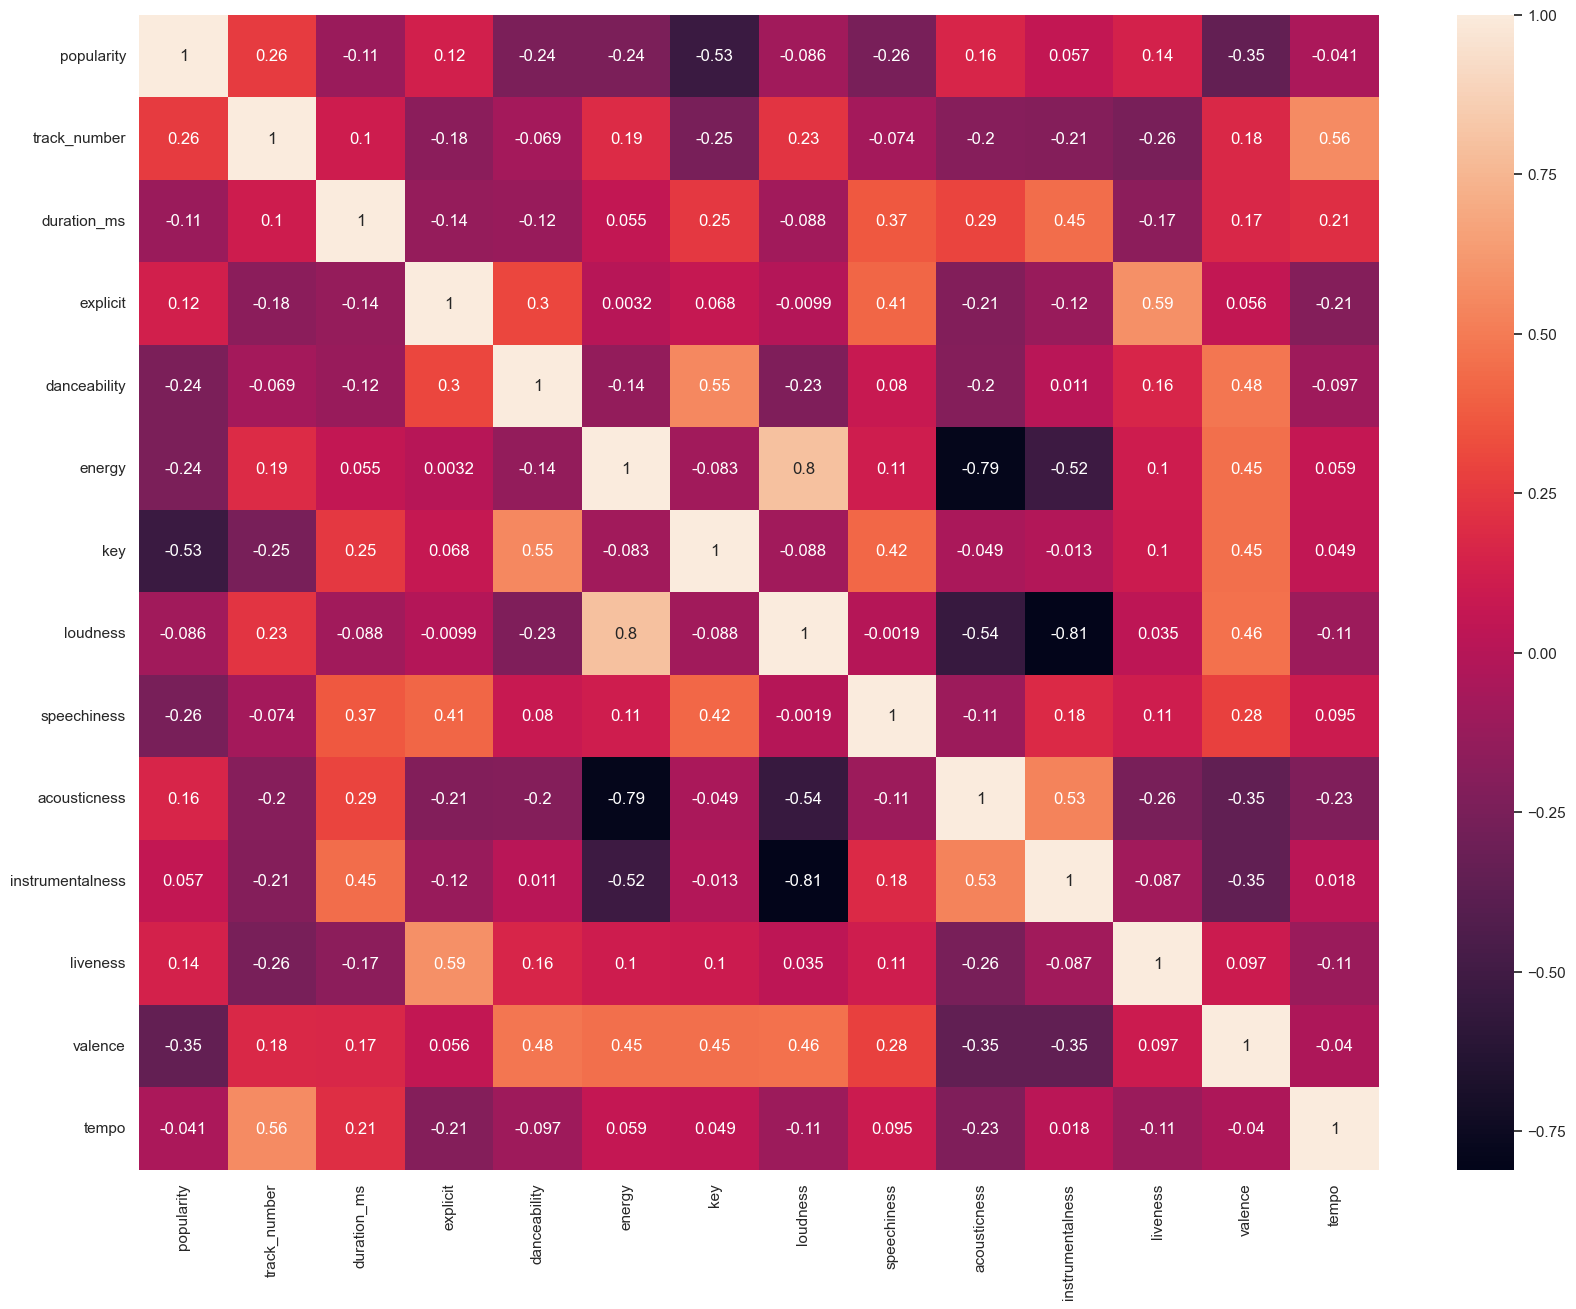

In [79]:
## Correlation among tracks' audio features with popularity of Top 50 

plt.figure(figsize=(20,15))
sns.heatmap(df_top50.corr(), annot=True)

Observation
We can see from heatmap that popularity has mostly a high correaltion with liveliness

However, we can see that given the definition of audio features as listed above, there is also a preference for songs with lower valence and energy as well.

While this may seem paradoxical, it has been cited by music critics that contemporary pop music is neither explicitly sad or happy, have lyrical ambivalence with an emotional grey edge overall

Further, during a year of lockdown songs with low valence but with energy were notably popular. Perhaps this was a sign of how people coped with the lockdown and solitude in 2020.

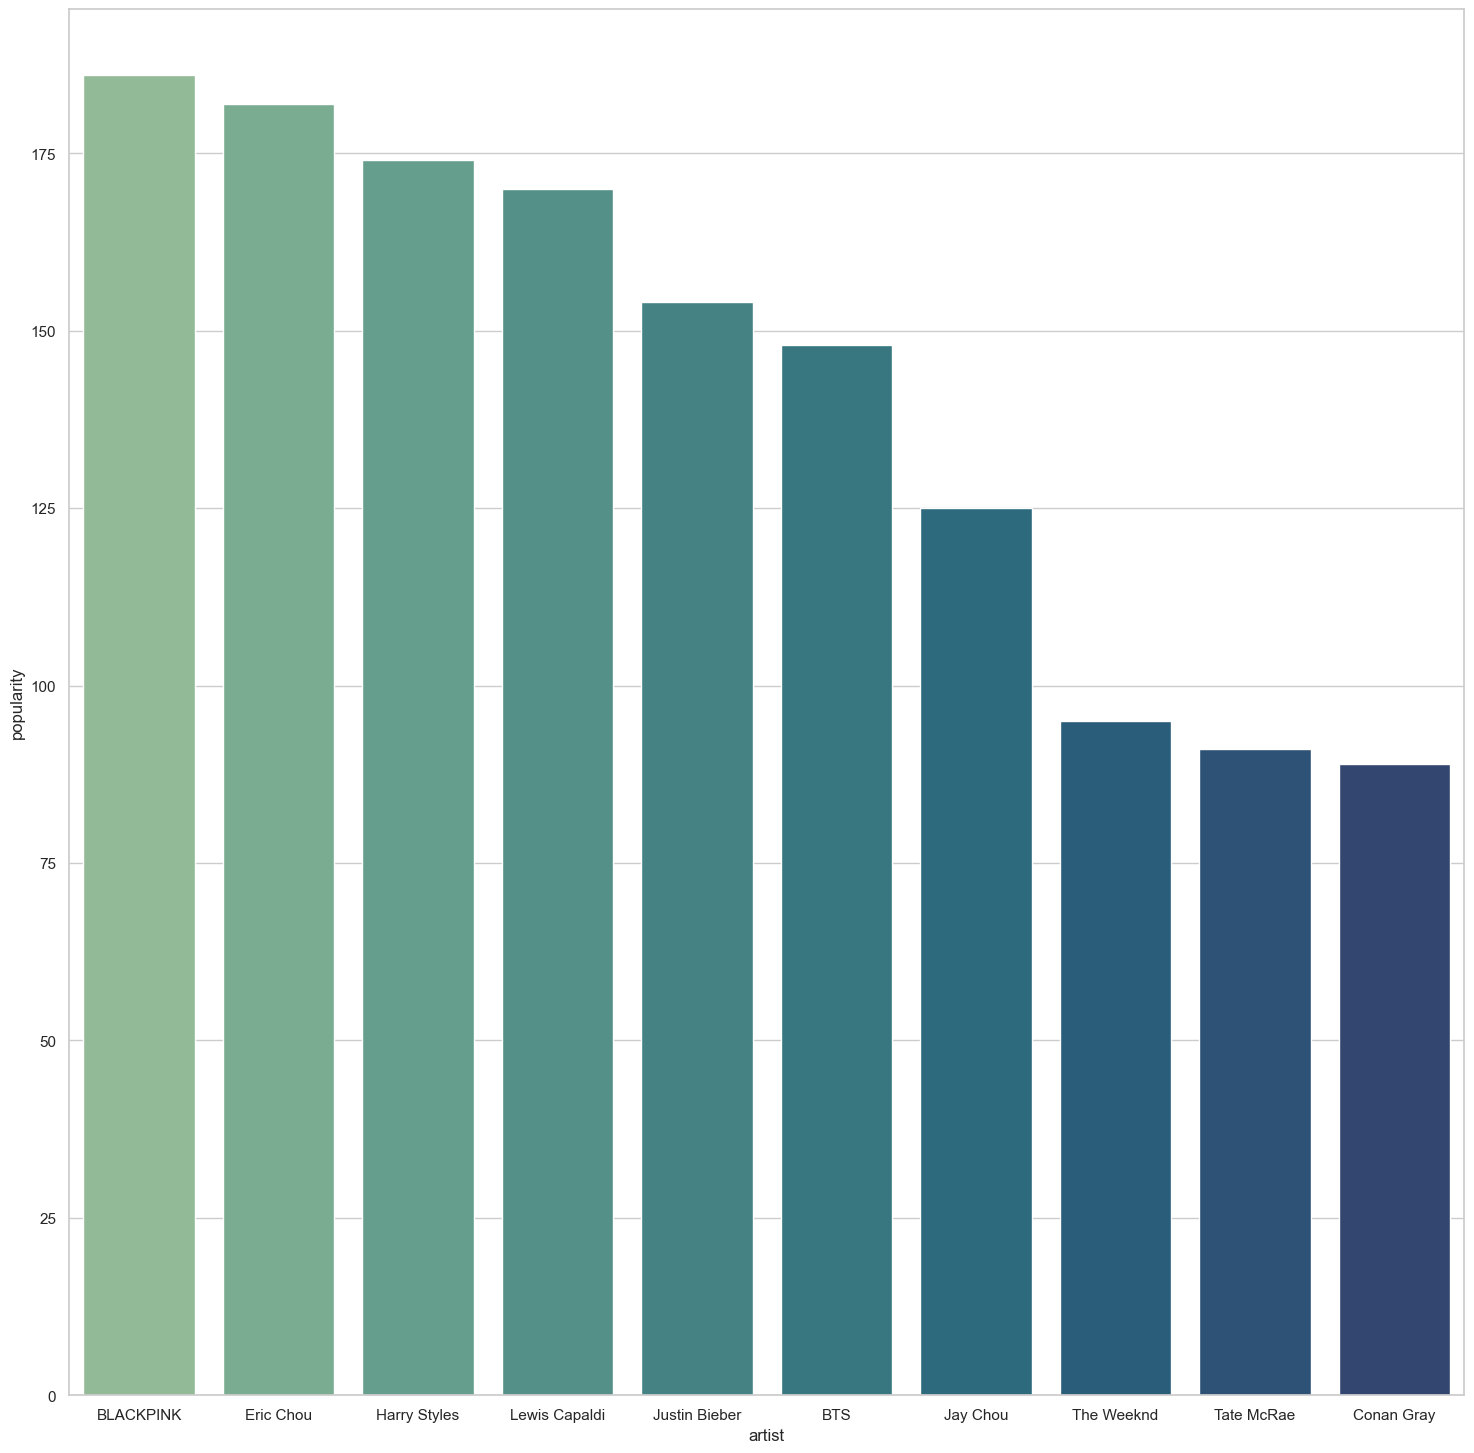

In [80]:
## Top 10 popular Artists

plt.figure(figsize=(18,18))
sns.set(style='whitegrid')
x = df.groupby('artist')['popularity'].sum().sort_values(ascending=False).head(10)
xg = x.to_frame()

xf = xg.reset_index()
ax = sns.barplot(xf, x = 'artist', y= 'popularity', palette= 'crest')

Observations
Despite the previously stated similarities between the West and Singapore, the most Popular Artists however still consisted of East Asian music such as Blackpink, Jay Chou and BTS

### Top 10 Tracks in Singapore in 2020

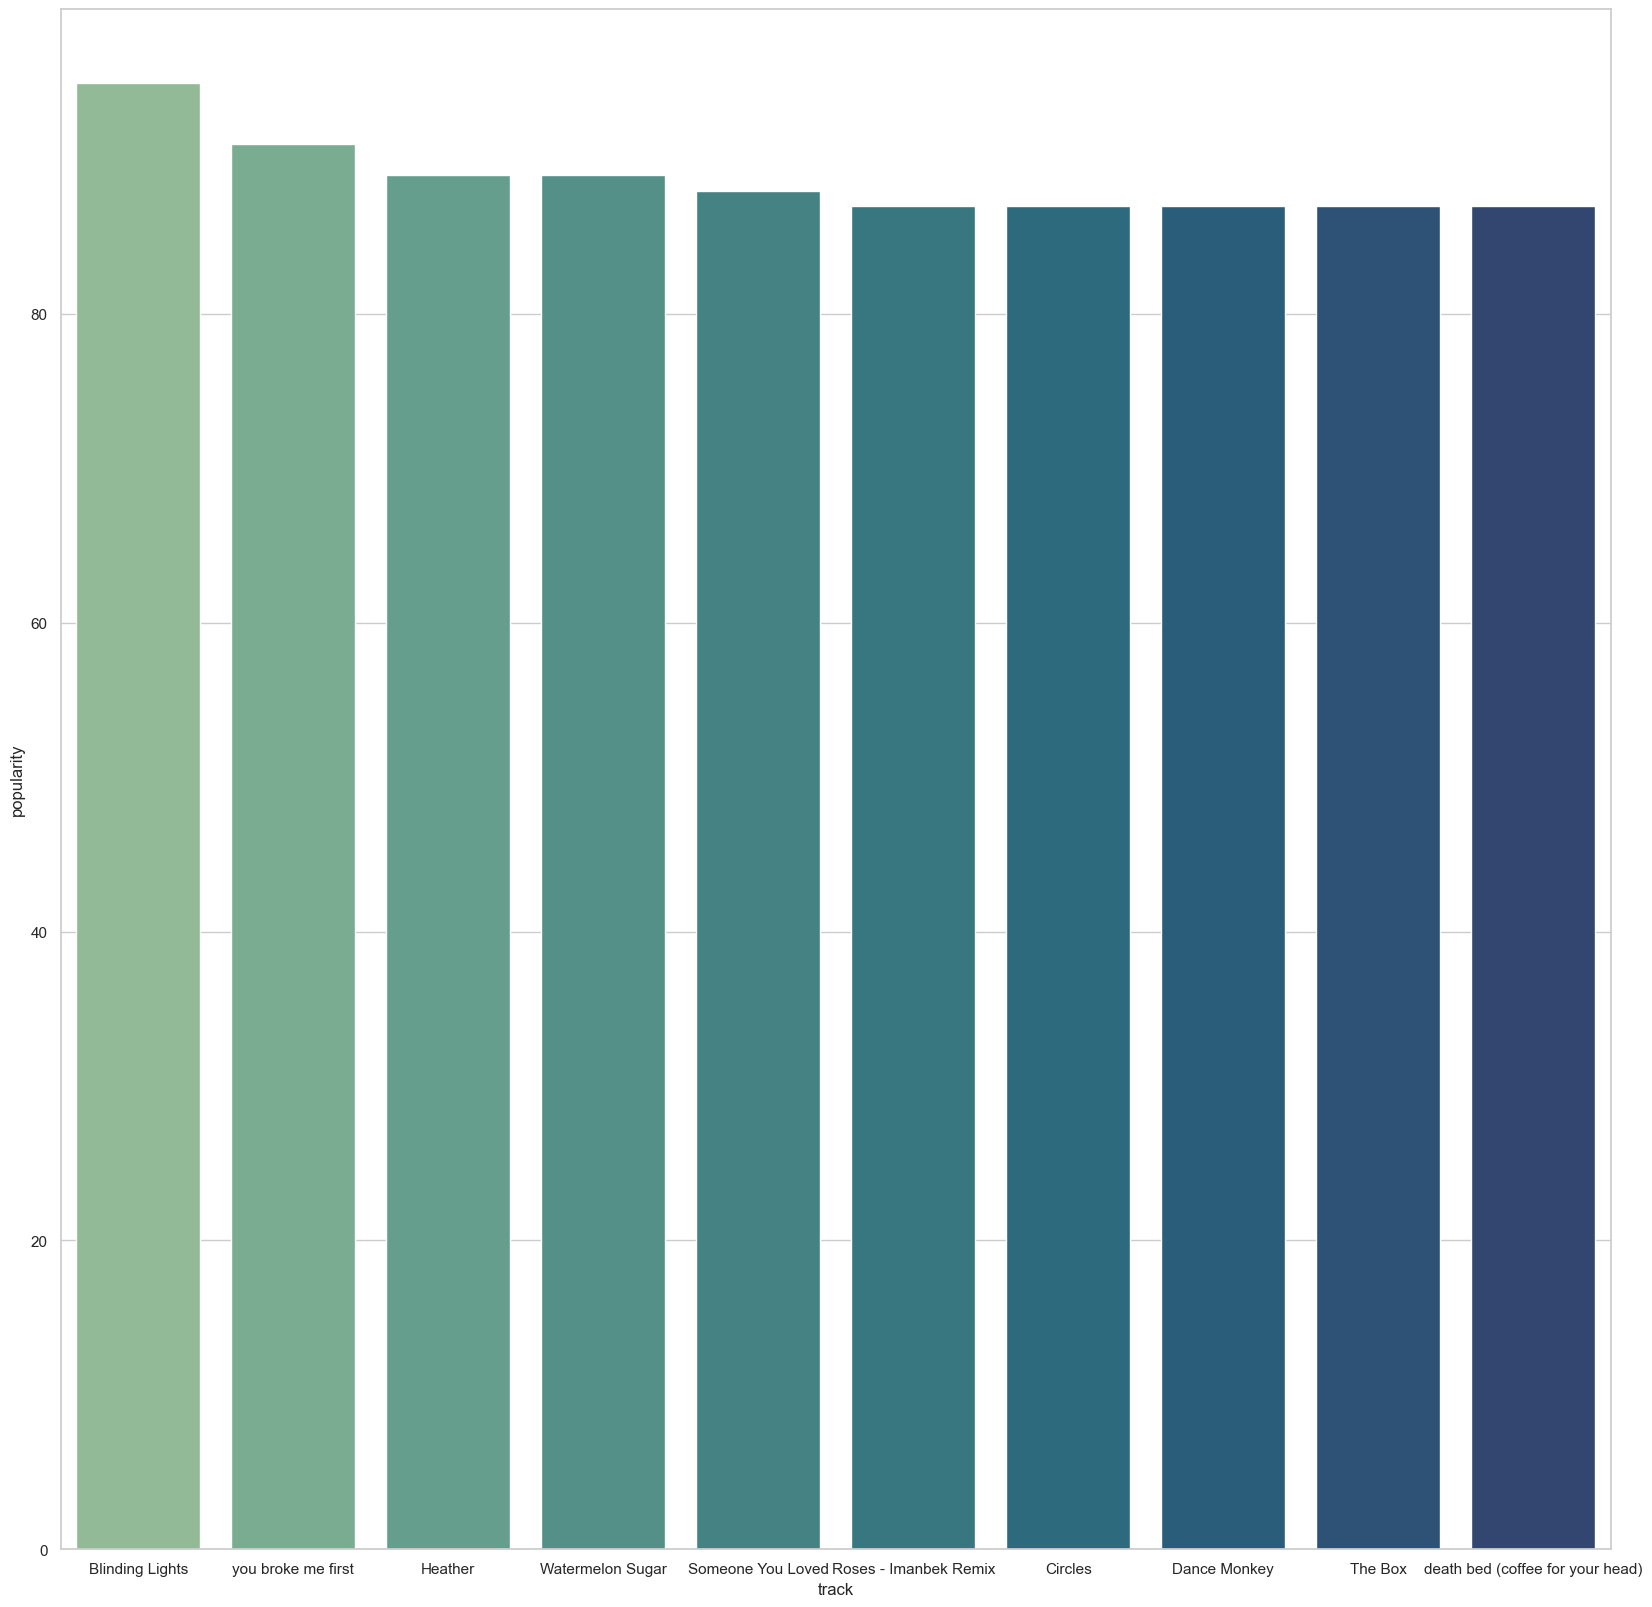

In [81]:
top_10_tracks = df.groupby('track')['popularity'].sum().sort_values(ascending=False).head(10)
top_10_tracks

plt.figure(figsize=(20,20))
sns.set(style='whitegrid')
xt = df.groupby('track')['popularity'].sum().sort_values(ascending=False).head(10).to_frame().reset_index()

ax = sns.barplot(xt, x = 'track', y= 'popularity', palette= 'crest')

### Observations

Similar songs as before were featured in the Top 10. However it is interesting to note, that despite a growing local music scene, local artists and songs were significantly absent - even though Spotify does feature Local Singaporean Artist playlist on its dashboard front page

### Release Dates of Top 10 Songs

In [82]:
release_dates = df.sort_values('popularity', ascending = False)

release_dates.drop(columns=['artist', 'popularity', 'track_number', 'genre',
       'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'lyrics']).head(10)

,track,release_date
2,Blinding Lights,2020-03-20
30,you broke me first,2020-04-17
26,Heather,2020-03-20
20,Watermelon Sugar,2019-12-13
0,Someone You Loved,2019-05-17
10,death bed (coffee for your head),2020-02-08
37,Roses - Imanbek Remix,2019-10-09
1,Dance Monkey,2019-10-17
25,The Box,2019-12-06
8,Circles,2019-09-06


**Observations**

Songs that were Popular were mainly from early 2020 and late 2019.

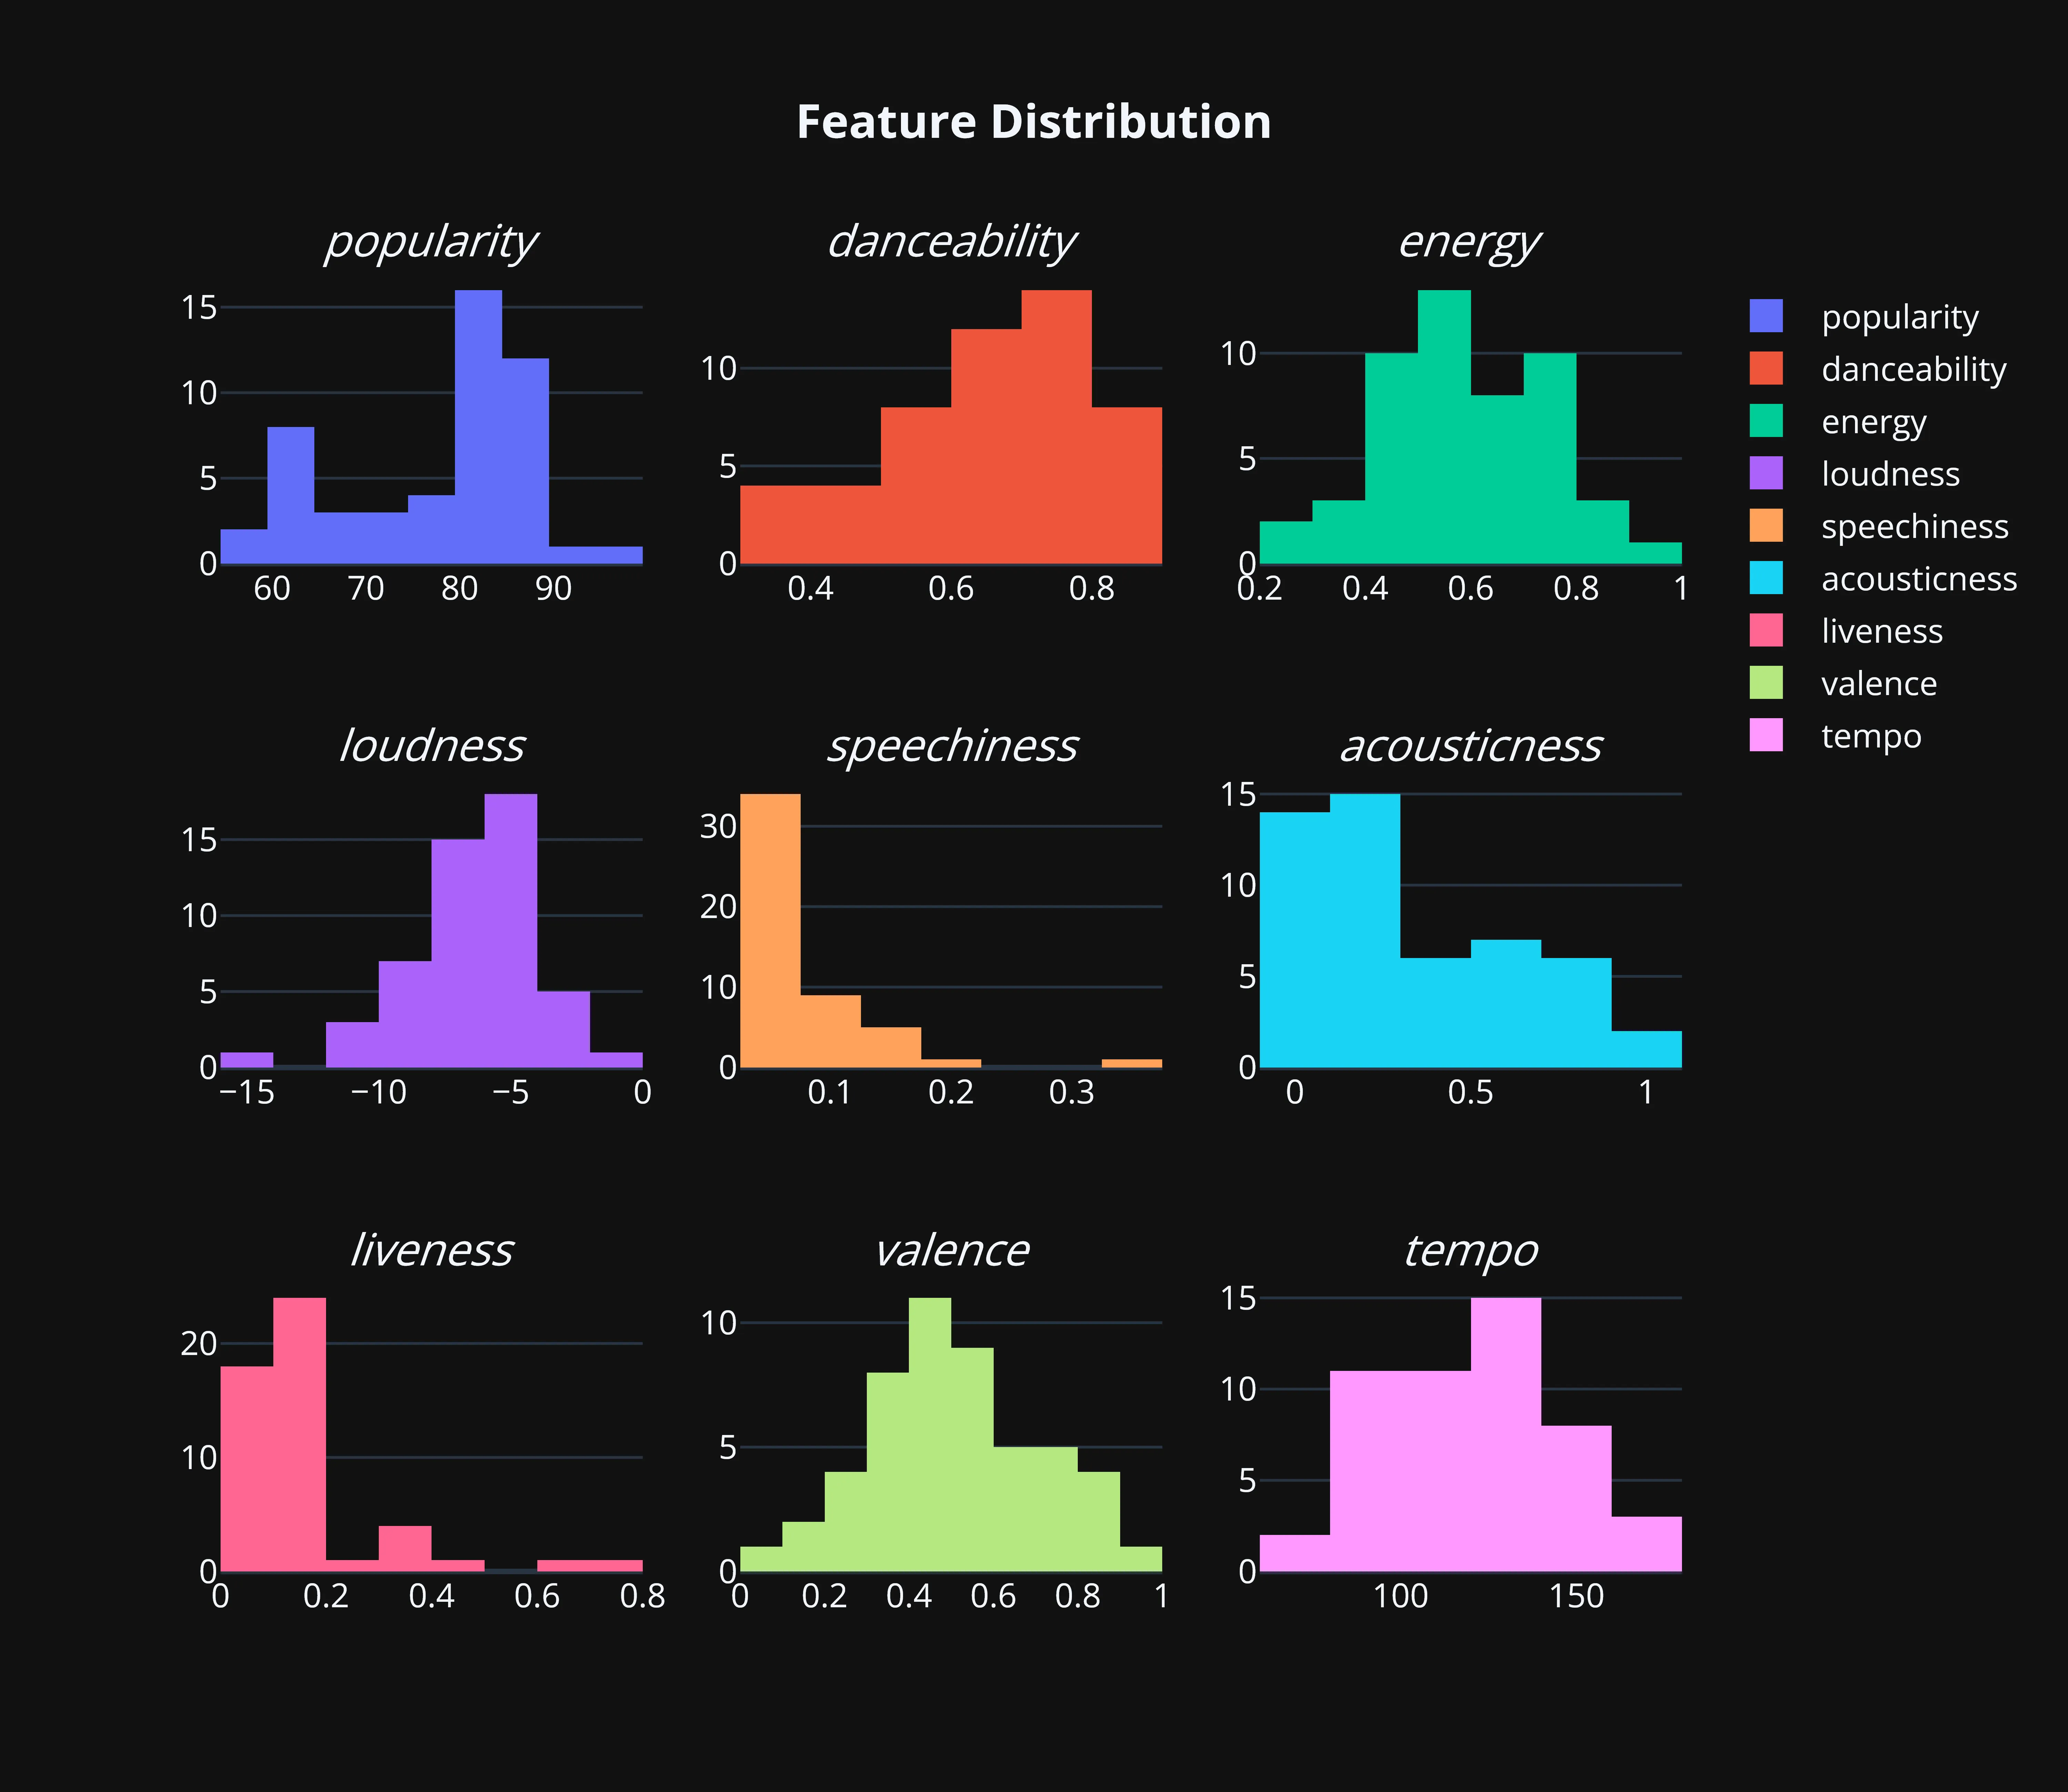

In [87]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig6=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig6.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig6.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig6.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig6.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig6.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig6.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig6.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig6.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig6.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig6.update_layout(height=600,width=600,title_text='<b>Feature Distribution')
fig6.update_layout(template='plotly_dark',title_x=0.5)

fig6_image = fig6.to_image(format="webp", width=750, height=650, scale=8)

Image(fig6_image)

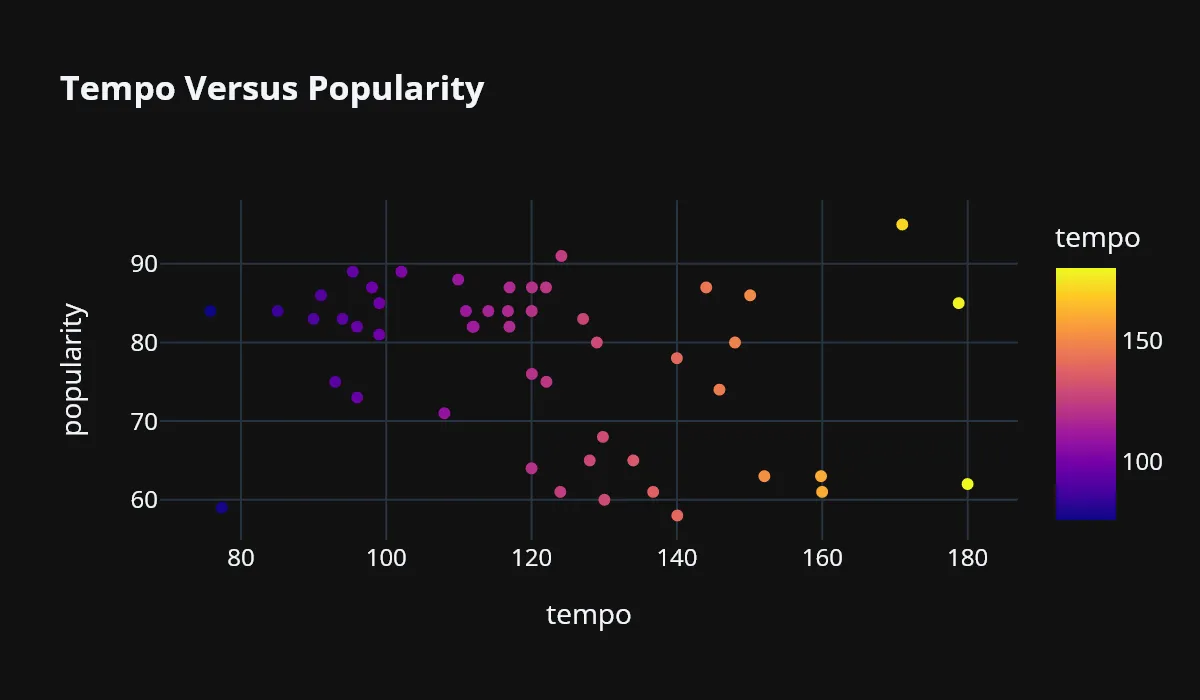

In [88]:
fig1 = px.scatter(df,x='tempo',y='popularity',color='tempo',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b>Tempo Versus Popularity')

import plotly.io as pio


fig1_image = fig1.to_image(format="webp", width=600, height=350, scale=2)

Image(fig1_image)

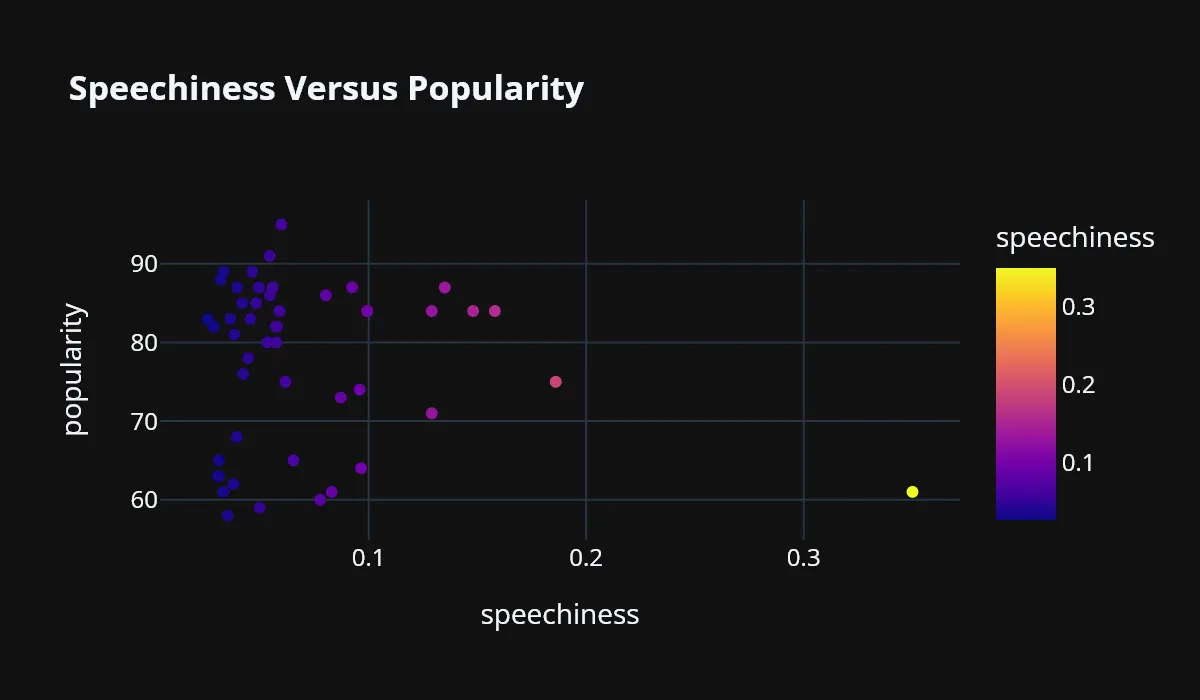

In [89]:
fig2 = px.scatter(df,x='speechiness',y='popularity',color='speechiness',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b> Speechiness Versus Popularity')

fig2_image = fig2.to_image(format="webp", width=600, height=350, scale=2)

Image(fig2_image)

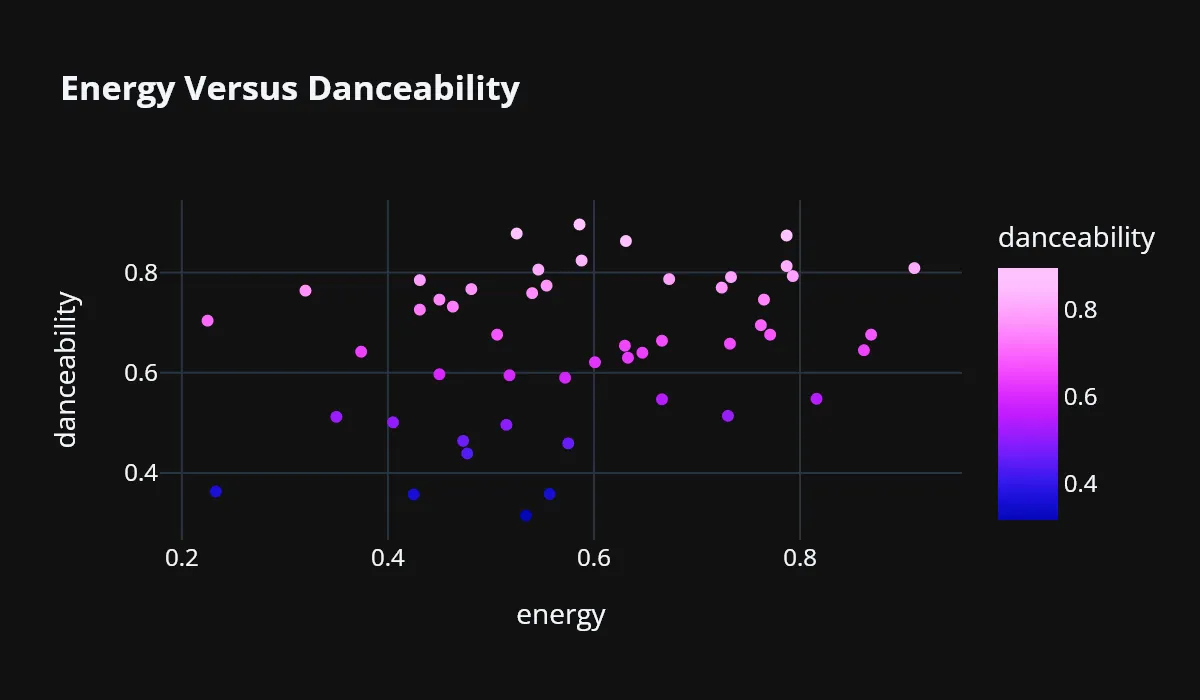

In [90]:
fig3 = px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy Versus Danceability')

fig3_image = fig3.to_image(format="webp", width=600, height=350, scale=2)

Image(fig3_image)

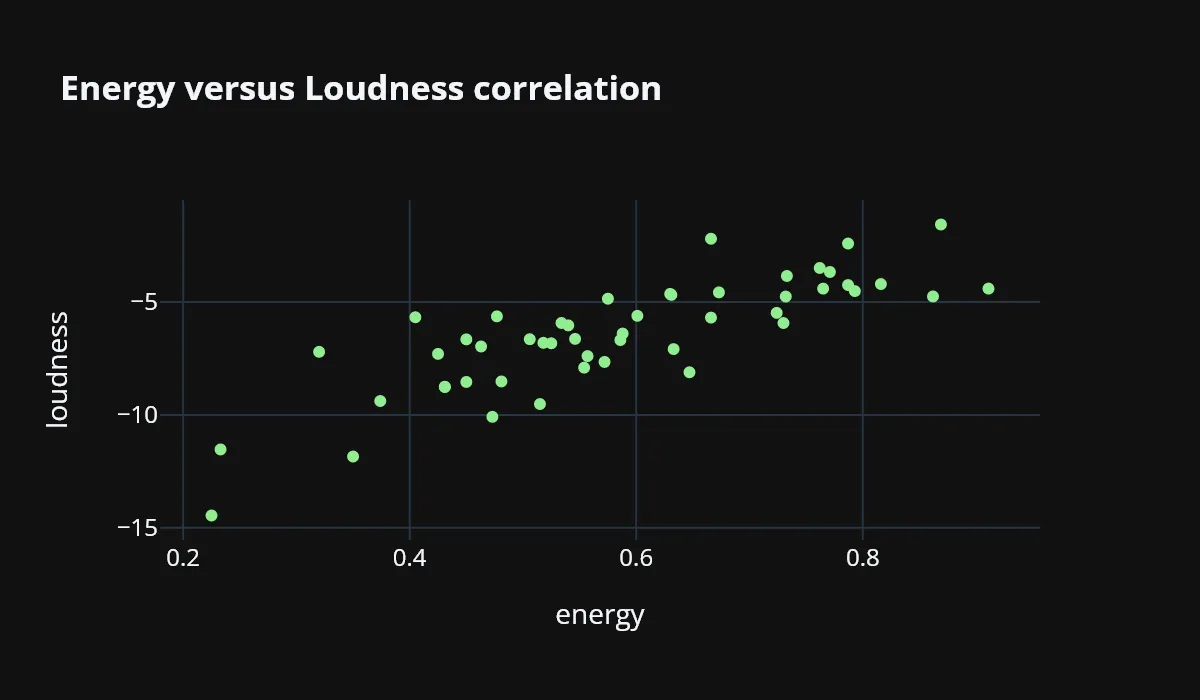

In [91]:
fig4 = px.scatter(df,x='energy',y='loudness',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Energy versus Loudness correlation')


fig4_image = fig4.to_image(format="webp", width=600, height=350, scale=2)

Image(fig4_image)

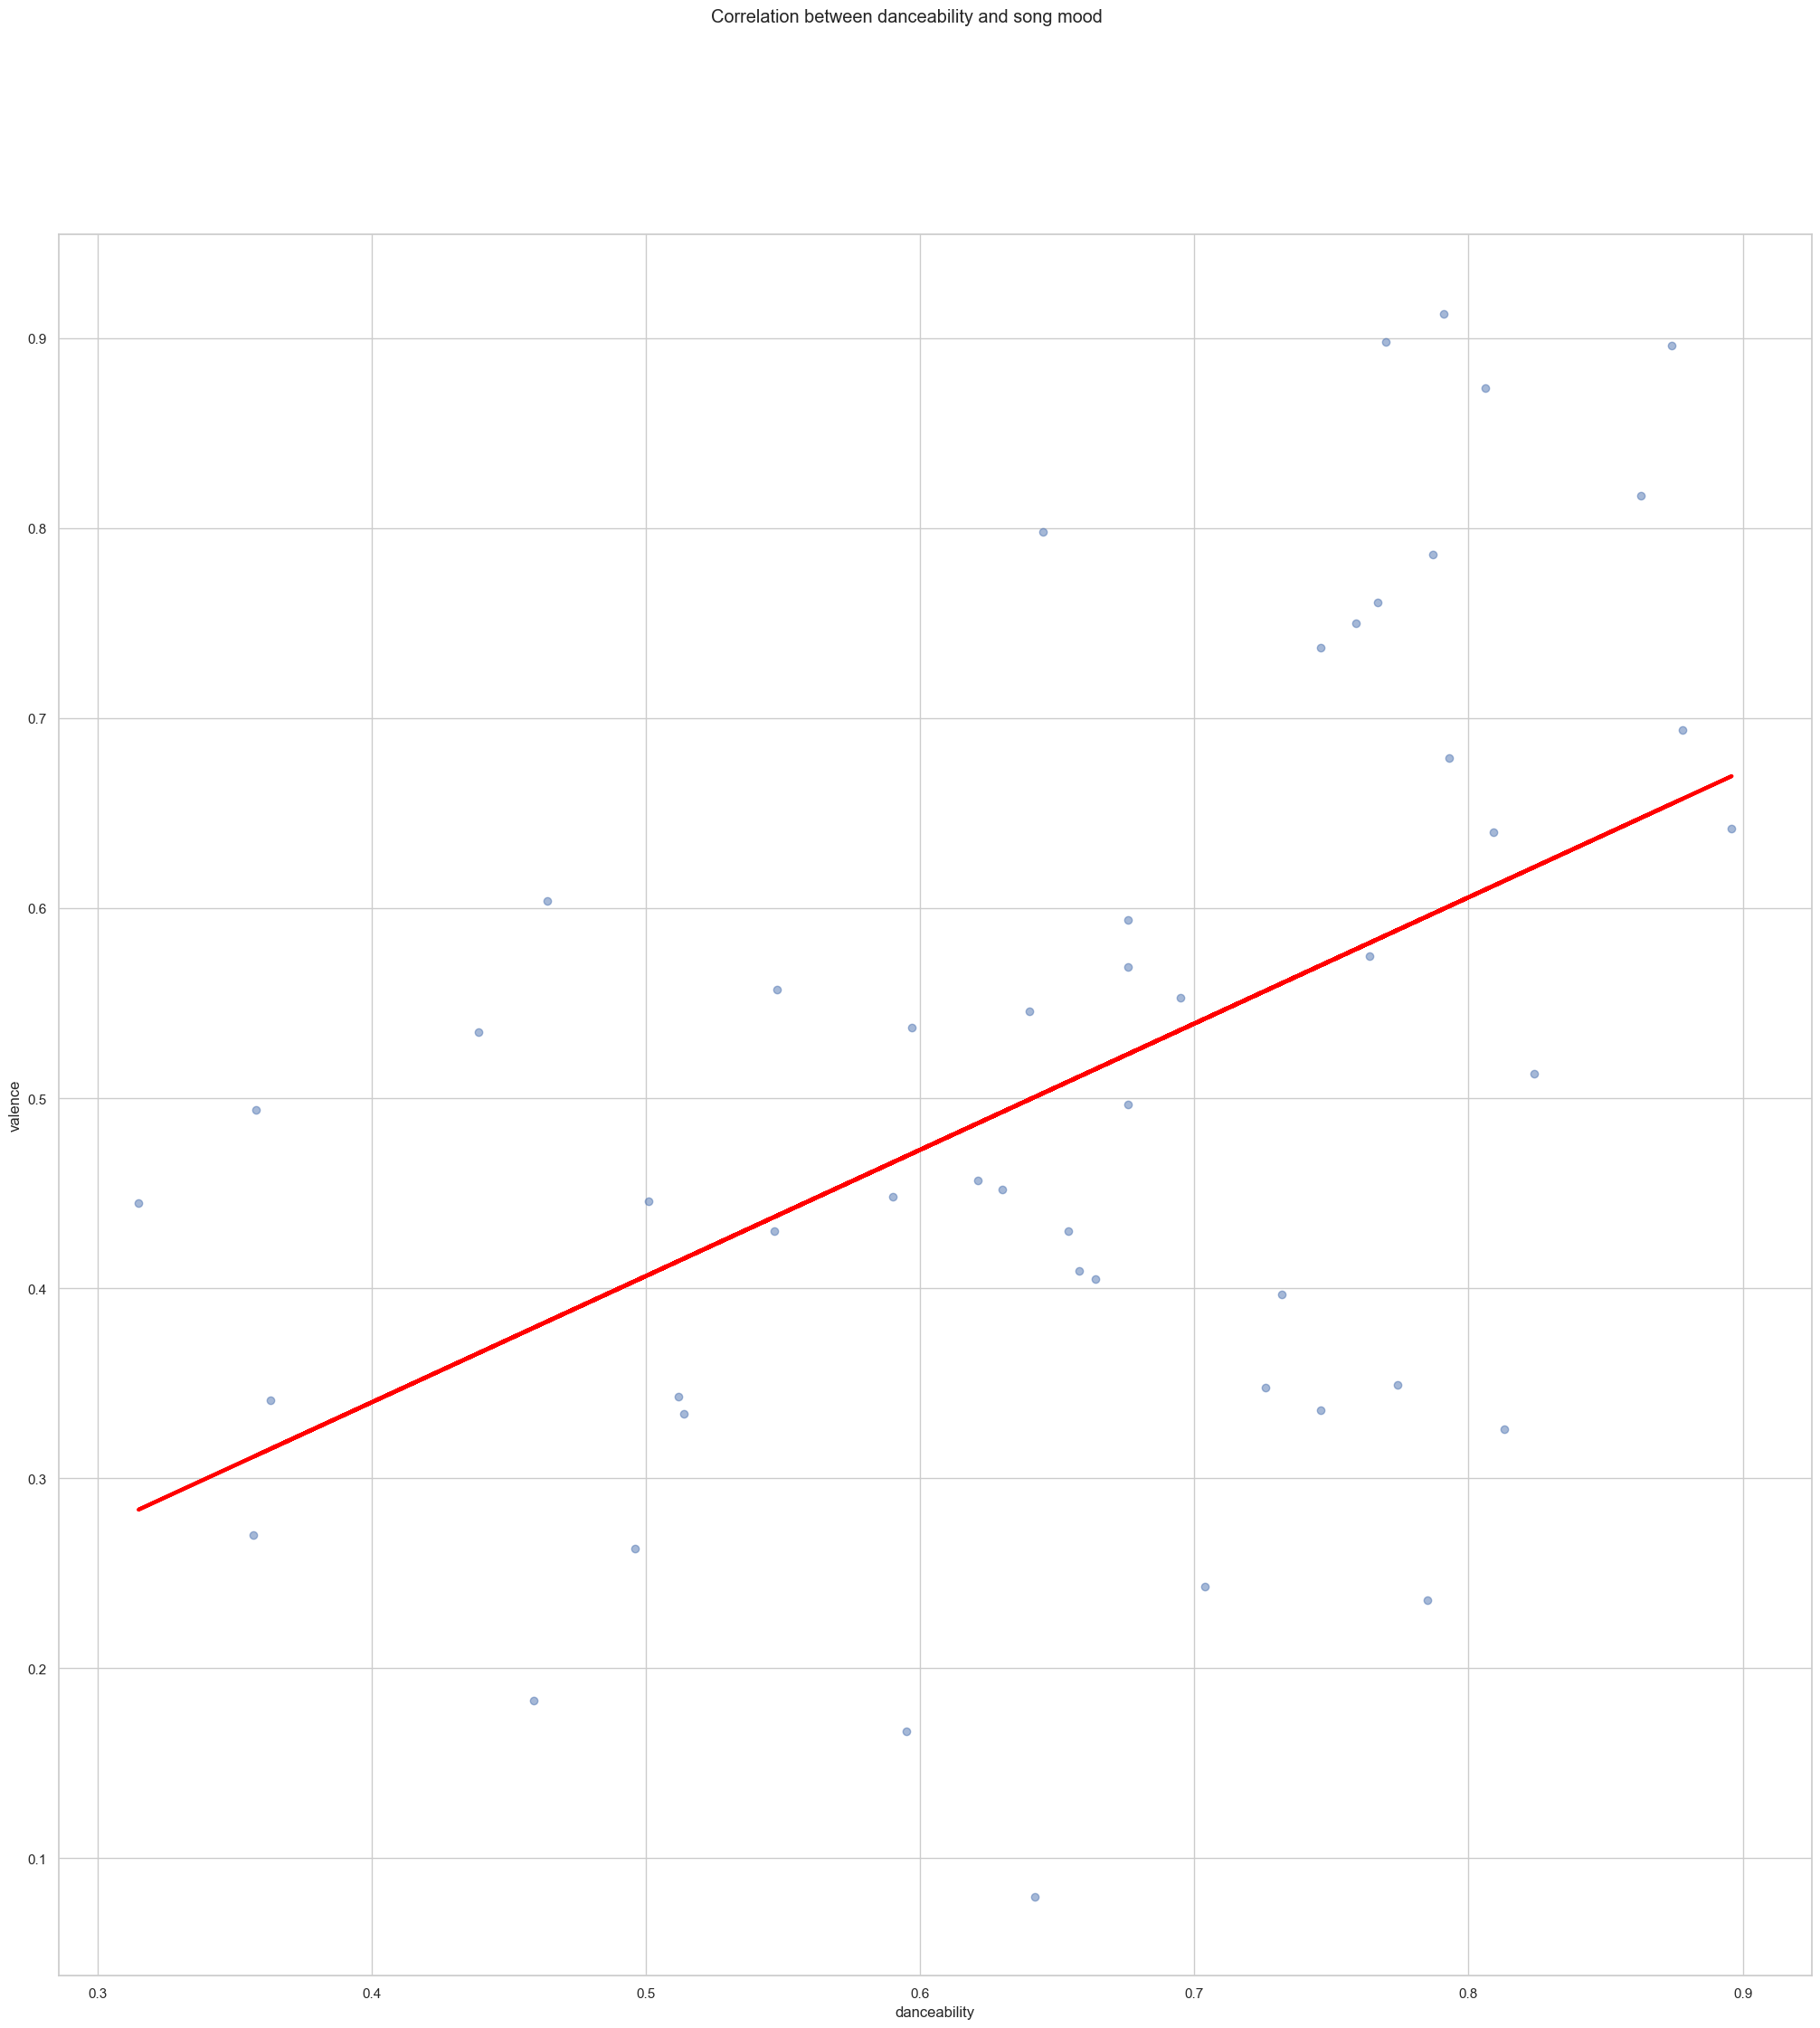

In [92]:
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from matplotlib import ticker

x = df["danceability"].values
y = df["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(25, 25))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()



C:\Users\barar\anaconda3\lib\site-packages\seaborn\distributions.py:1185: UserWarning:

The following kwargs were not used by contour: 'size'



<Figure size 3500x3500 with 0 Axes>

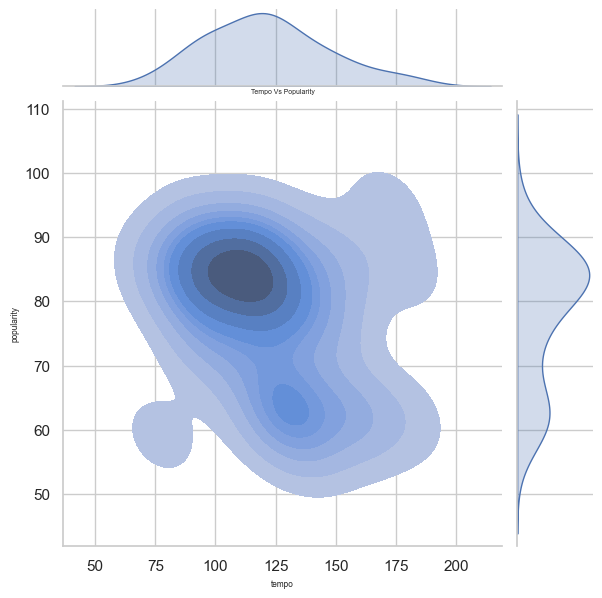

In [93]:
plt.figure(figsize=(35,35))
sns.jointplot(x=df["tempo"].values, y=df['popularity'].values, size=0.8, kind="kde",fill=True, palette ='magma')
plt.ylabel('popularity', fontsize=6)
plt.xlabel("tempo", fontsize=6)
plt.title("Tempo Vs Popularity", fontsize=5)
plt.show();
#The purpose of this graph is to show connection among Beats and Popularity

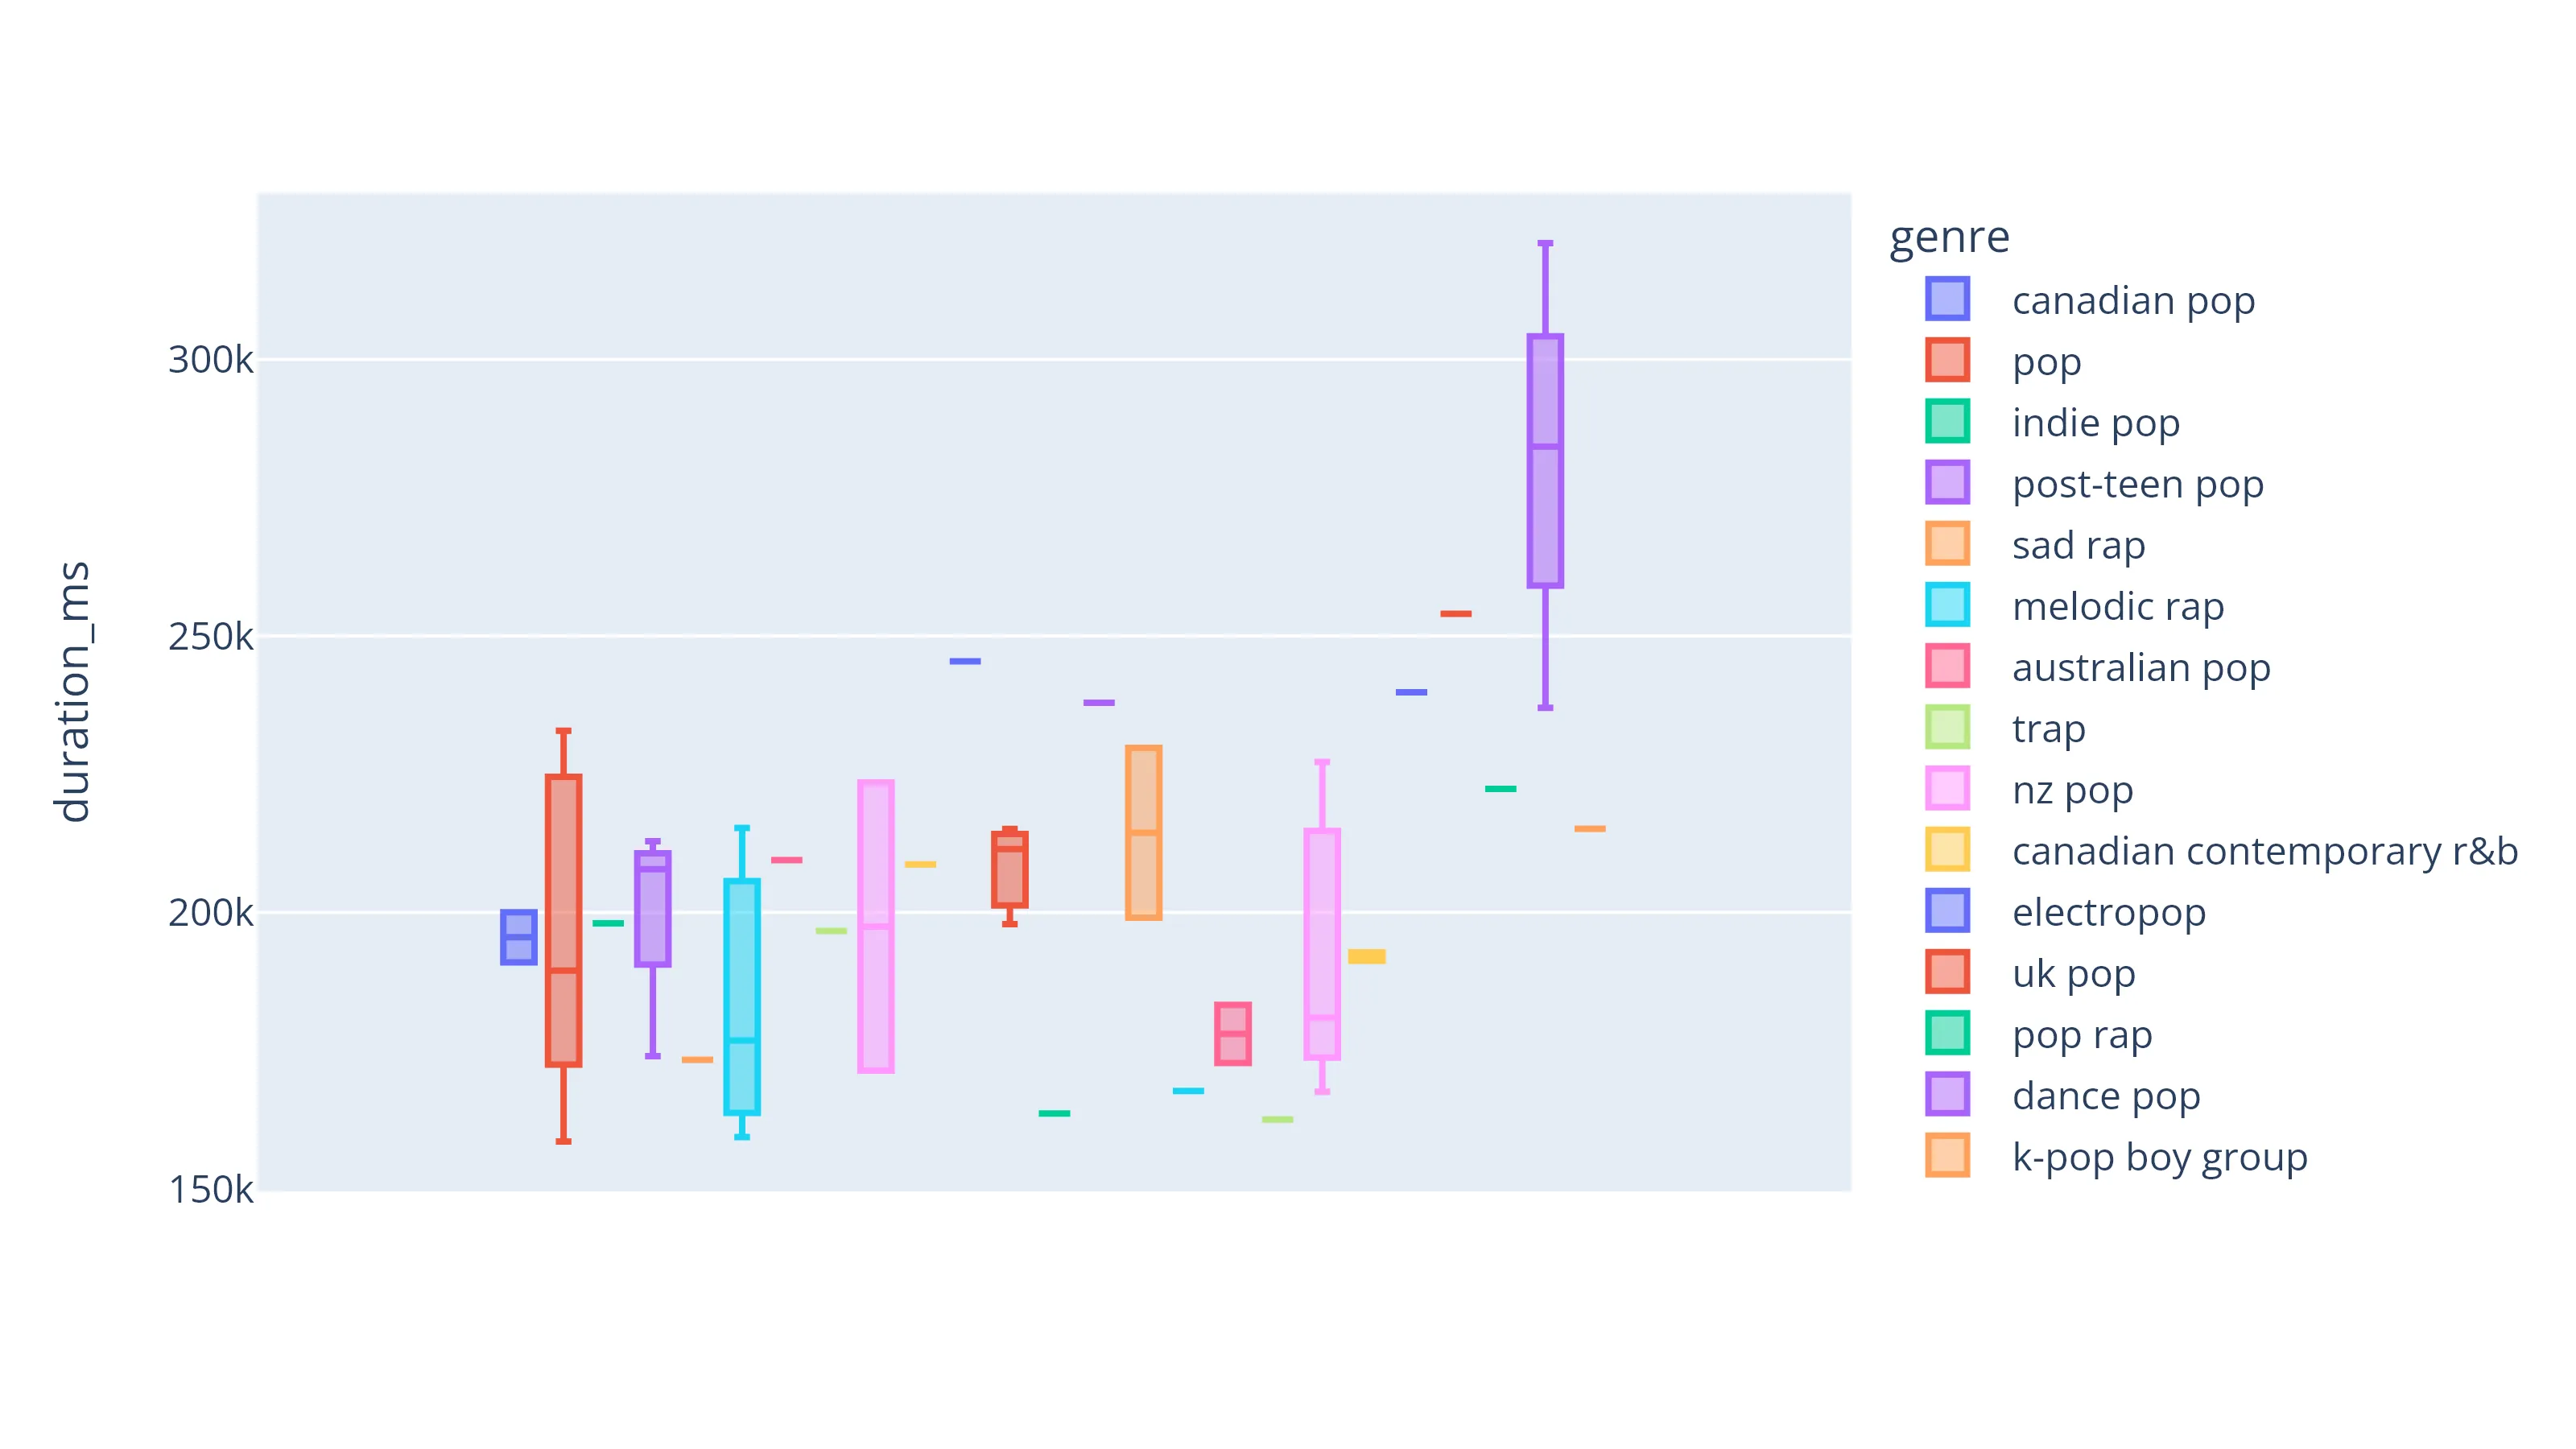

In [94]:
fig5 = px.box(df,y='duration_ms',color='genre')

fig5_image = fig5.to_image(format="webp", width=800, height=450, scale=4)

Image(fig5_image)

In [95]:
## Summary statistics of popular tracks' audio features

df_top10=df.sort_values('popularity', ascending = False).head(10)
df_top10.describe()

,popularity,track_number,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,88.70000,3.800000,189504.800000,0.647300,0.584100,4.300000,-6.334200,0.059830,0.398016,0.001334,0.301660,0.464090,120.350400
std,2.58414,3.392803,16406.416873,0.166645,0.167091,3.683296,1.830733,0.031512,0.335784,0.003378,0.257331,0.224811,22.898968
min,87.00000,1.000000,169265.000000,0.357000,0.374000,0.000000,-9.386000,0.031900,0.001460,0.000000,0.086300,0.079900,95.390000
25%,87.00000,1.250000,174710.000000,0.522500,0.426500,1.000000,-7.147500,0.041250,0.108500,0.000000,0.094200,0.337500,104.031250
50%,87.50000,2.000000,189406.000000,0.668500,0.587000,4.500000,-6.167000,0.052000,0.388000,0.000000,0.235500,0.479500,118.506500
75%,89.00000,5.500000,199540.000000,0.759000,0.728500,7.500000,-5.532750,0.058825,0.721250,0.000102,0.348500,0.556000,123.568000
max,95.00000,10.000000,215280.000000,0.896000,0.816000,10.000000,-3.497000,0.135000,0.786000,0.010700,0.790000,0.898000,171.005000


In [110]:
cols_to_plot = ['artist','popularity', 'track', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness','liveness', 'valence', 'tempo' ]

In [111]:
df.head()

,artist,popularity,track,track_number,genre,release_date,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics
2,The Weeknd,95,Blinding Lights,9,canadian pop,2020-03-20,200040,False,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,\n\n[Intro]\nYeah\n\n[Verse 1]\nI've been tryn...
30,Tate McRae,91,you broke me first,1,pop,2020-04-17,169265,False,0.642,0.374,4,-9.386,0.0545,0.78600,0.000000,0.0906,0.0799,124.099,[Intro]You broke me first[Verse 1]Maybe you do...
26,Conan Gray,89,Heather,10,indie pop,2020-03-20,198040,False,0.357,0.425,5,-7.301,0.0333,0.58400,0.000000,0.3220,0.2700,102.078,"\n\n[Verse 1]\nI still remember, third of Dece..."
20,Harry Styles,89,Watermelon Sugar,2,post-teen pop,2019-12-13,174000,False,0.548,0.816,0,-4.209,0.0465,0.12200,0.000000,0.3350,0.5570,95.390,[Verse 1]Tastes like strawberries on a summer ...
0,Lewis Capaldi,88,Someone You Loved,4,pop,2019-05-17,182160,False,0.501,0.405,1,-5.679,0.0319,0.75100,0.000000,0.1050,0.4460,109.891,"\n\n[Verse 1]\nI'm going under, and this time,..."


In [113]:
df_x = df[cols_to_plot]

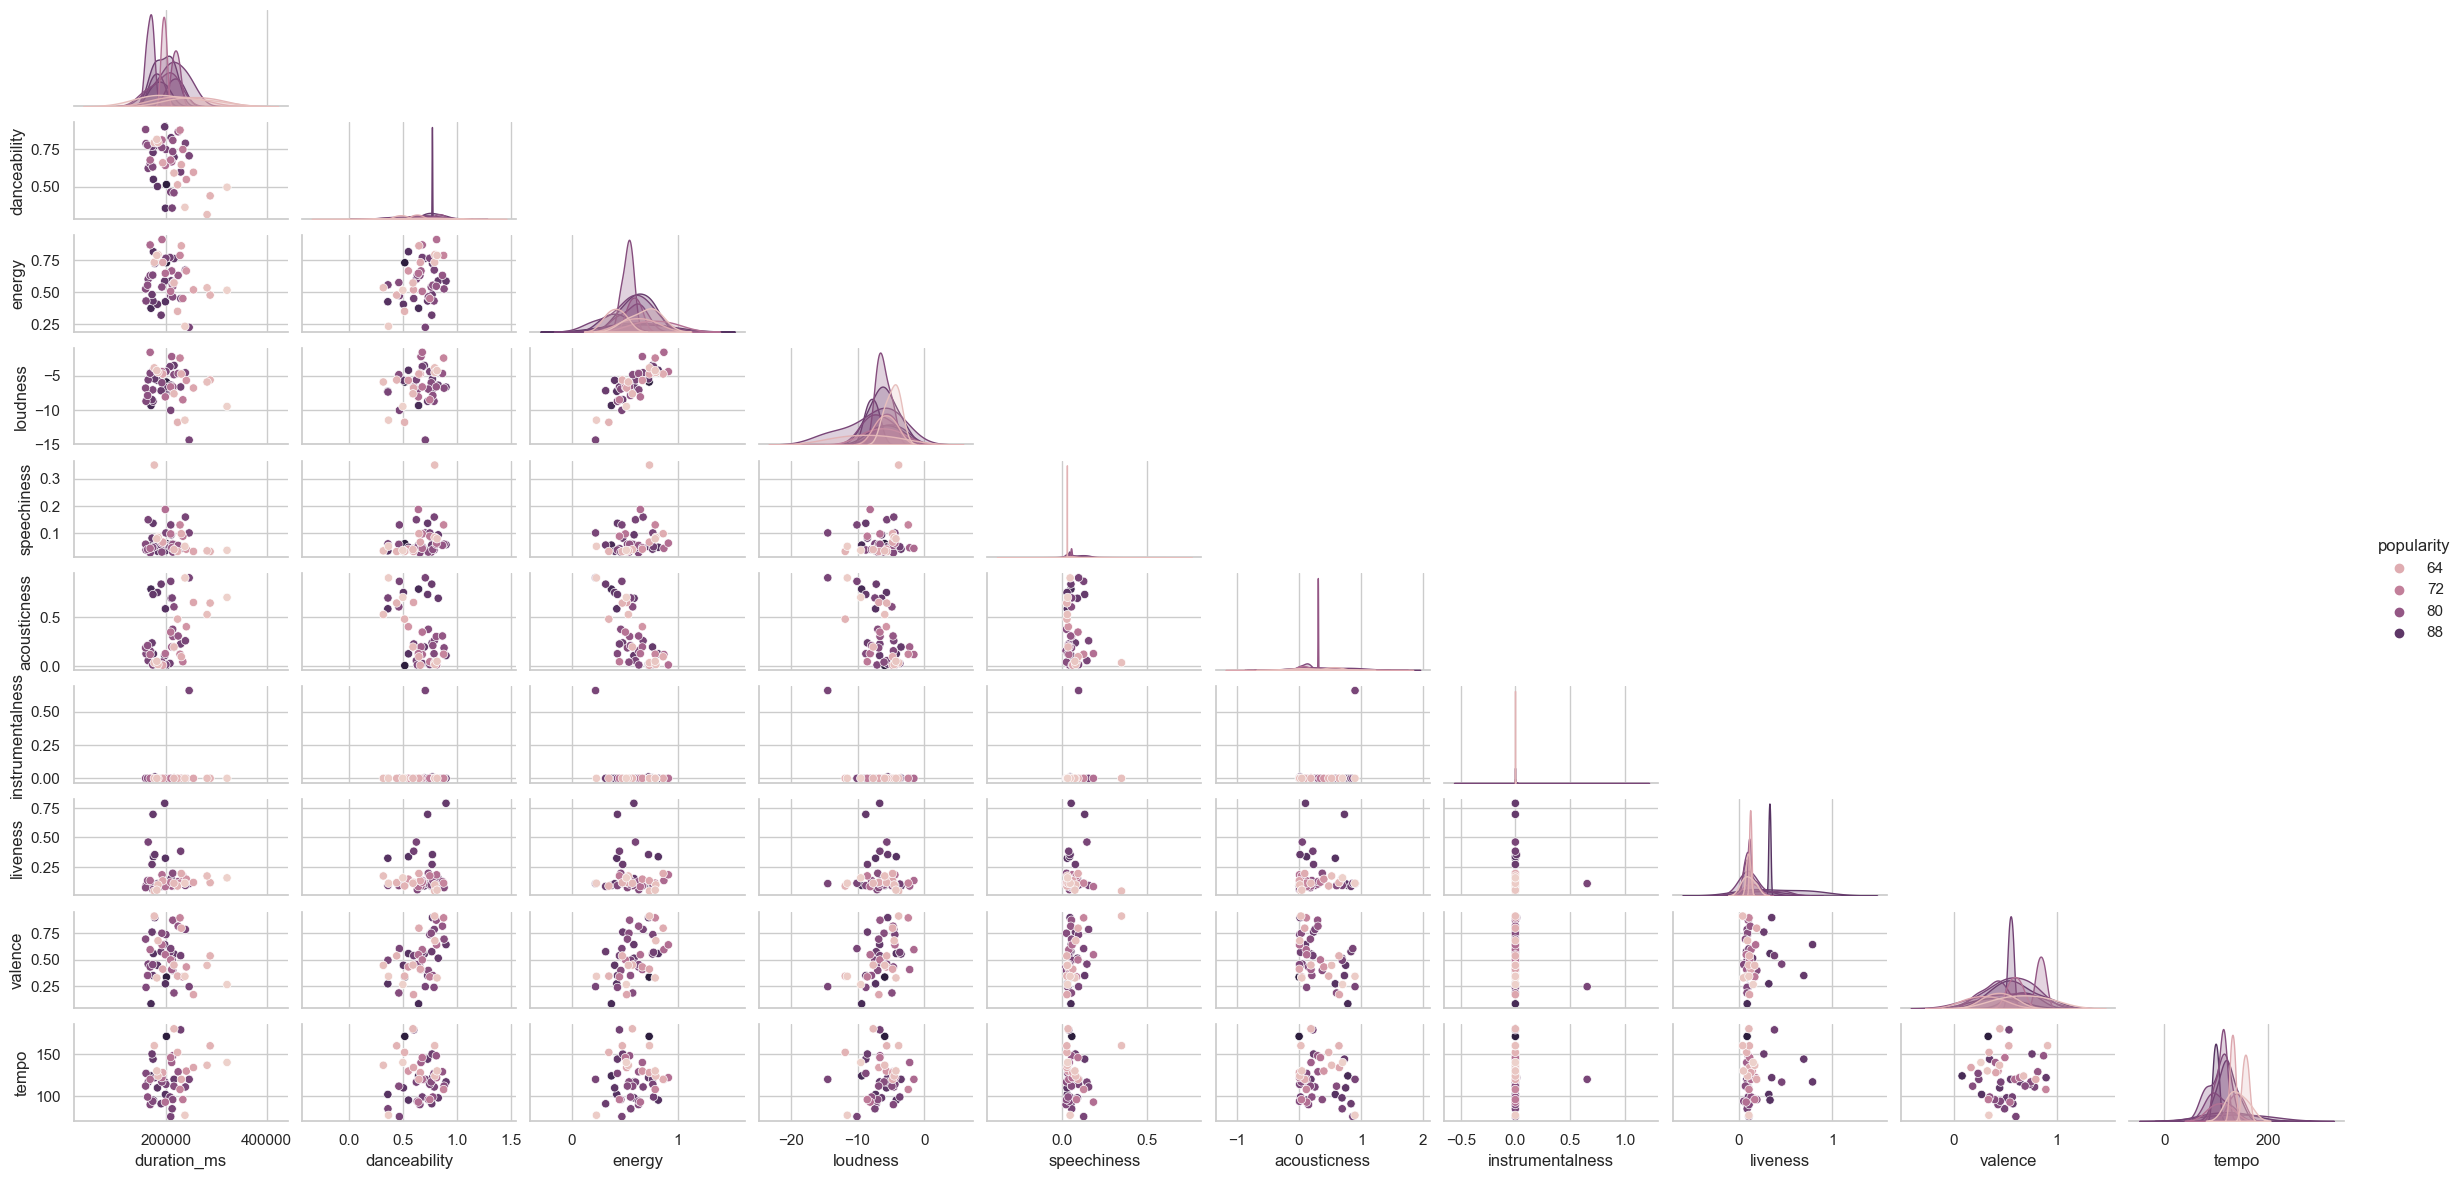

In [120]:
sns.pairplot(df_x, corner=True, hue='popularity', height=1.2, aspect=2)

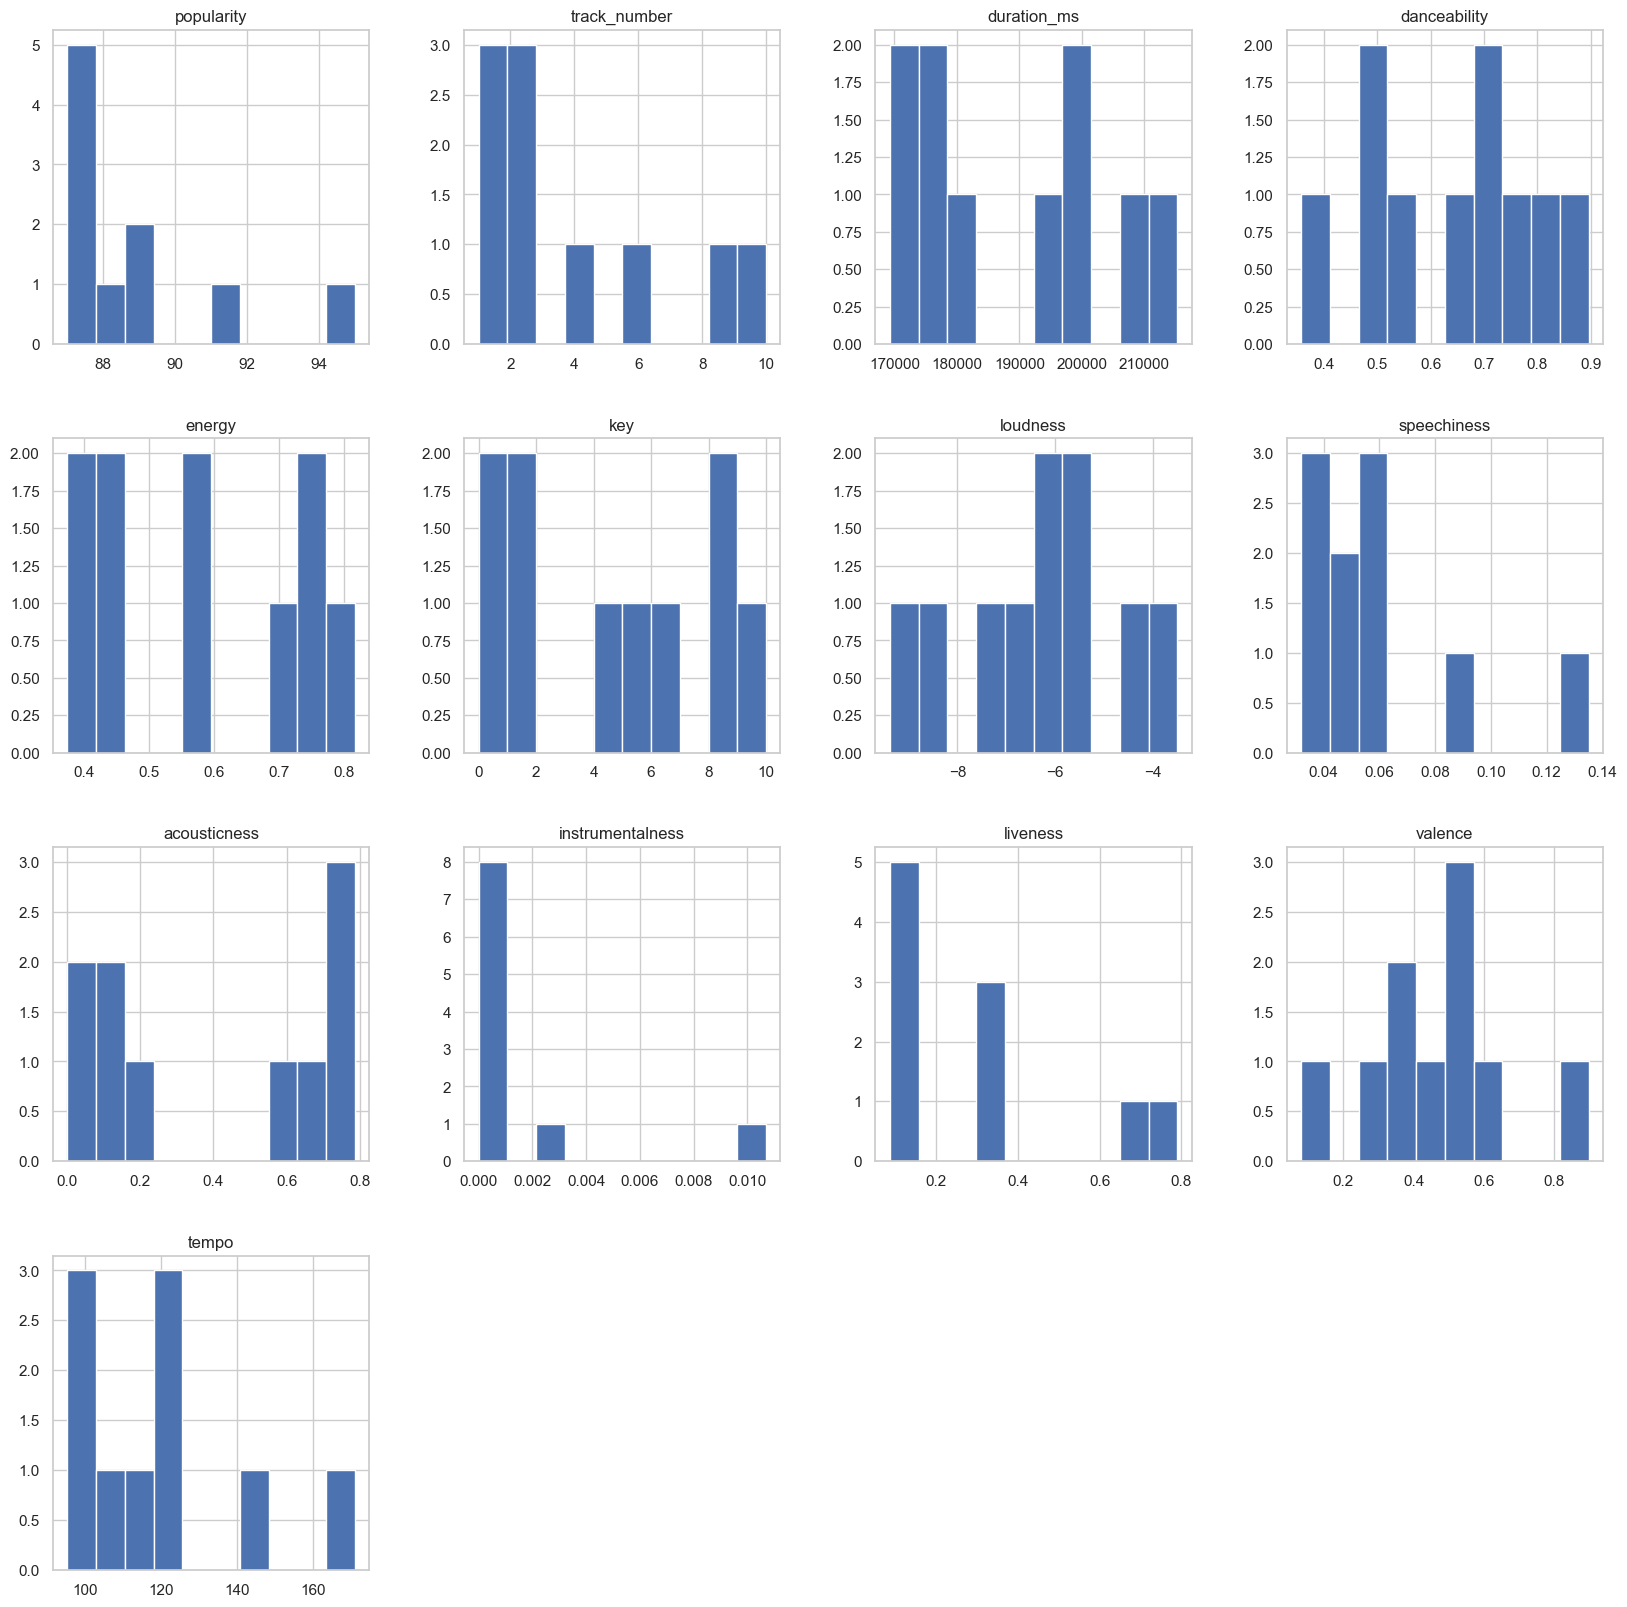

In [121]:
## Summary graph of popular tracks' audio features 

df_top10.hist(figsize = (20,20))
plt.show()

**Analysis**


Again as previously mentioned, there is a great variety and subjectivity among listeners. However it can be observed that songs with energy, loudness and valence did edge out in terms of popularity.

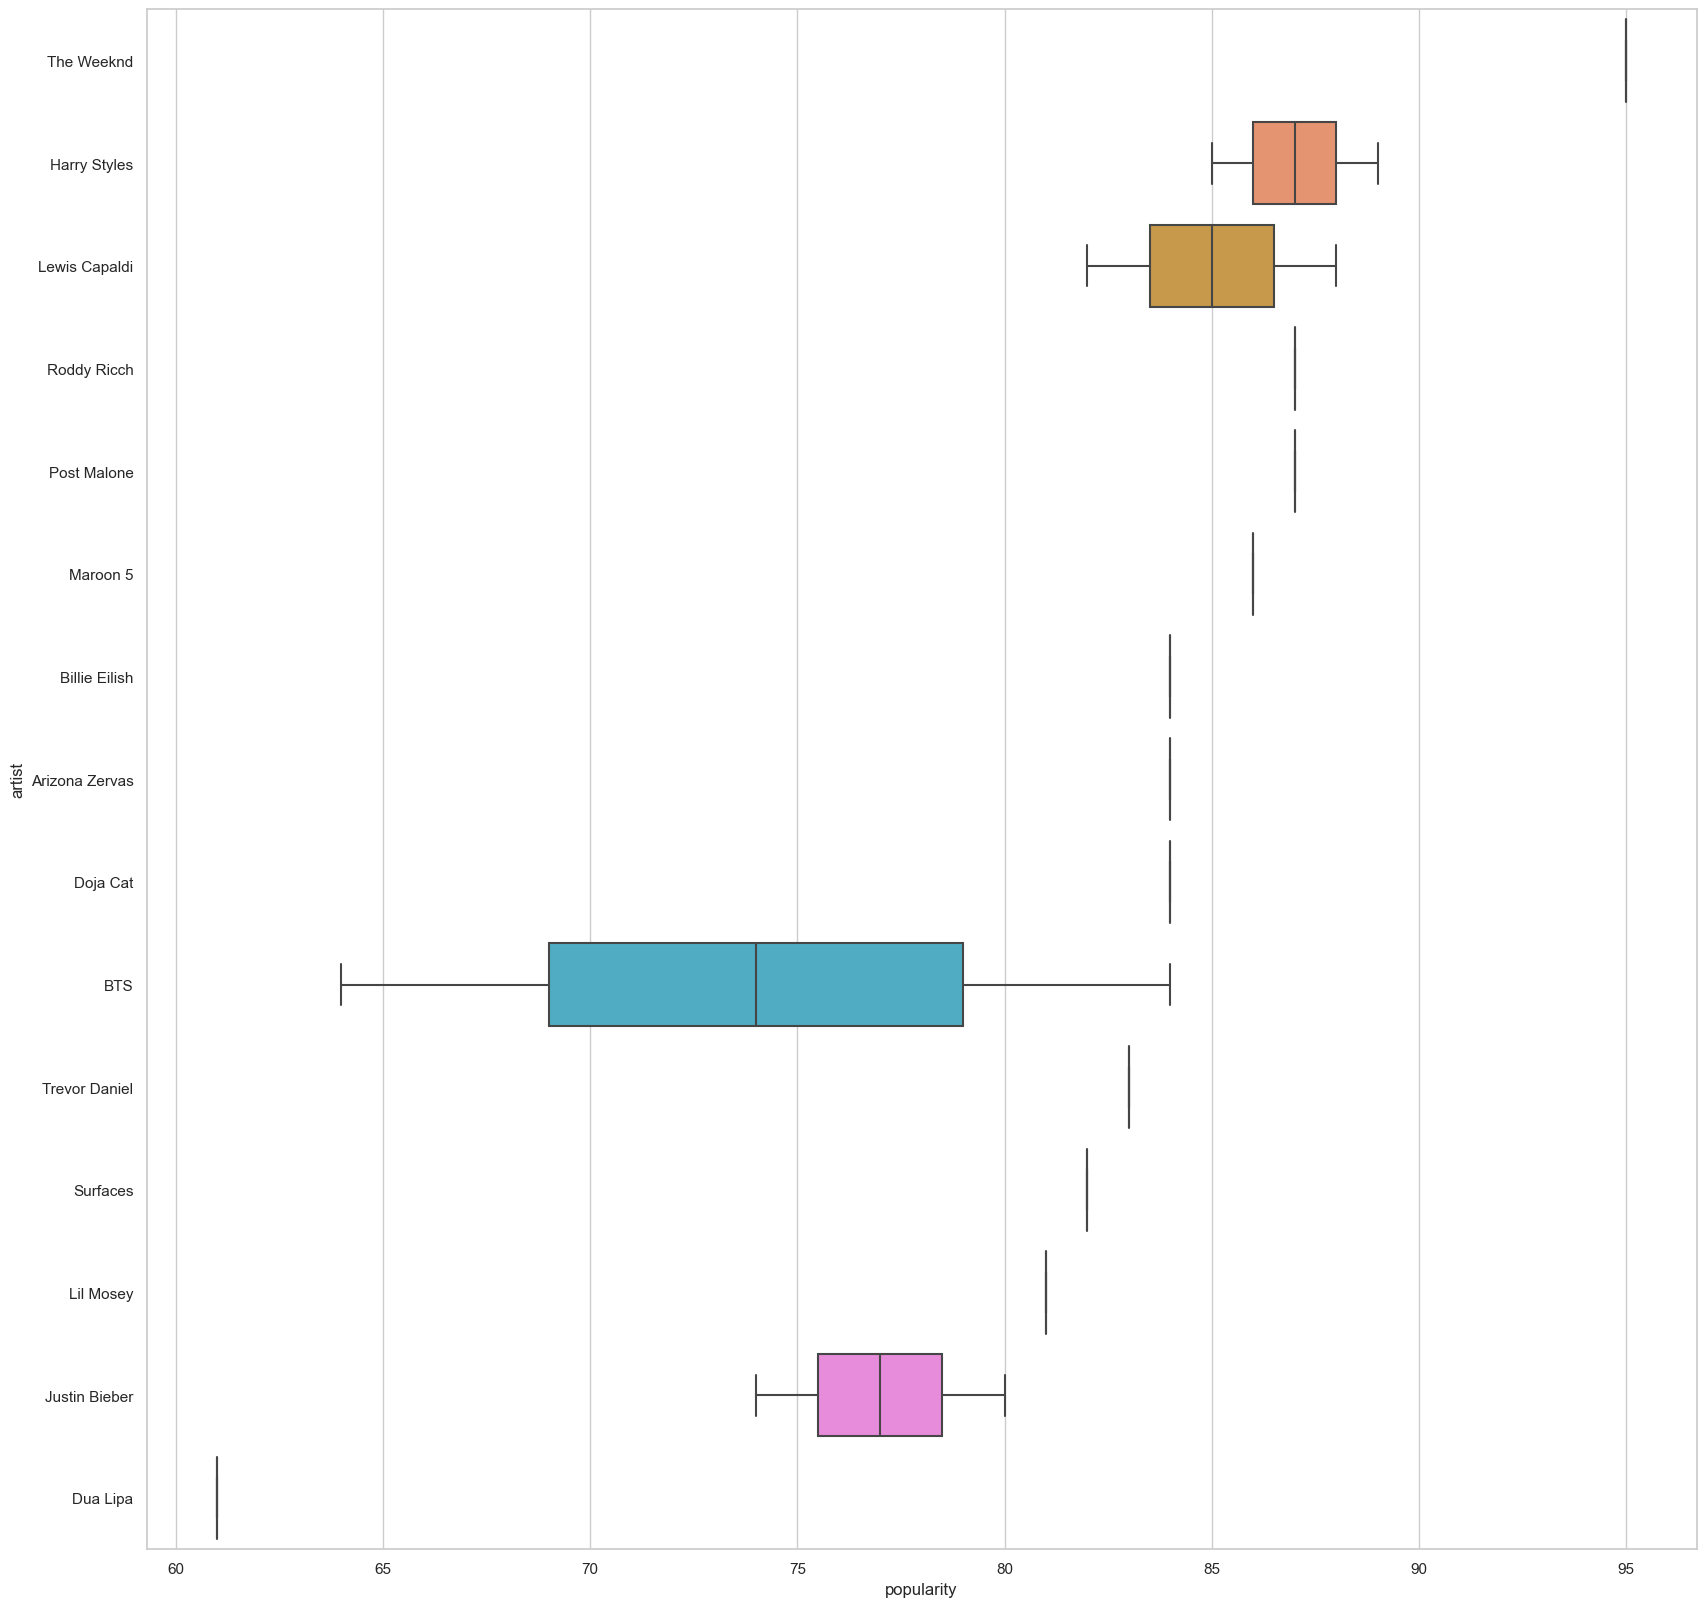

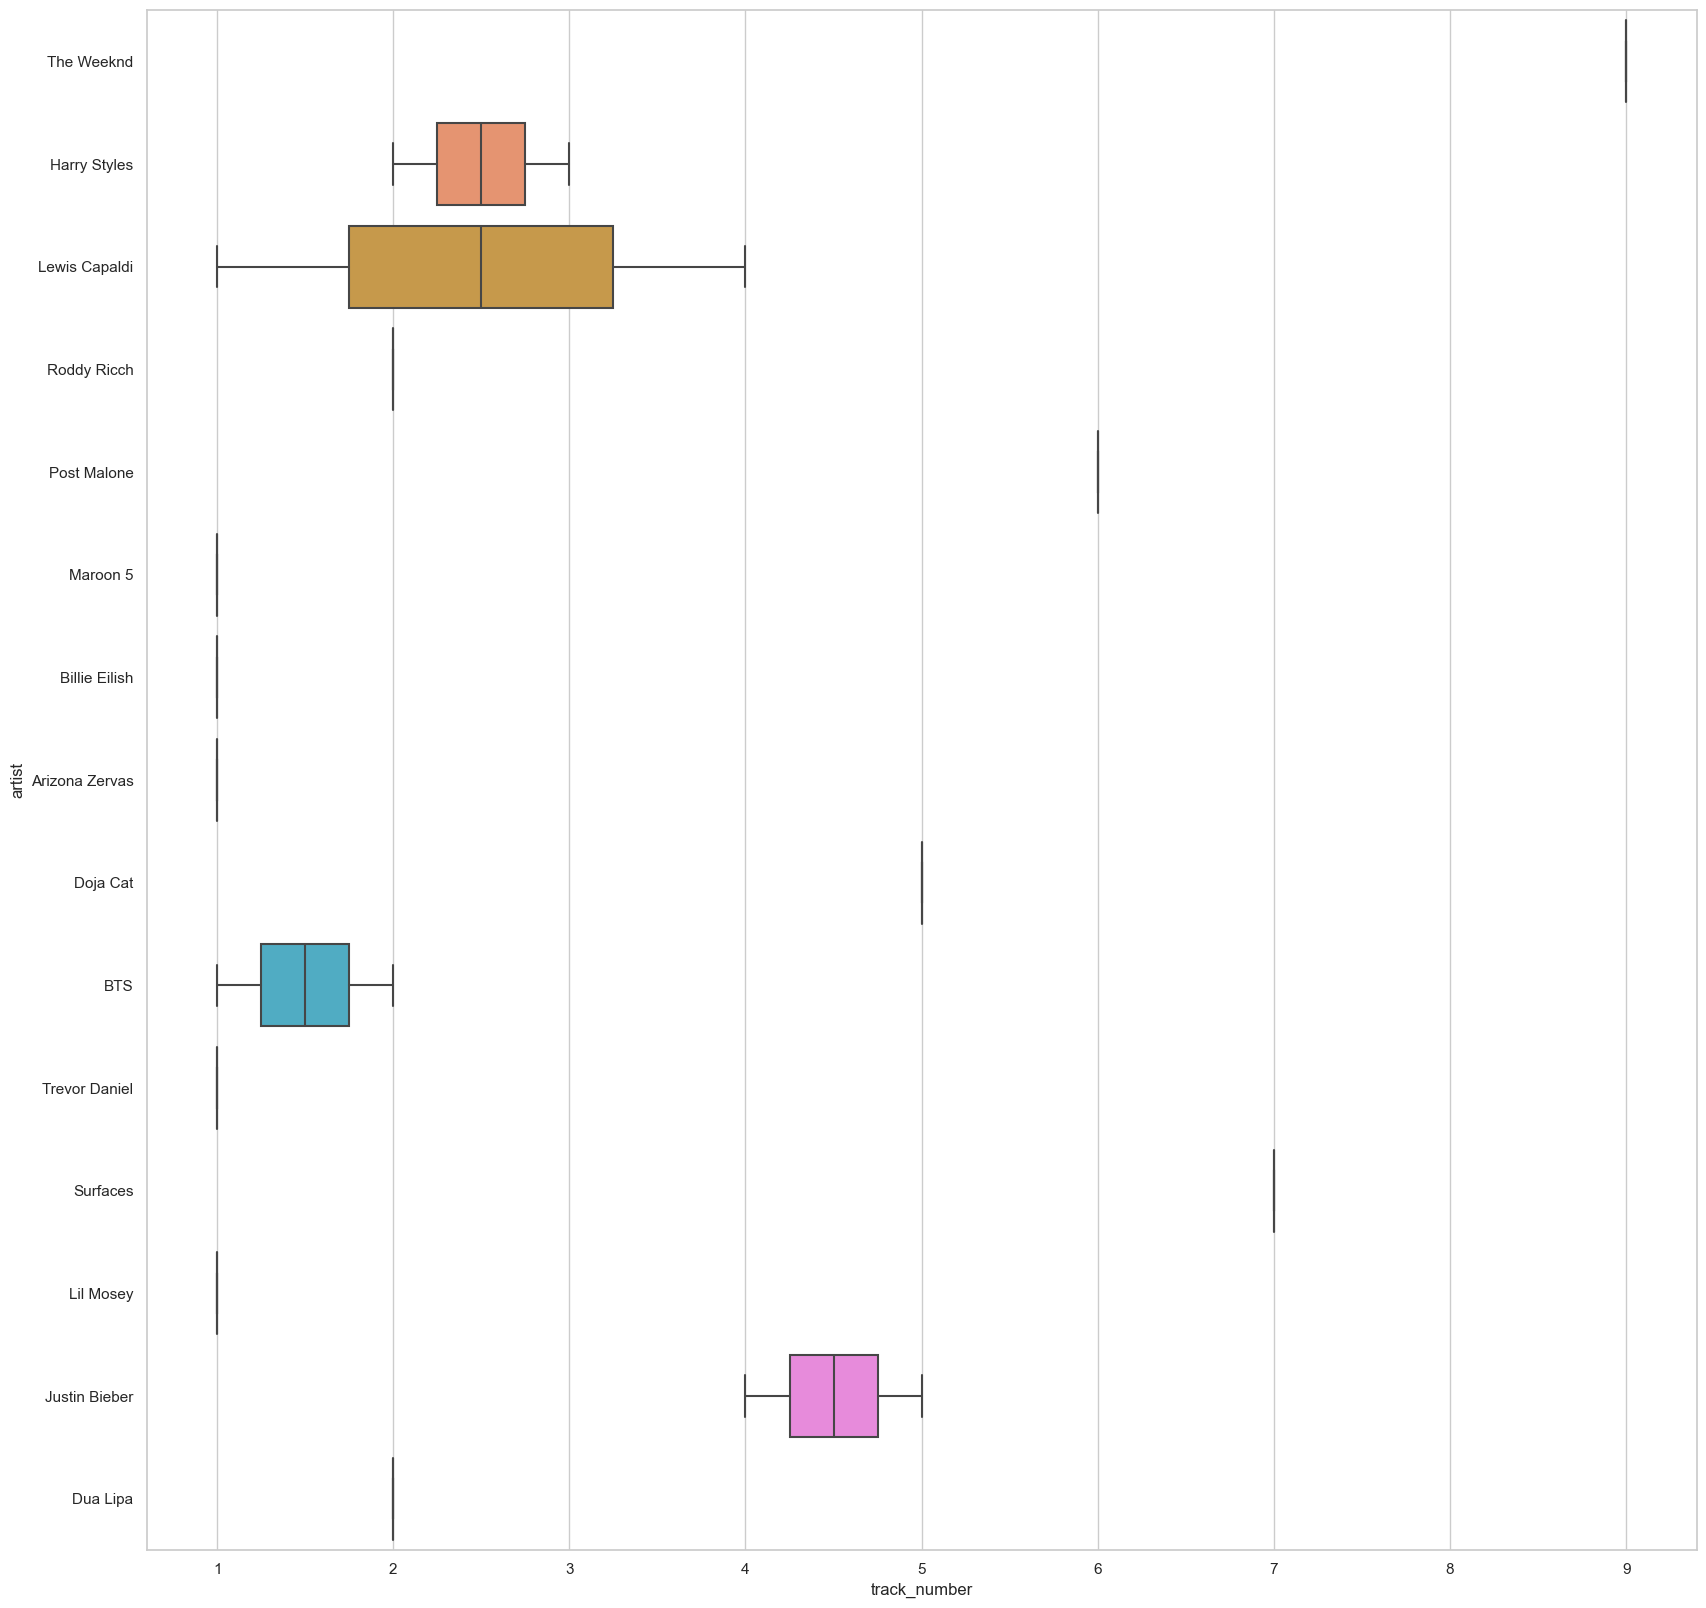

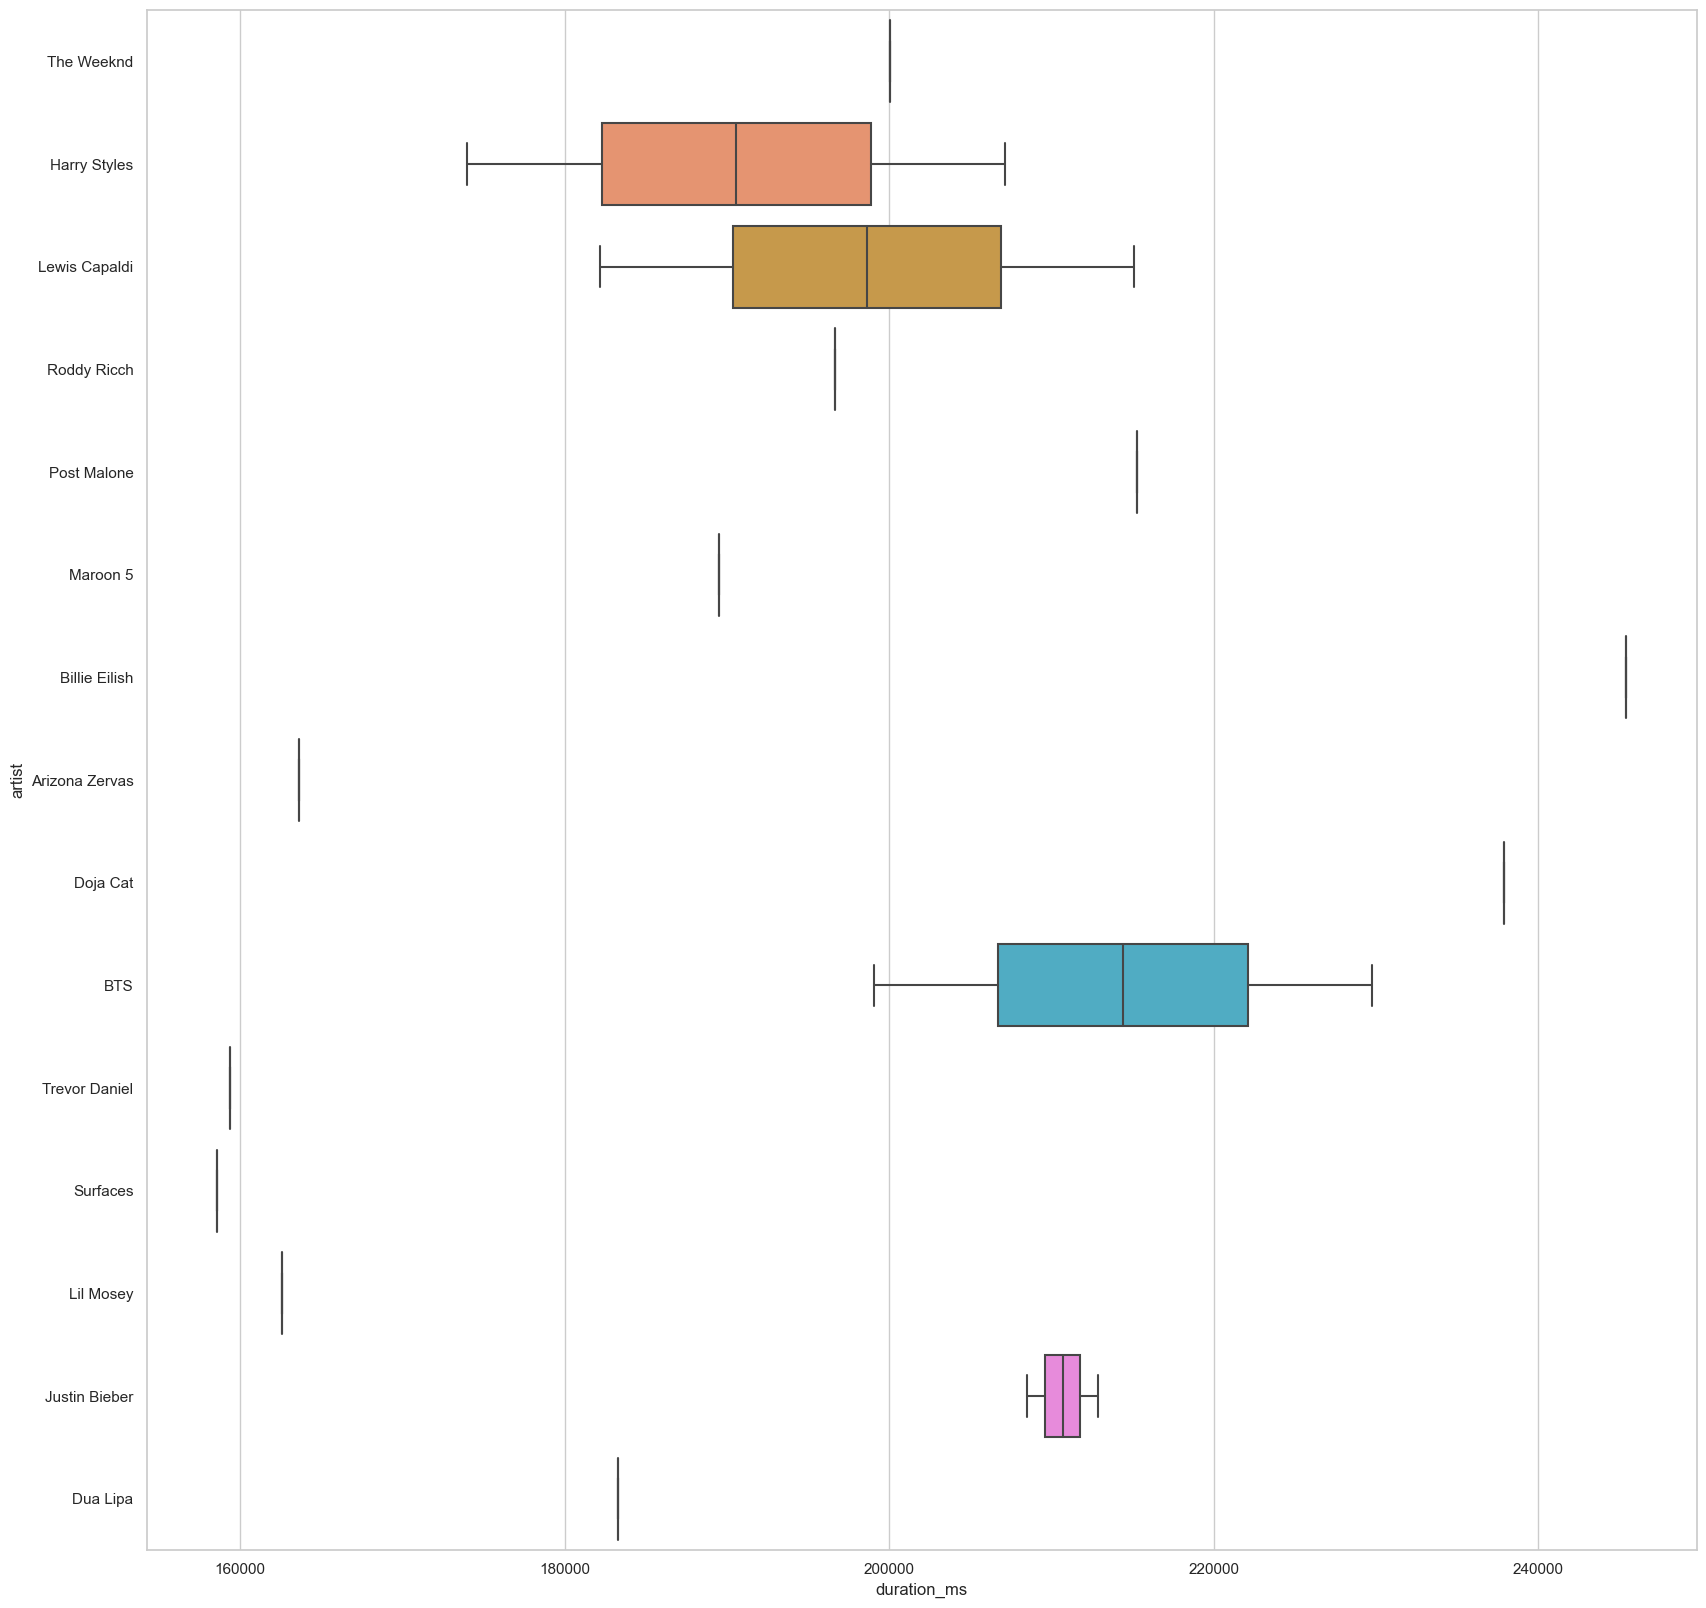

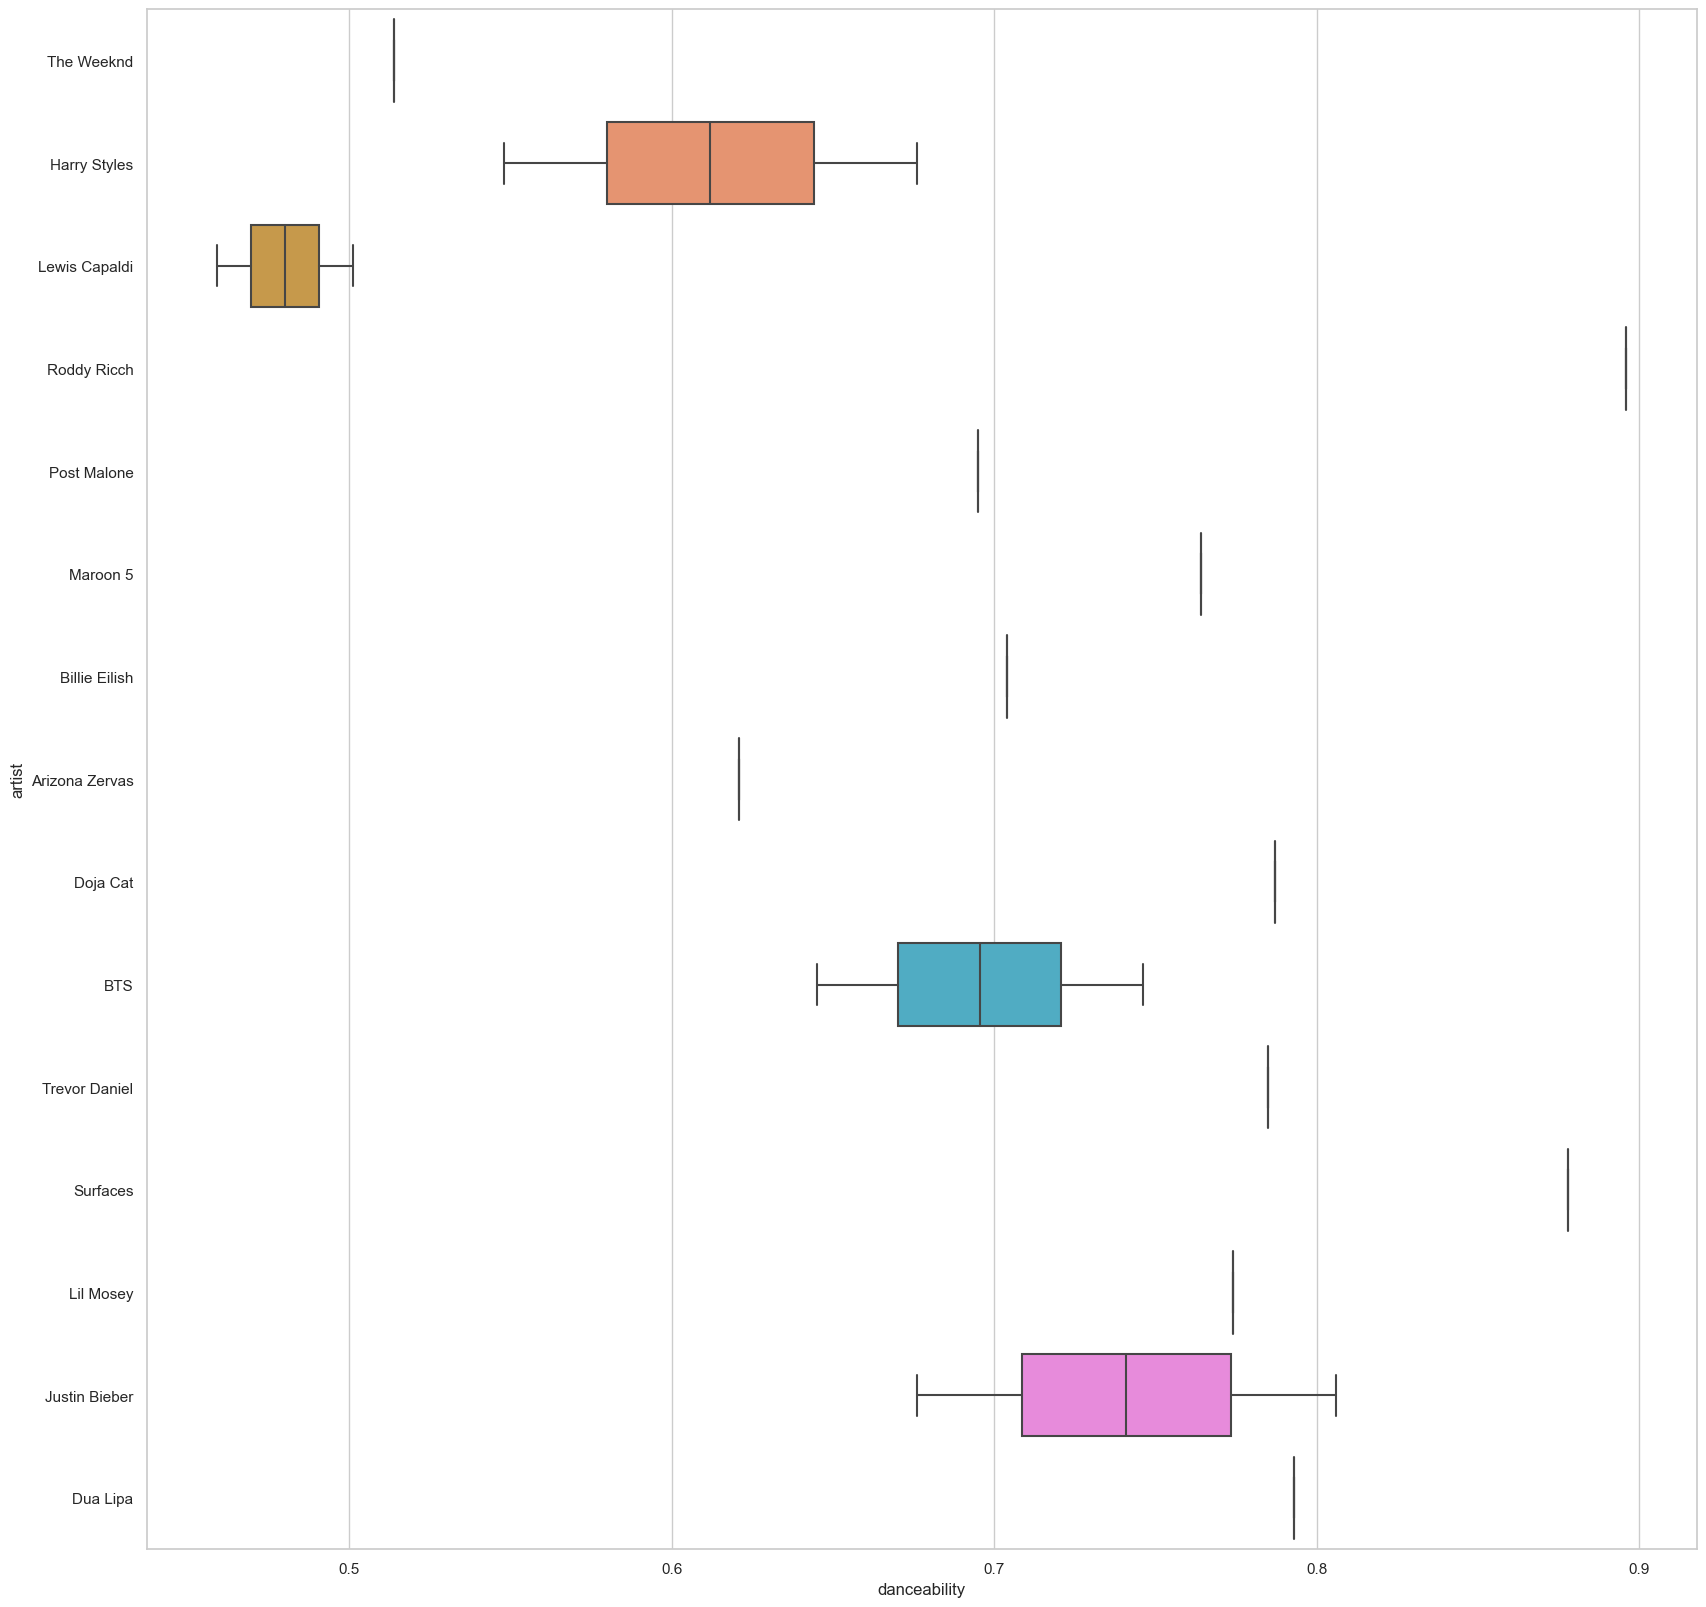

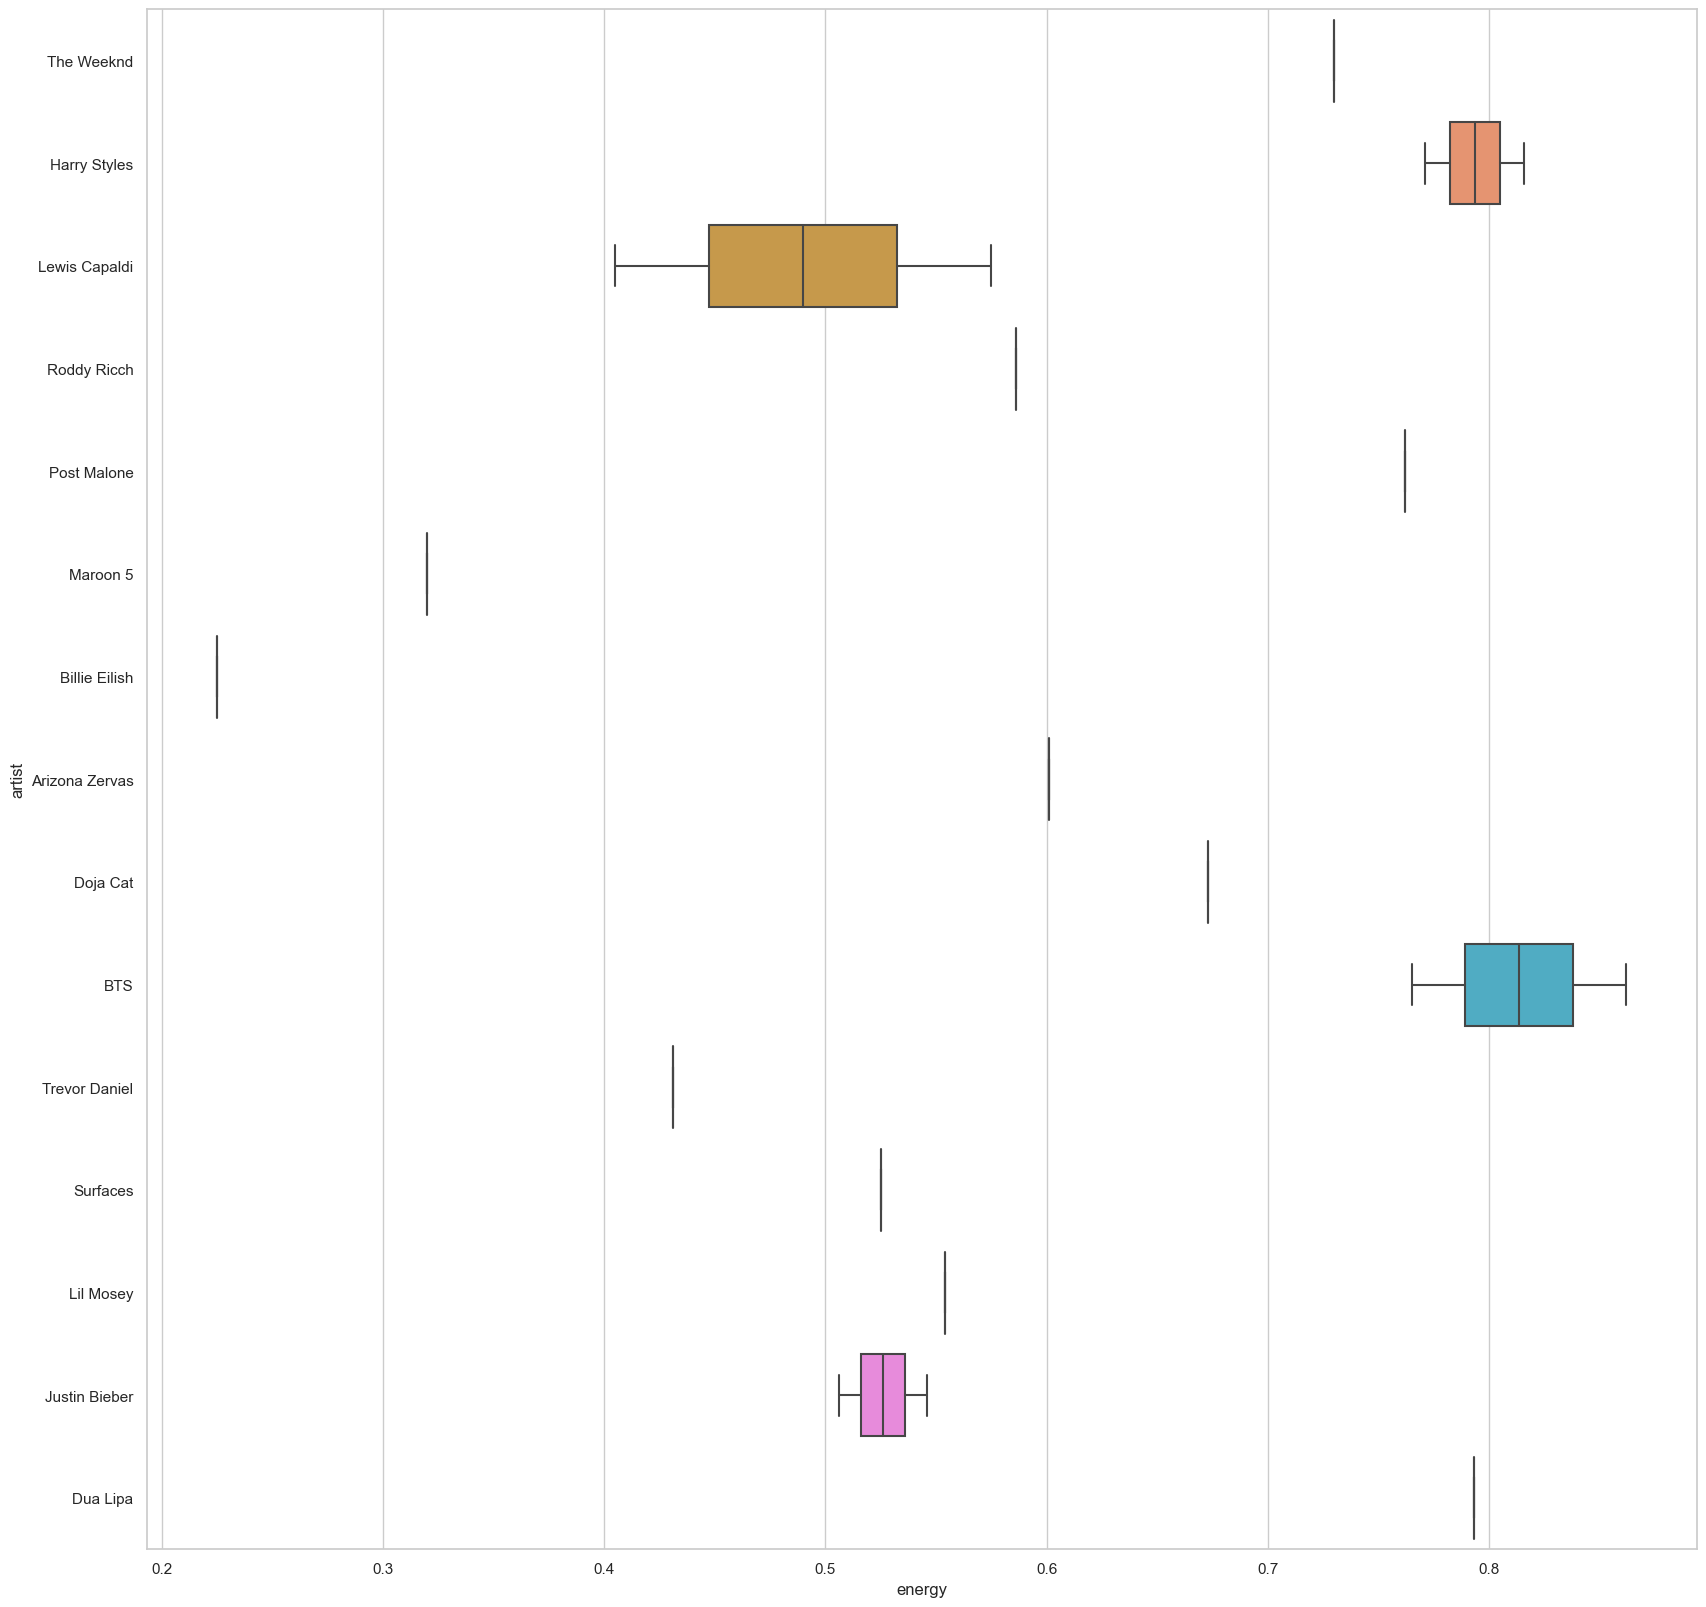

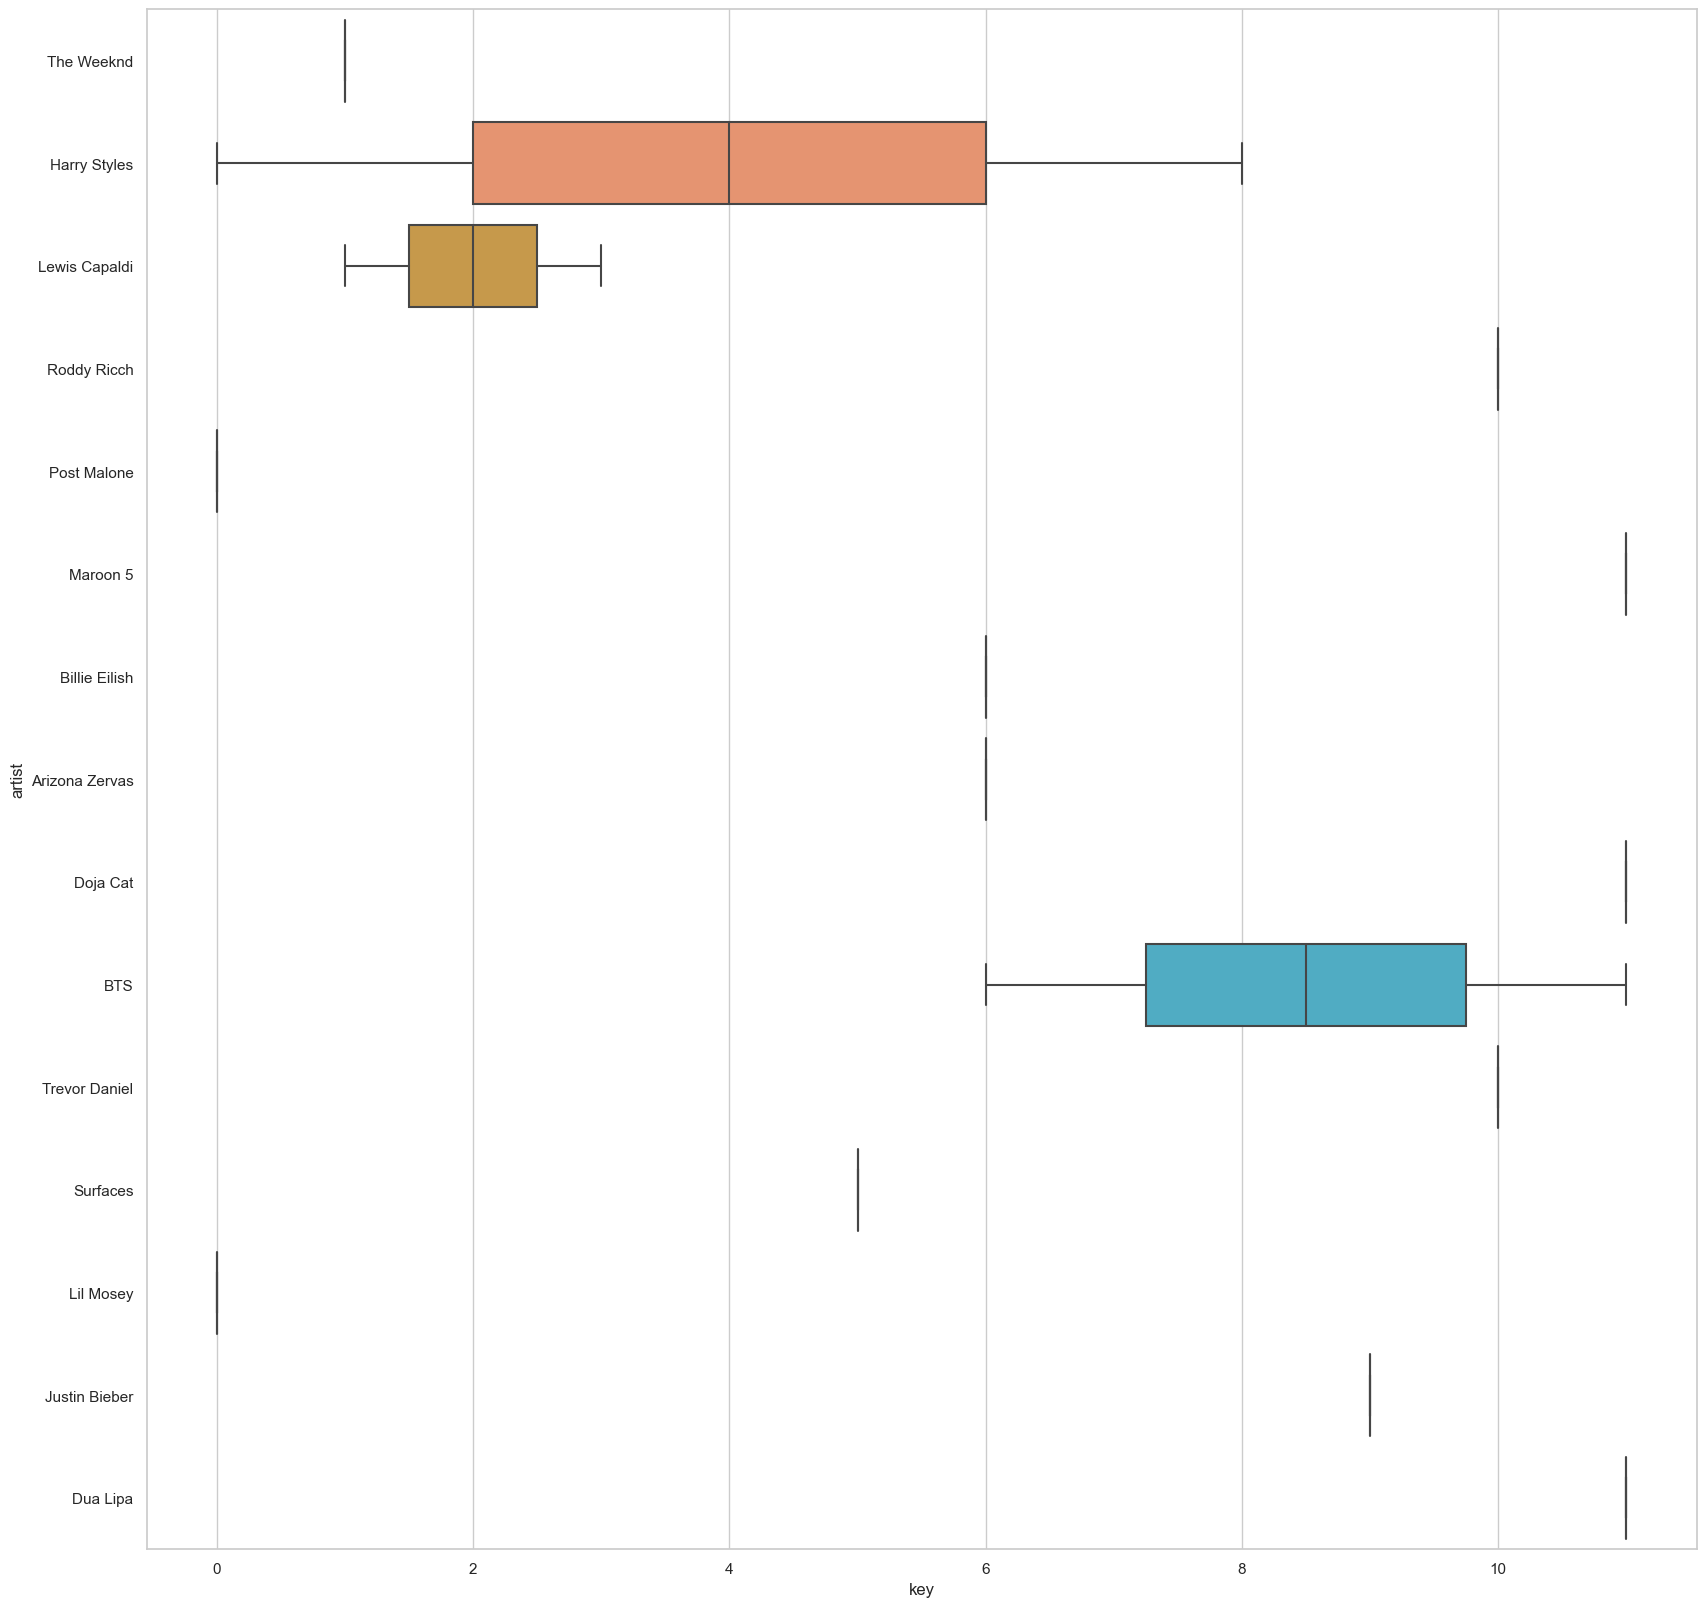

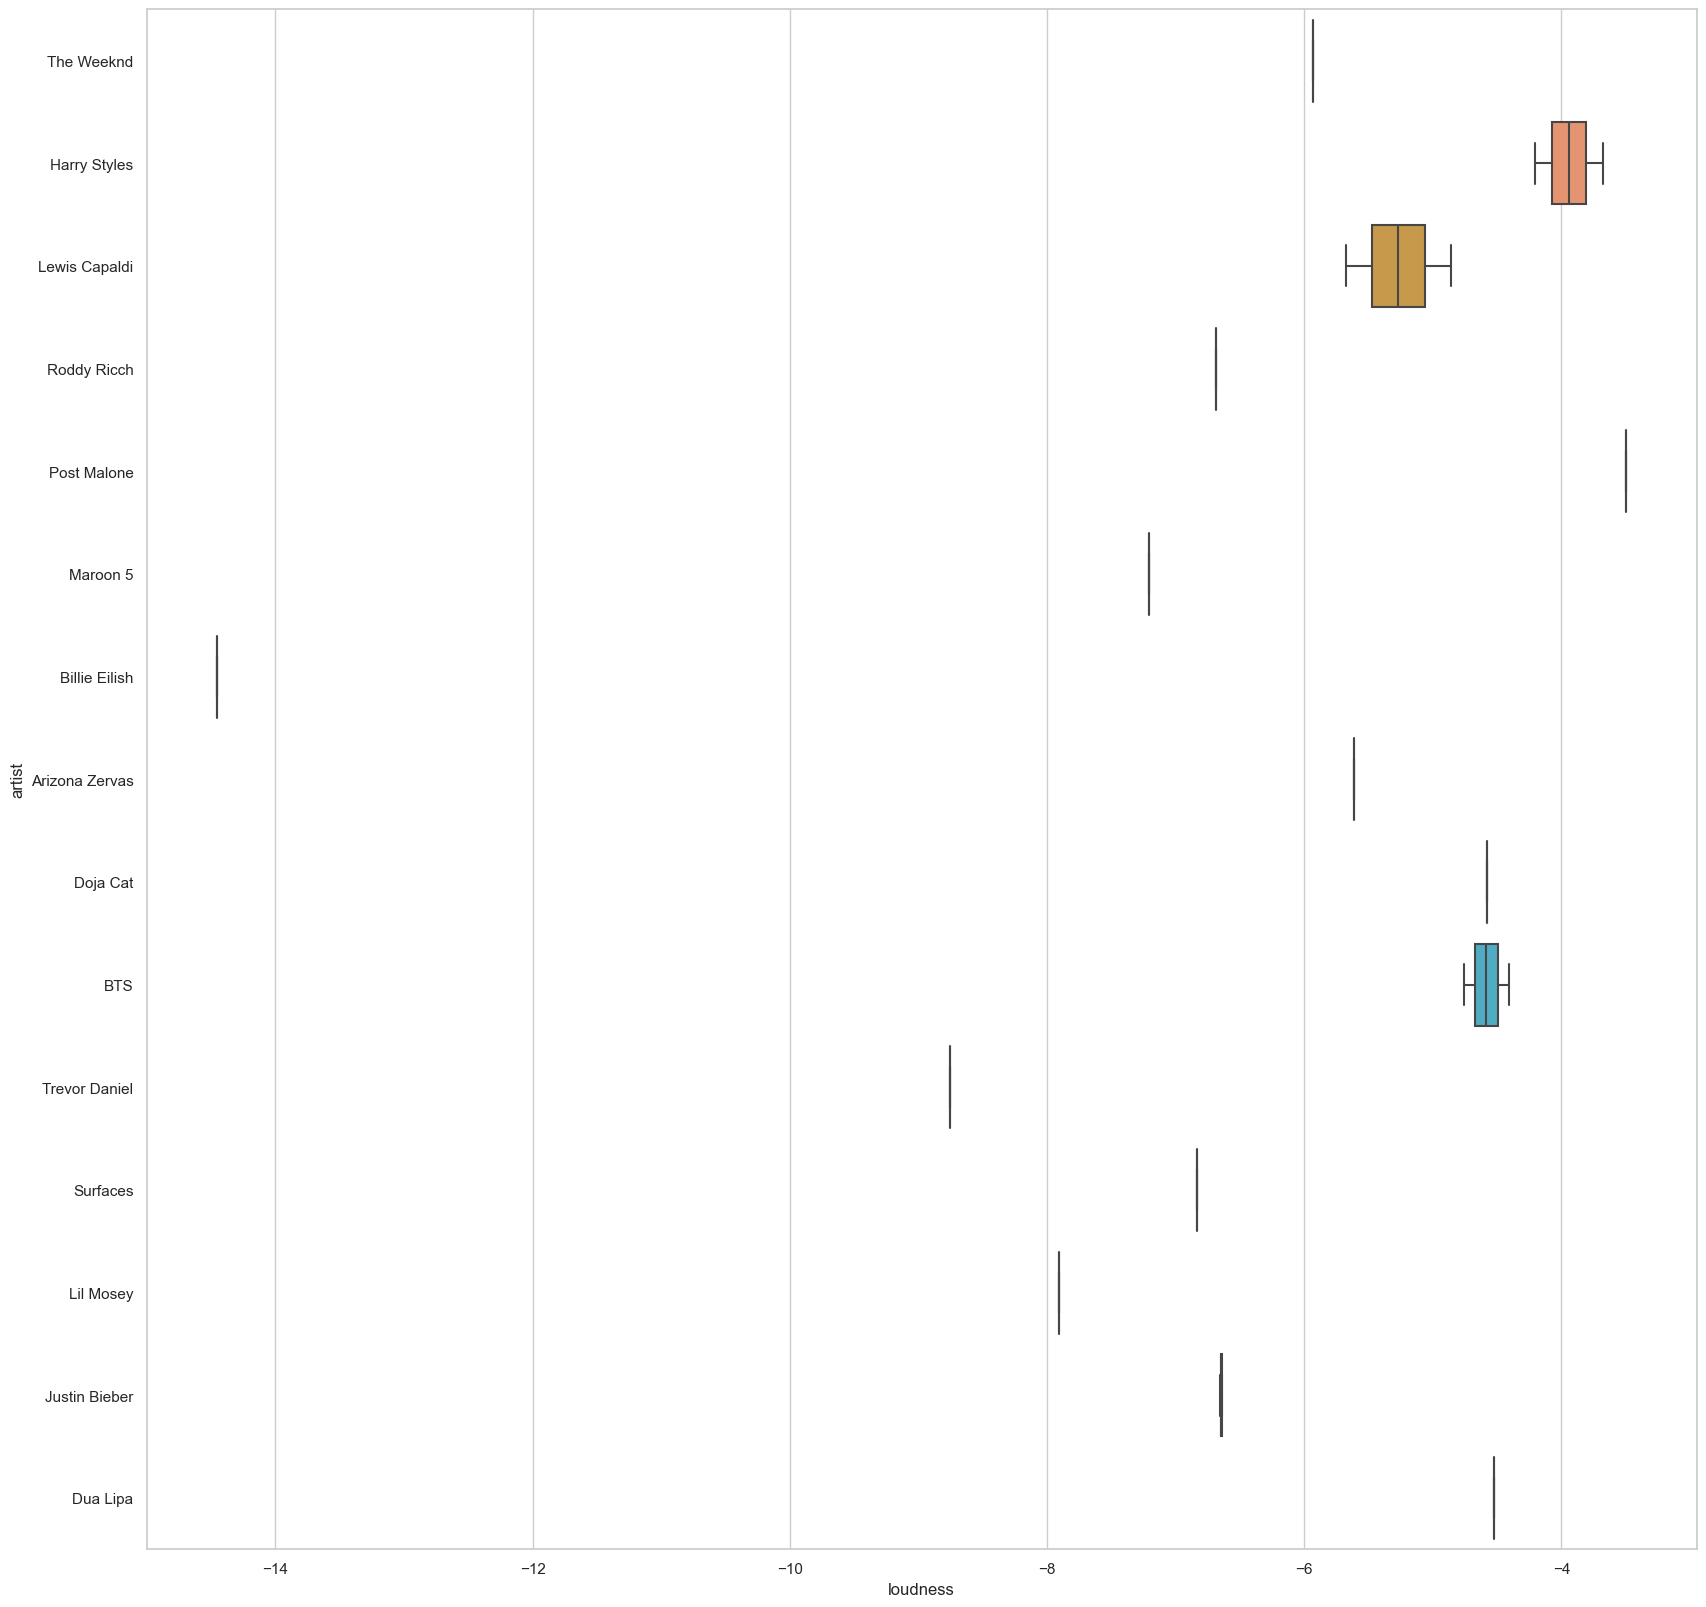

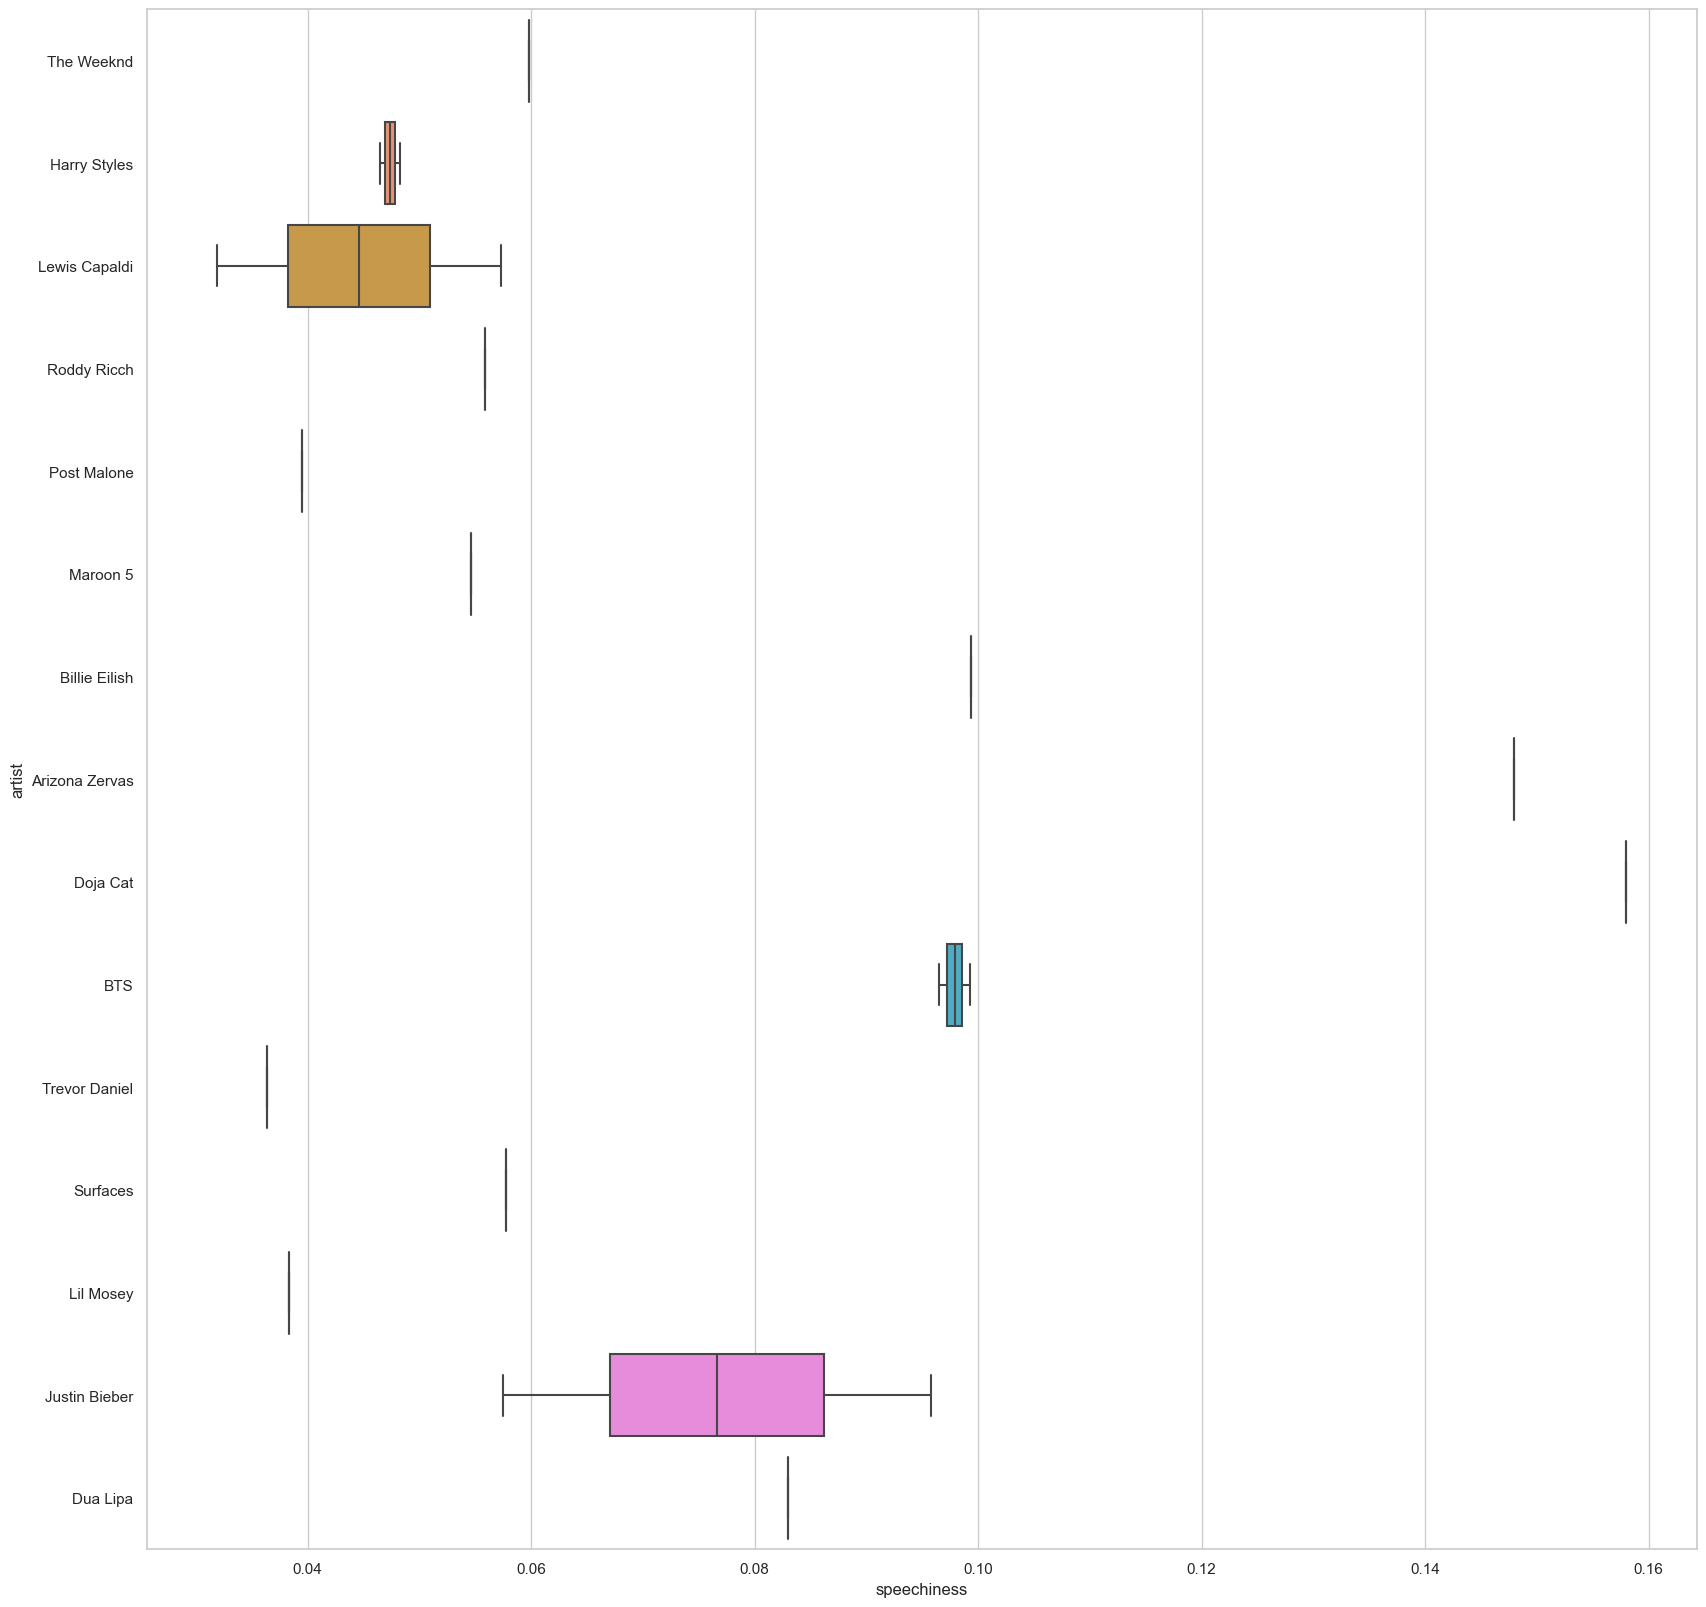

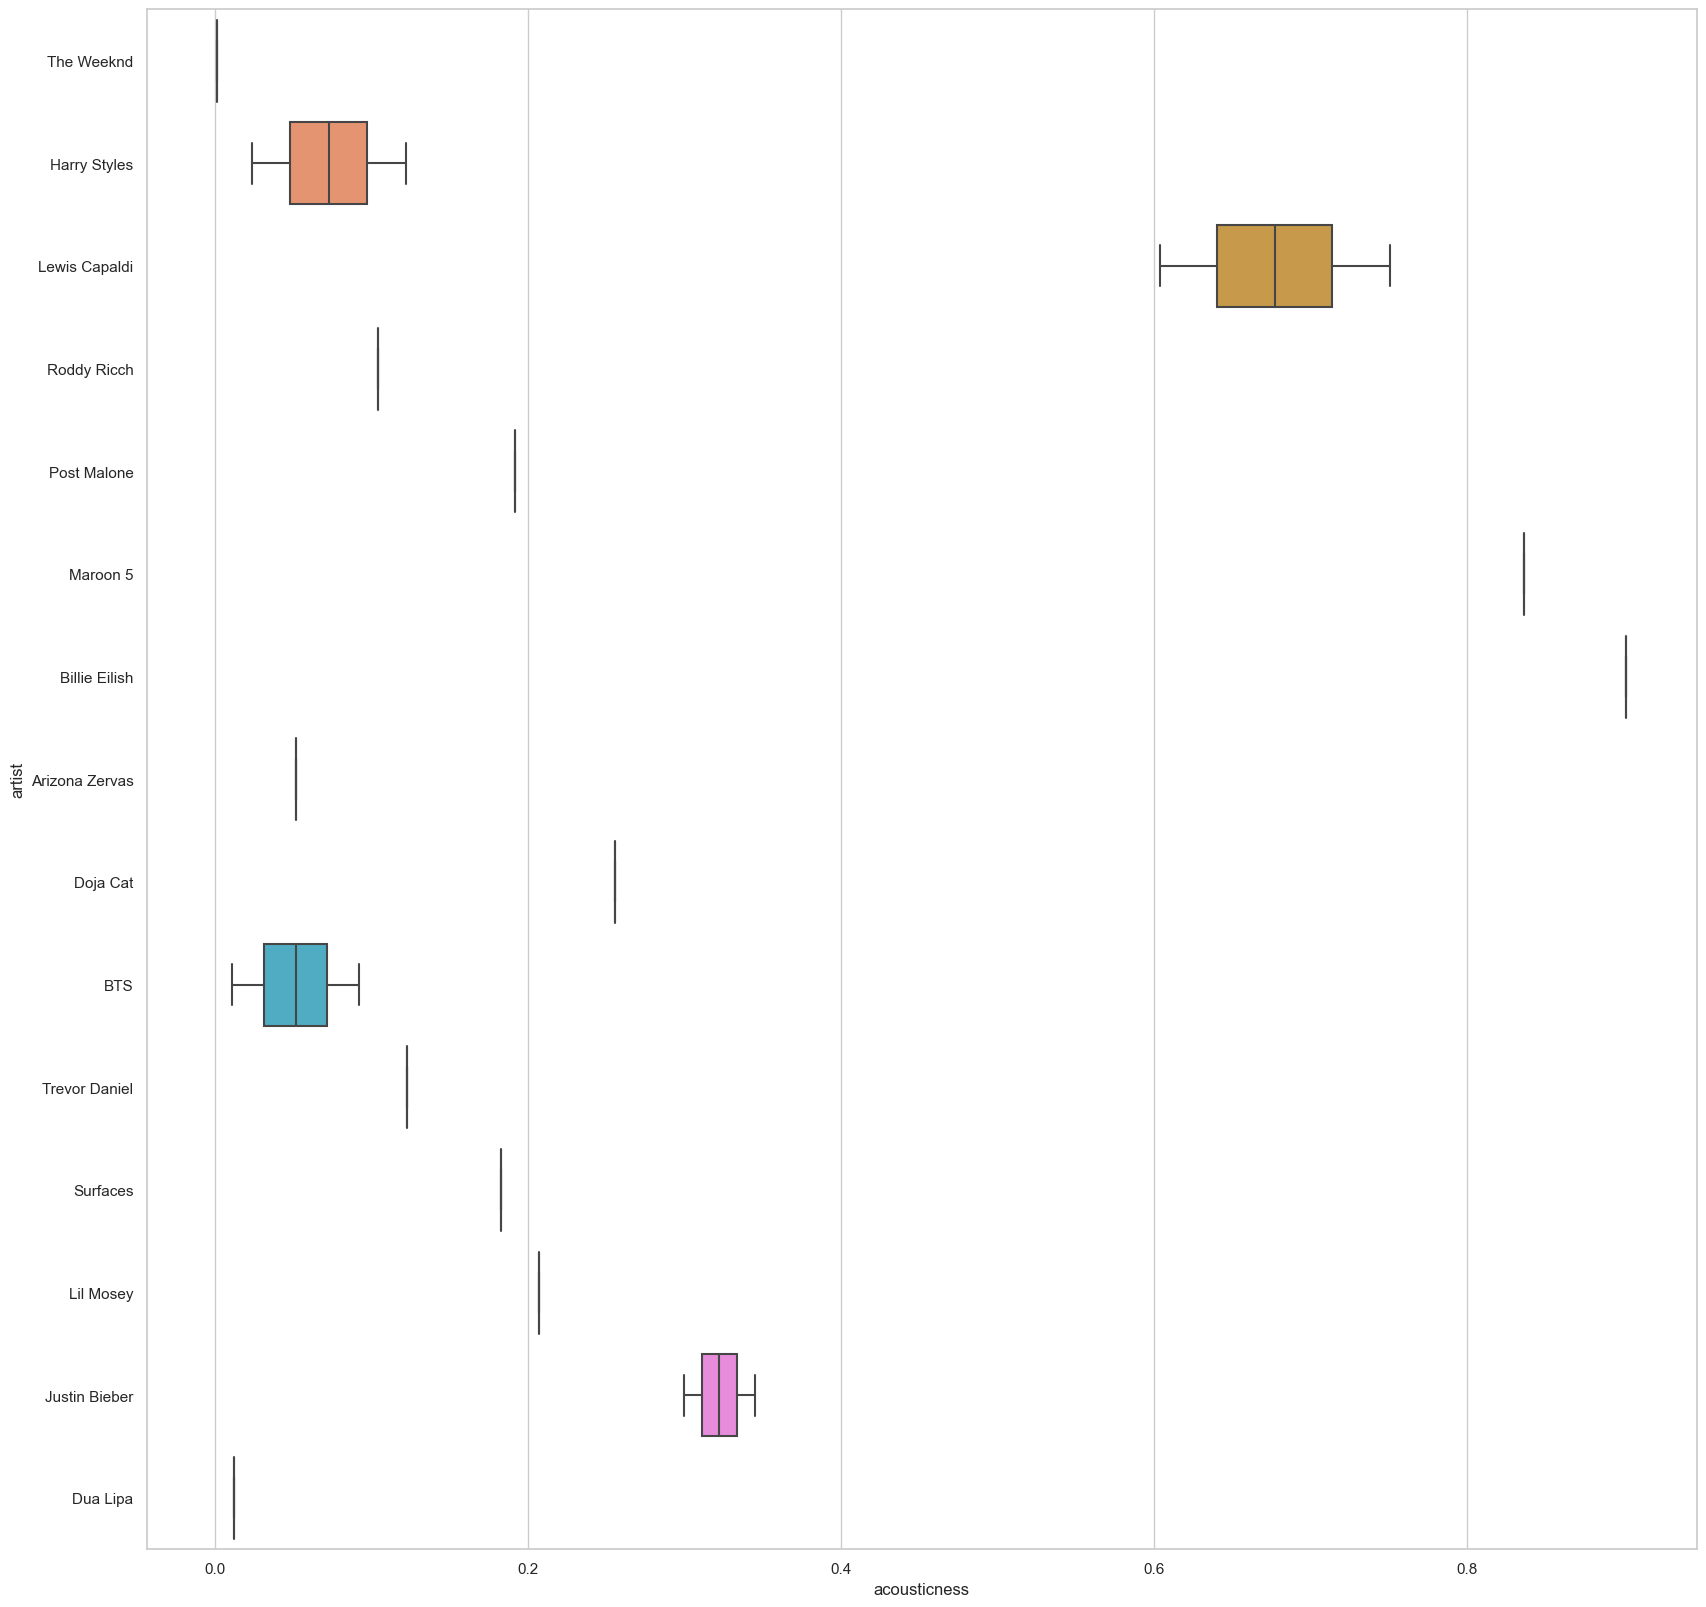

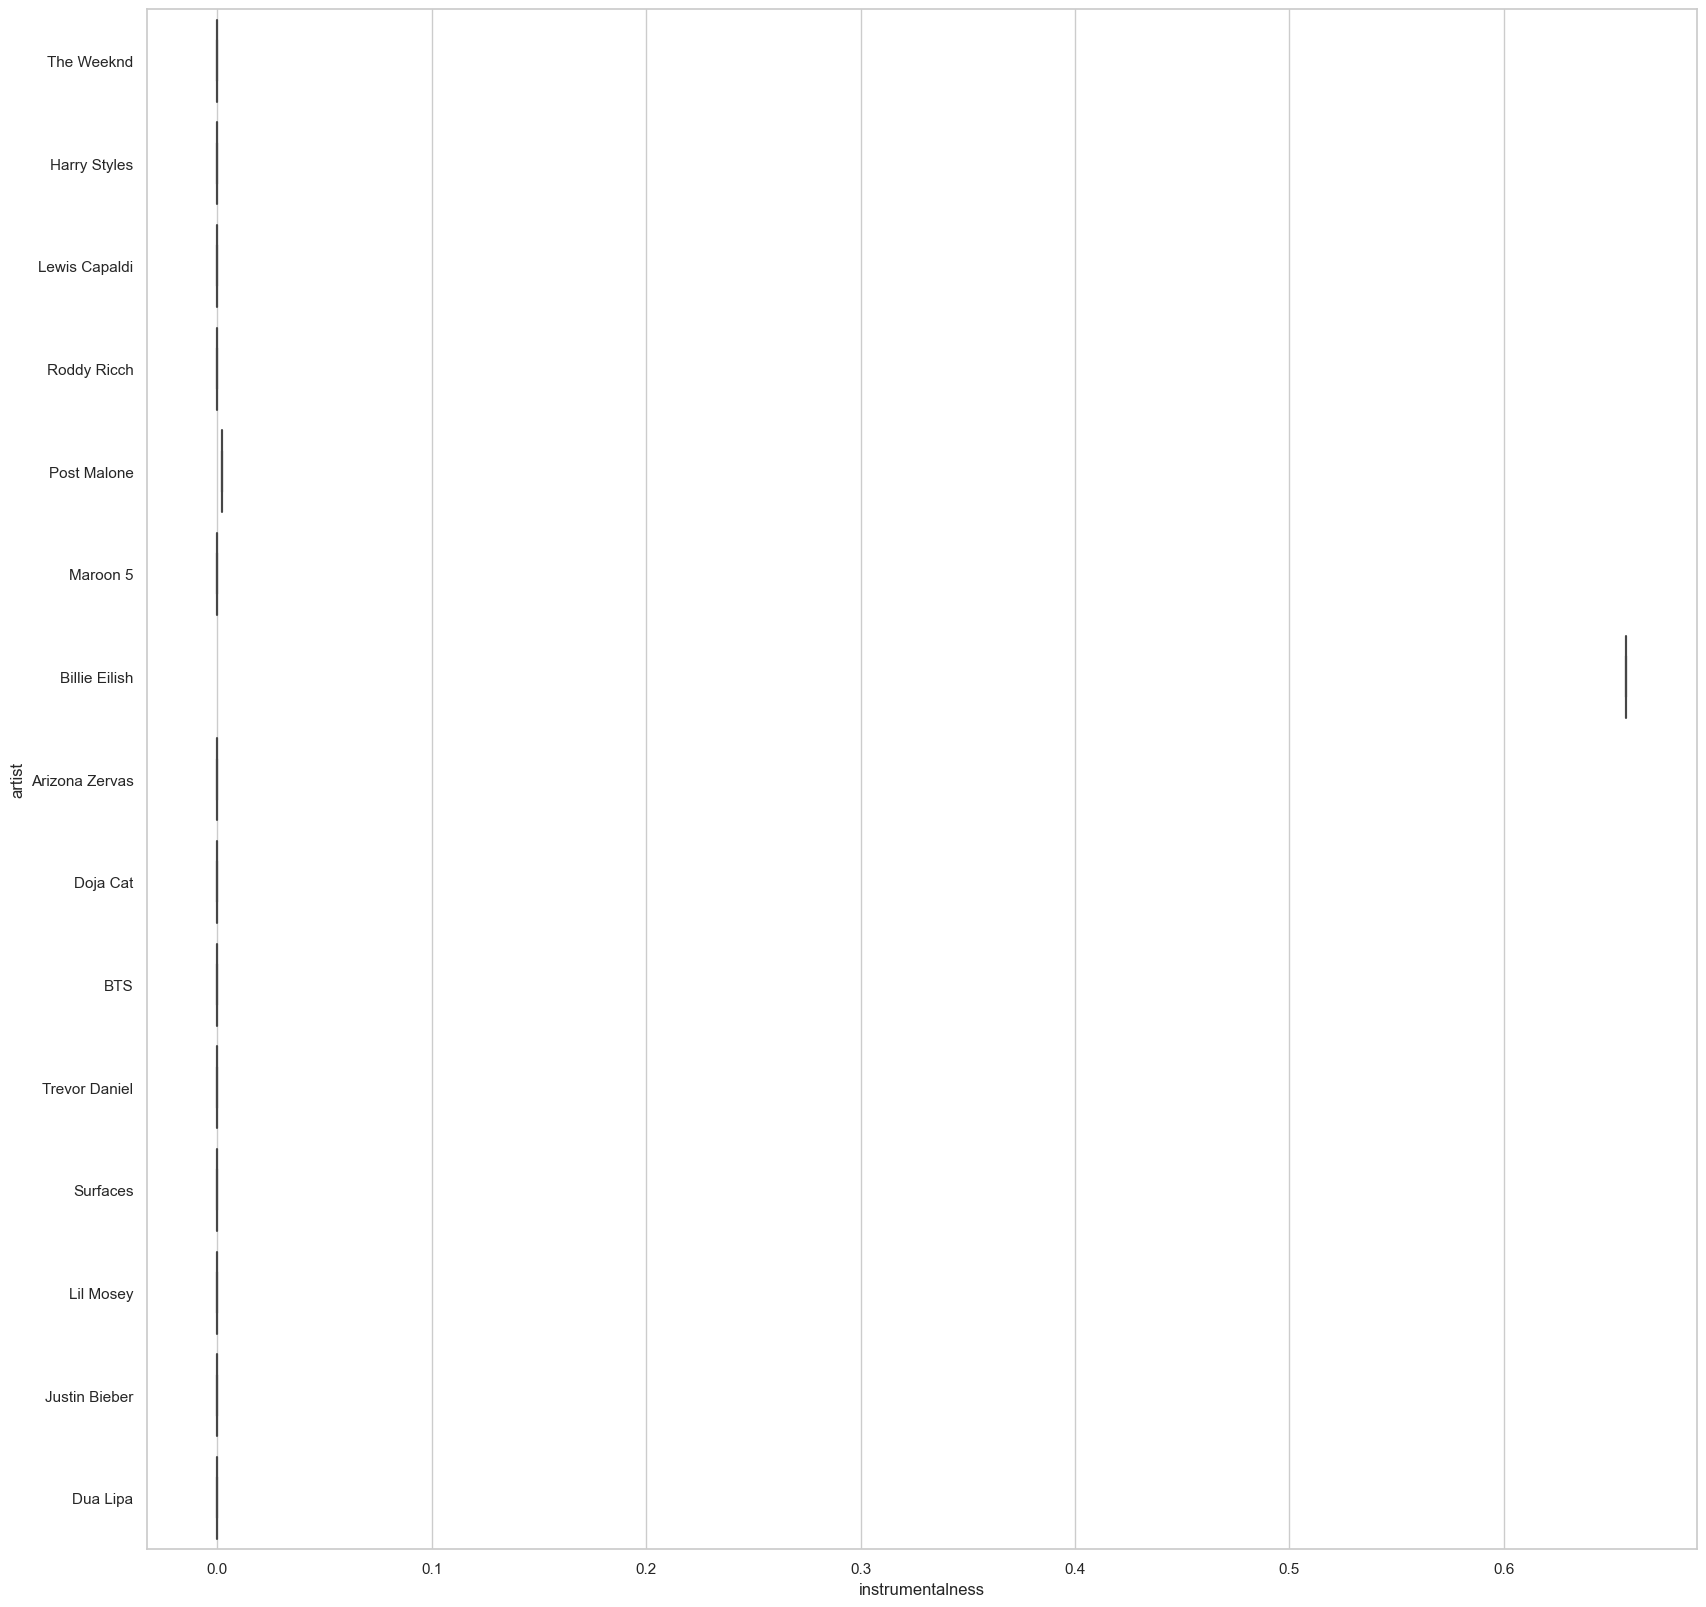

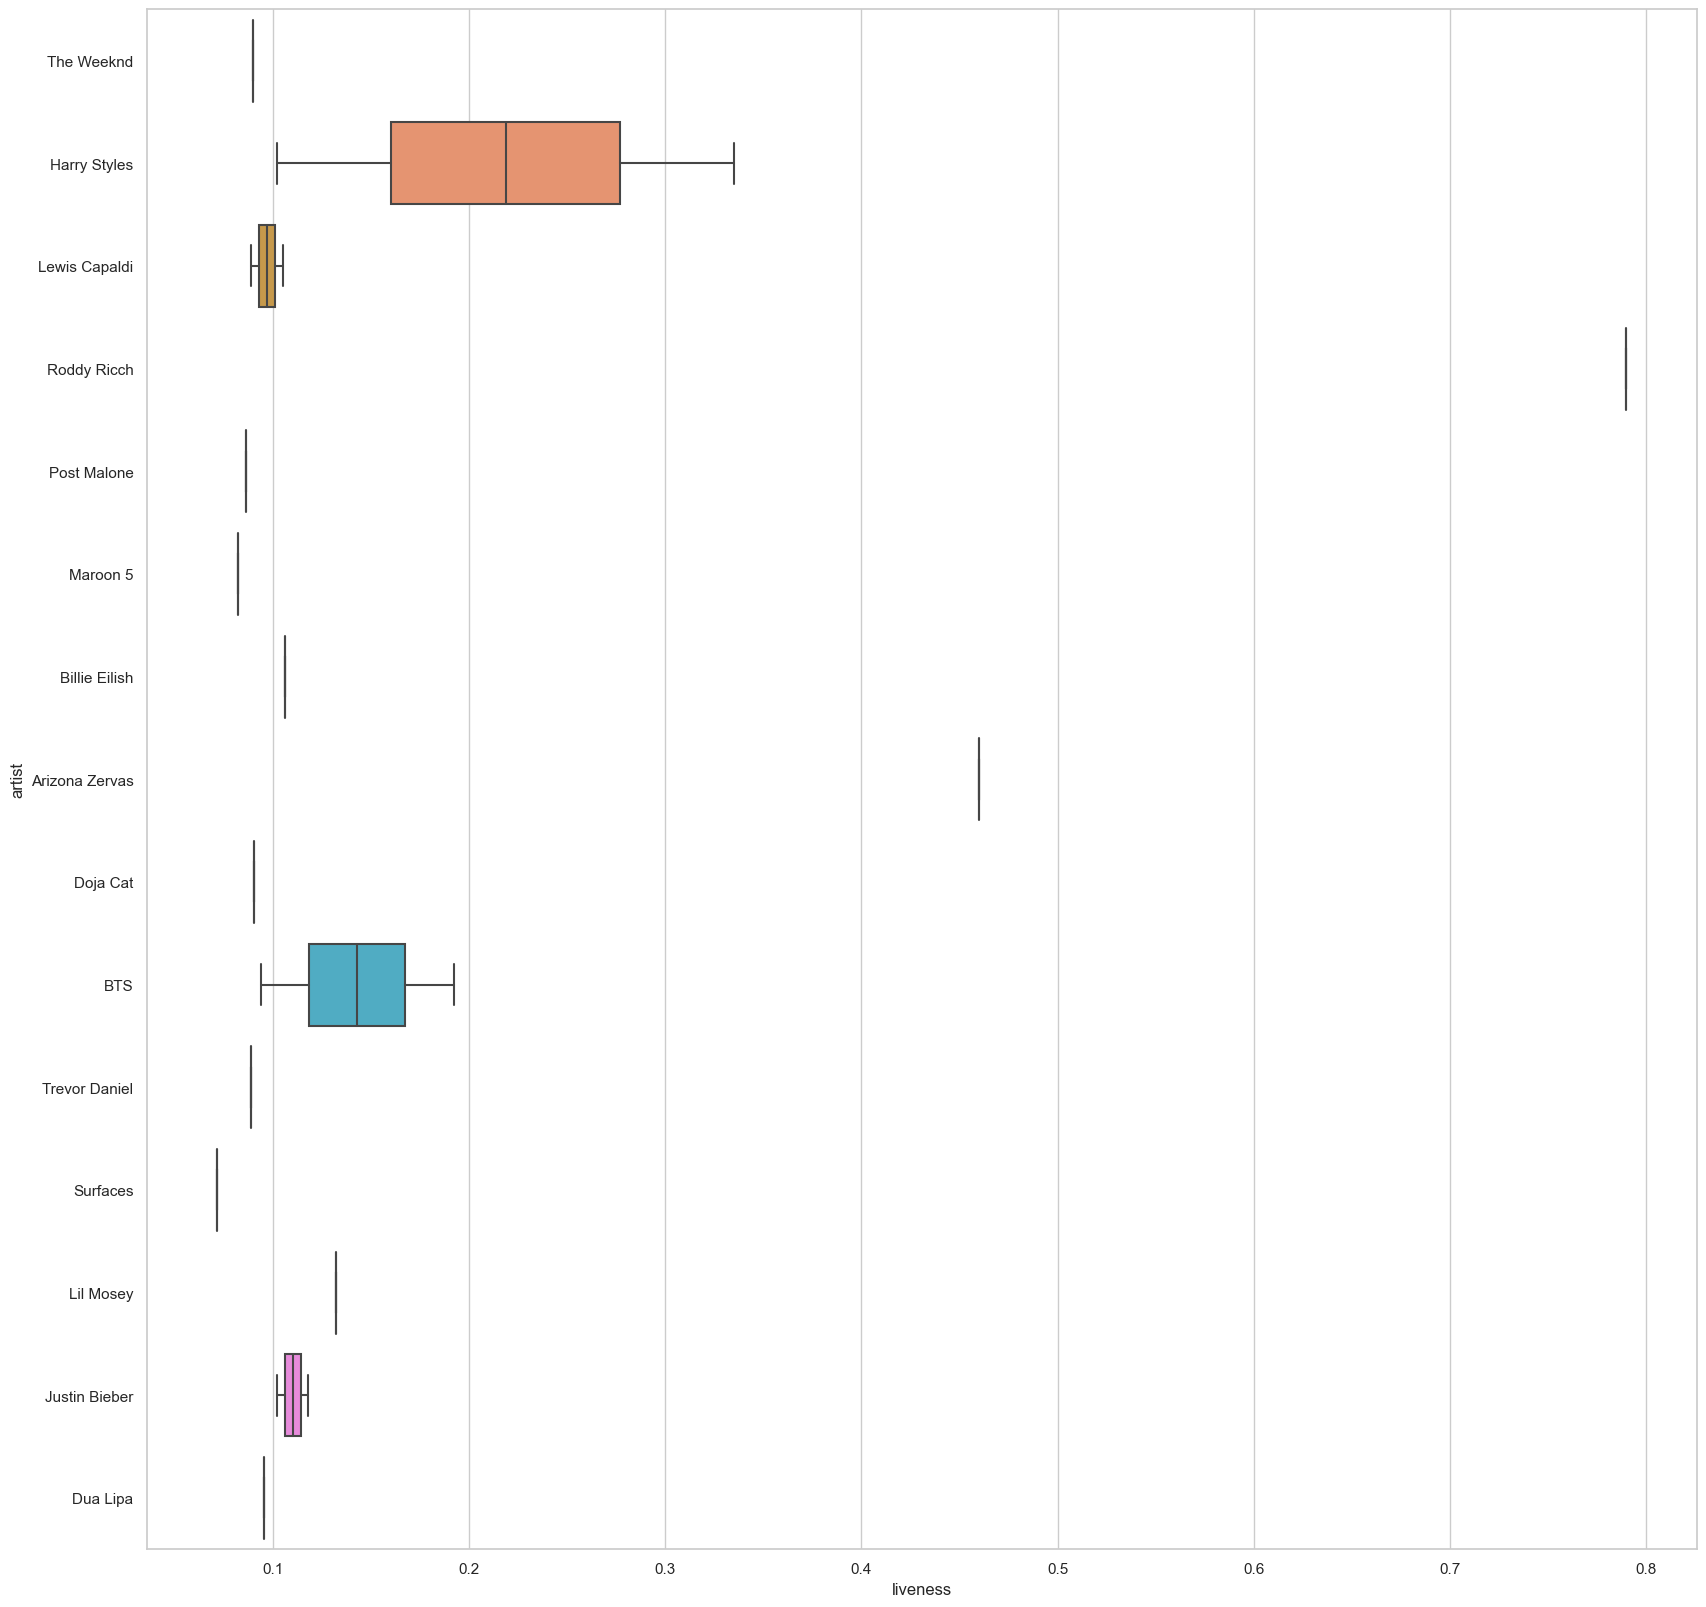

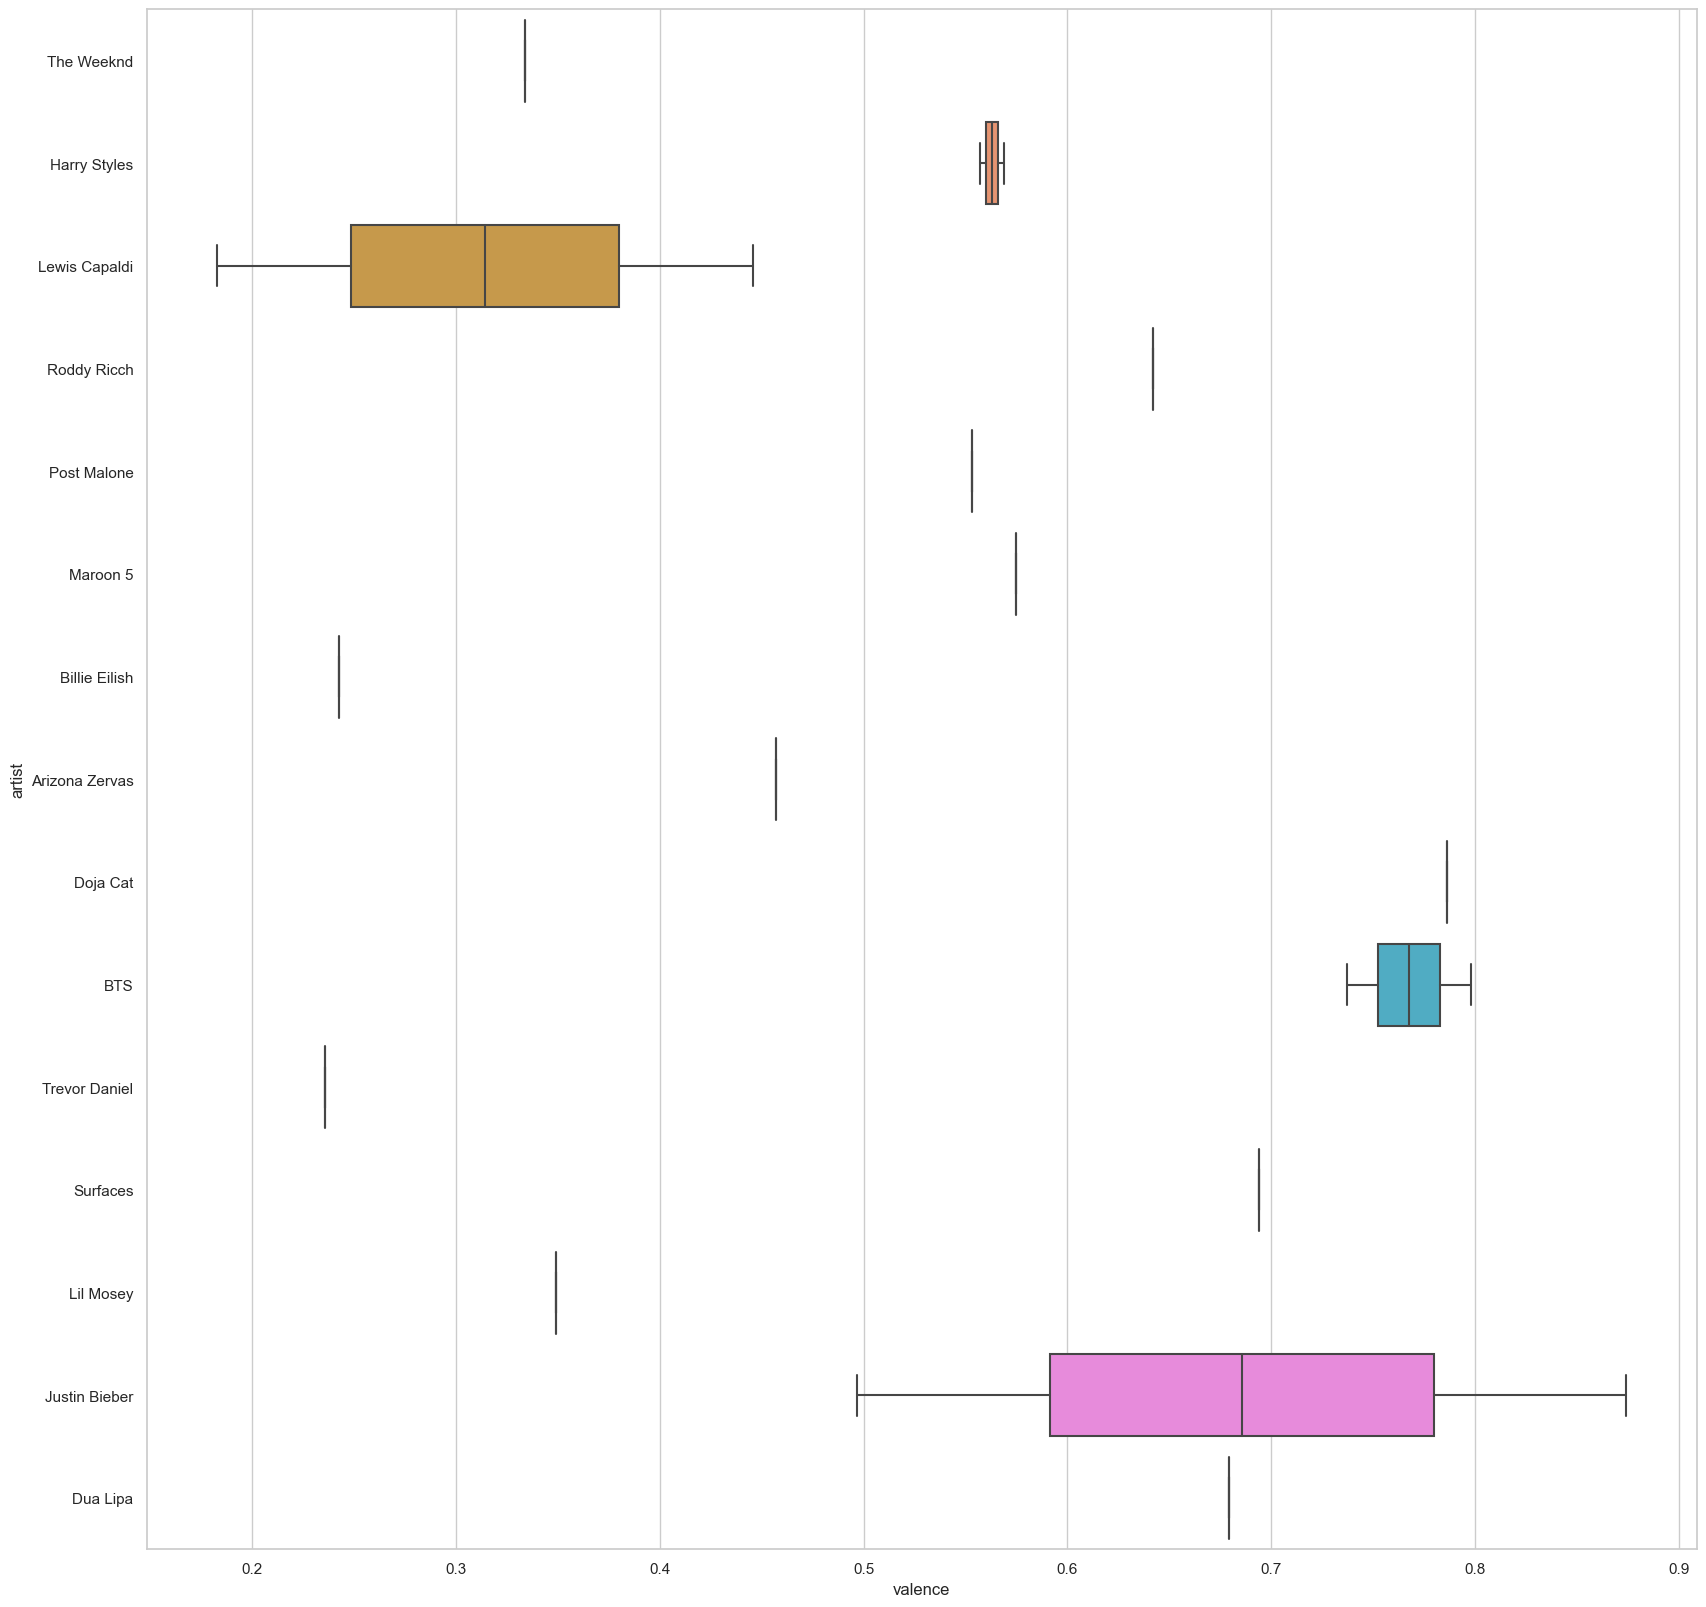

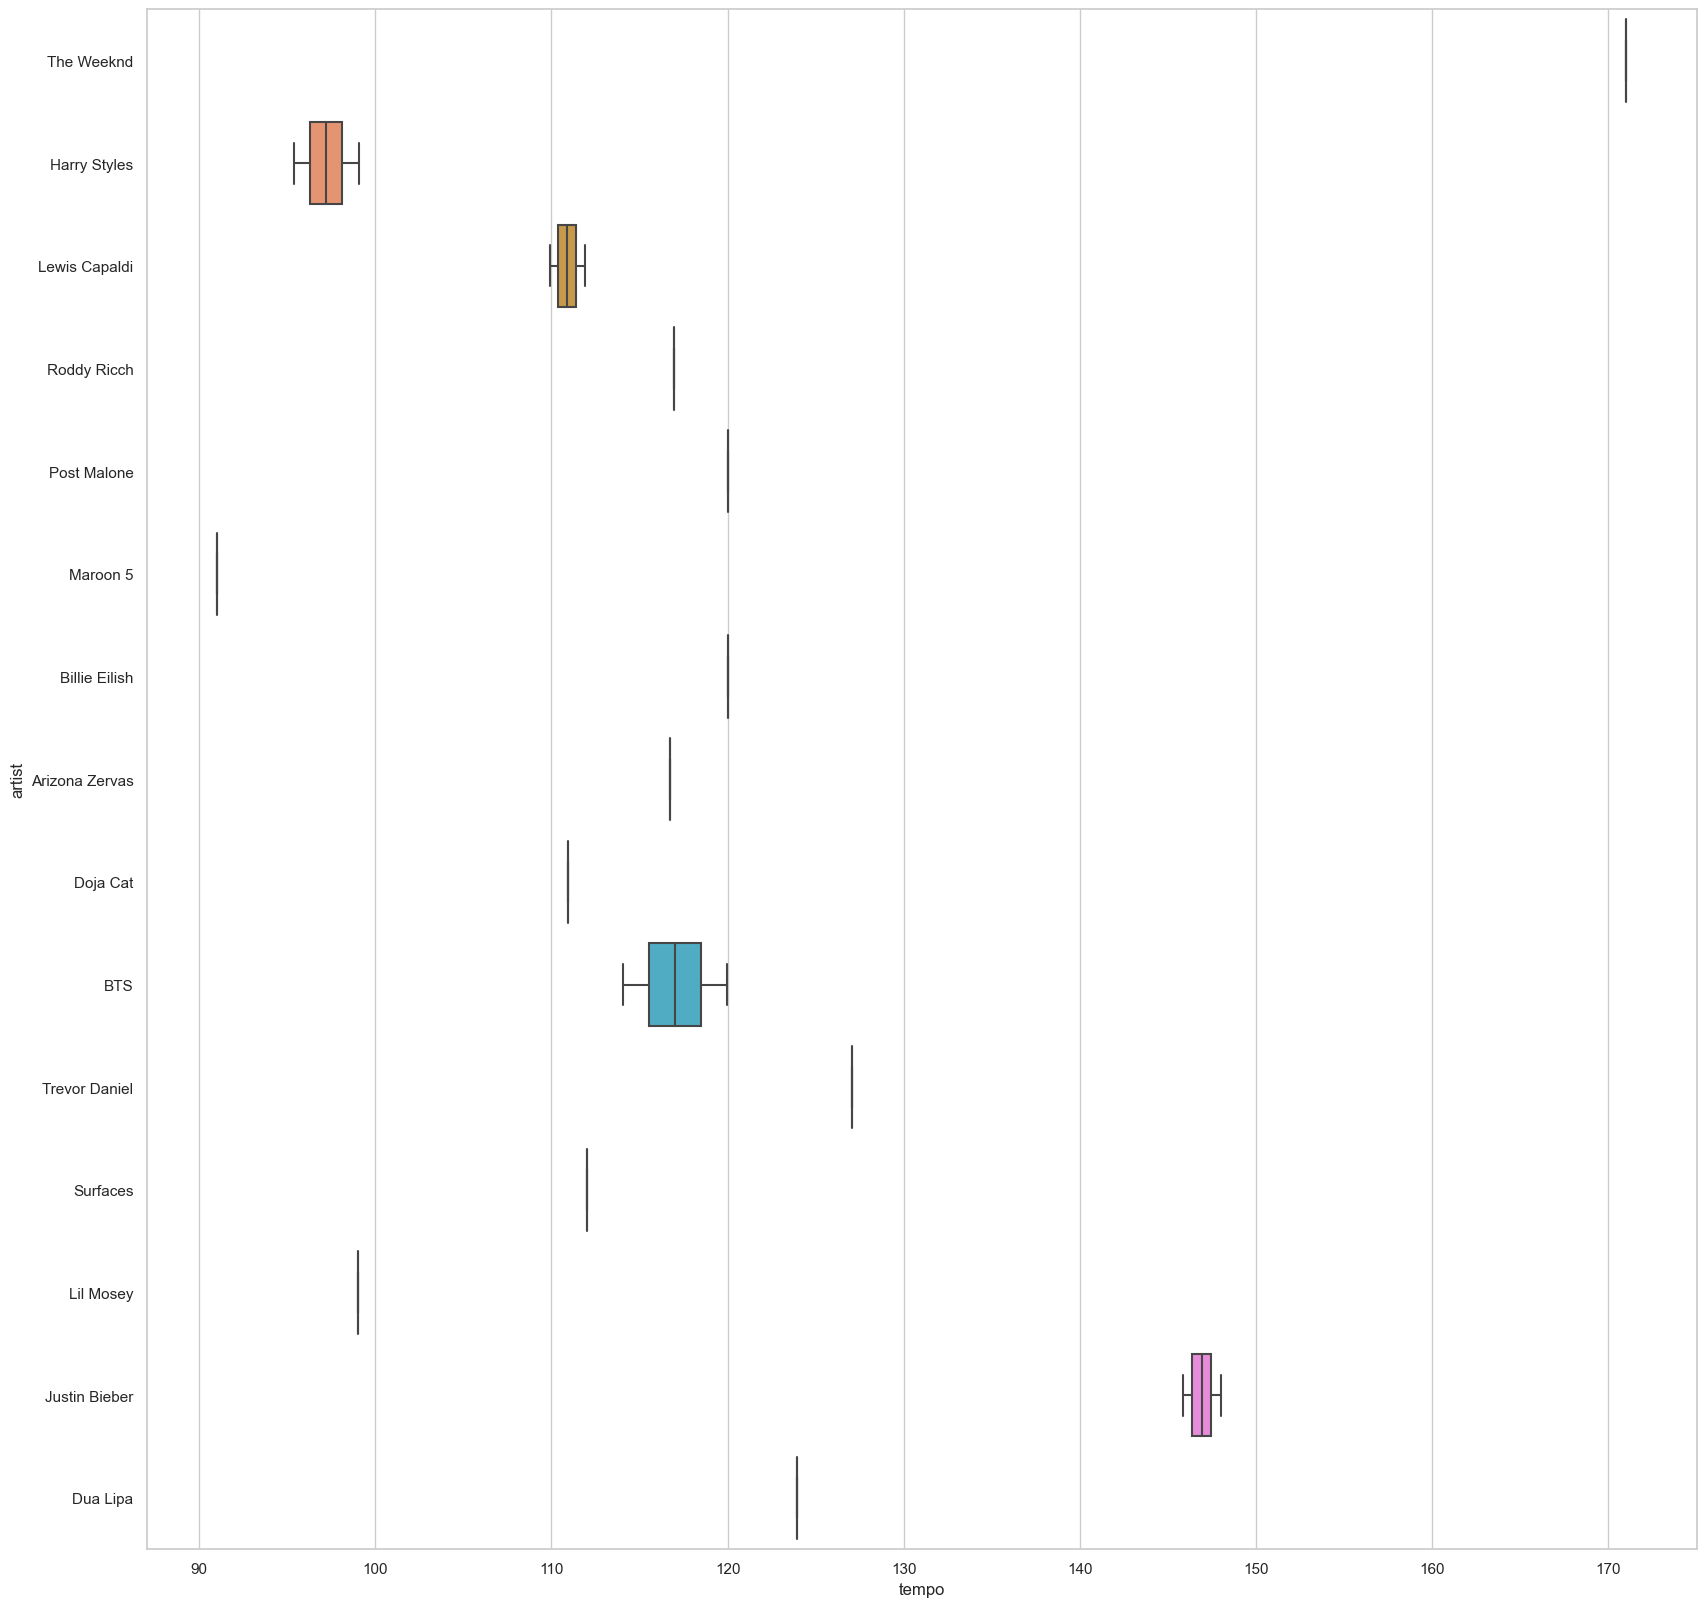

In [122]:
## Boxplot for Artists Composition pertaining to Audio Features

parameter = df_top10.select_dtypes(include=['int64', 'float']).columns
parameter

for i in parameter:
    plt.figure(figsize=(20,20))
    sns.boxplot(x=i, y='artist', data=df_top50)

Analysis

From the box plot, we can infer that the Spotify Audio Features do show some degree of accuracy.

For example BTS, featured prominently high on the energy feature - a signature of KPop itself.

One can also infer that Rap artist feature prominently on Speechiness

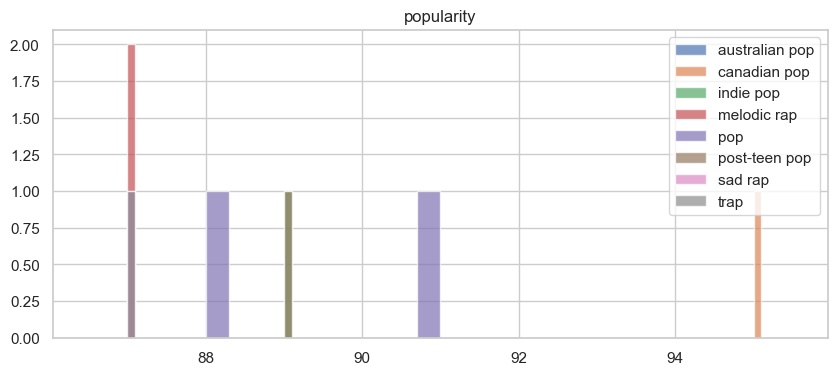

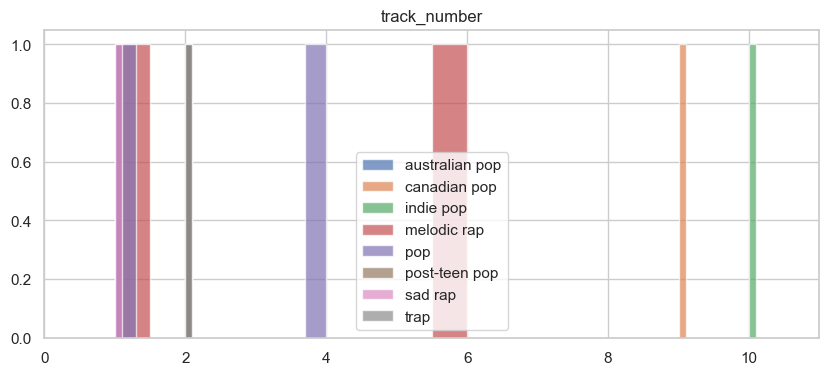

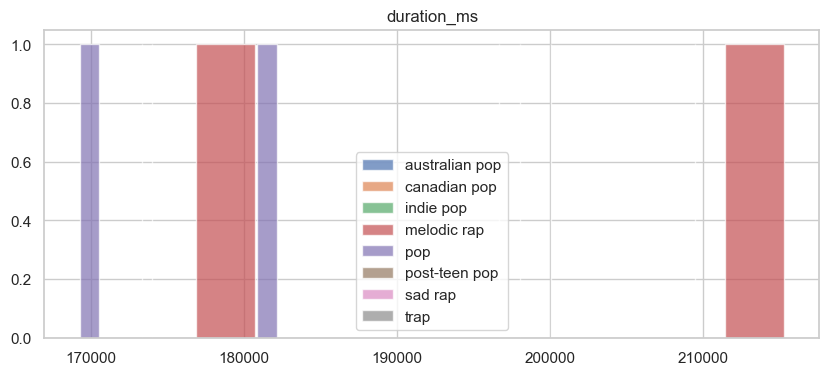

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

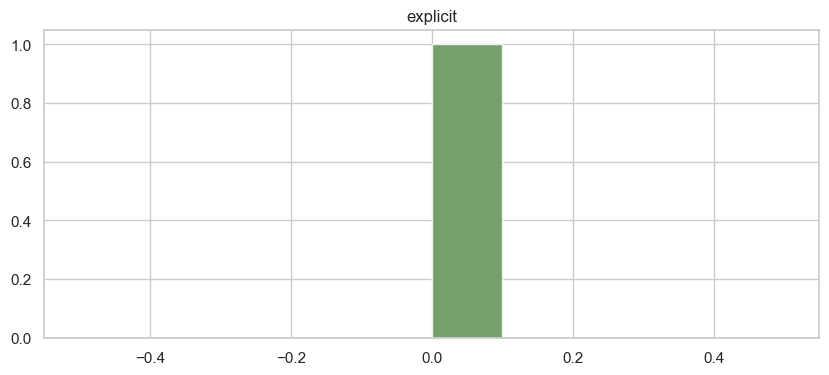

In [123]:
###Genres of Top 10 songs plotted against Audio Features


grouped_genre = df_top10.groupby('genre')
numeric = df_top10._get_numeric_data()

for col in numeric.columns:
    fig,ax = plt.subplots()
    
    for i, d in grouped_genre:
        d[col].hist(alpha=0.7, ax=ax, label=i,figsize=(10,4))
        ax.set_title(col)

    ax.legend()
    plt.show()

# Lyrics  Analysis using RegEx and NLTK


This section partly delves into the lyrics of top songs to seek out emerging themes that juxtapose with the contemporary zeitgeist.


In [ ]:
###Often words used in lyrics of top 50 tracks

from gensim.parsing.preprocessing import remove_stopwords
#Dropping rows where Lyrics are not available
df_top50 = df_top50[df_top50['lyrics'] != 'Unavailable']

words_often_used = remove_stopwords(str(df_top50['lyrics']))

In [ ]:
#REGEX


import re
#CLEANING THE DATA
def clean_data(data):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', data)
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    #RETURNING BACK THE ANSWER
    return processed_feature

In [58]:
#Getting Top 10 Artist Name from dataframe & Converting it to list so that we can iterate over it
artist_top = df_top10['artist'].to_list()
#Creating Empty list to save lyrics of all the artists
lyric_list = []
#Iterating length of artist_top time
for i in range(len(artist_top)):
    #If artist is present in df_top50,
    if df_top50[df_top50['artist']==artist_top[i]]['lyrics'].any():
        #Extract all the rows having the artist lyrics and save to val variable
            val = df_top50[df_top50['artist']==artist_top[i]]['lyrics']
            #Storing Artist Name
            artist = artist_top[i]
            #Creating list of list to store artist and his lyrics
            lyric_list.append([artist,val.to_list()])
            
#SAVING LYRICS PER VARIABLE NAMED as ARTIST NAME
THE_WEEKEND = lyric_list[0][1][0:]
THE_WEEKEND = THE_WEEKEND[0]

HARRY_STYLES = lyric_list[1][1][0:]
HARRY_STYLES = HARRY_STYLES[0]

LEWIS_CAPALDI = lyric_list[2][1][0:]
LEWIS_CAPALDI = LEWIS_CAPALDI[0]

RODDY_RICCH = lyric_list[3][1][0:]
RODDY_RICCH = RODDY_RICCH[0]

POST_MALONE = lyric_list[4][1][0:]
POST_MALONE = POST_MALONE[0]




#CLEANING THE DATA 
THE_WEEKEND = clean_data(THE_WEEKEND)
HARRY_STYLES = clean_data(HARRY_STYLES)
LEWIS_CAPALDI = clean_data(LEWIS_CAPALDI)
RODDY_RICCH = clean_data(RODDY_RICCH)
POST_MALONE = clean_data(POST_MALONE)


In [59]:
# For stopword removal
import nltk
nltk.download('stopwords')
# For tokenization
nltk.download('punkt')
from nltk.corpus import stopwords

# Return sentence after stopword removal
def remove_stop_words(data):
    # Adding multiple words to nltk stoplist
    stop = list(set(stopwords.words('english')))
    stop = stop+['verse', '1','chorus','2','3']
    ans = ' '.join([i for i in data.lower().split() if i not in stop])
    return ans

#REMOVING DUPLICATIONS
def remove_duplicate(data):
    splitted = data.split()
    mylist = list(dict.fromkeys(splitted))
    ans = ' '.join(mylist)
    return ans

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\barar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
#REMOVING STOP WORDS like Chorus, verse ,1 ,2 
THE_WEEKEND = remove_stop_words(THE_WEEKEND)
HARRY_STYLES = remove_stop_words(HARRY_STYLES)
LEWIS_CAPALDI = remove_stop_words(LEWIS_CAPALDI)
RODDY_RICCH = remove_stop_words(RODDY_RICCH)
POST_MALONE = remove_stop_words(POST_MALONE)

##Example of Cleaned Lyrical Dataset

#PRINTING ONE OF THE ABOVE
THE_WEEKEND

'intro yeah tryna call long enough maybe show love maybe going withdrawals even much turn touch baby pre look around sin city cold empty oh one around judge oh see clearly gone said ooh blinded lights sleep feel touch said ooh drowning night oh like one trust hey hey hey running time cause see sun light sky hit road overdrive baby oh pre city cold empty oh one around judge oh see clearly gone said ooh blinded lights sleep feel touch said ooh drowning night oh like one trust bridge calling back let know back let know could never say phone say phone never let go time ooh said ooh blinded lights sleep feel touch hey hey hey hey hey hey outro said ooh blinded lights sleep feel touch'

Freq of Words

C:\Users\barar\AppData\Local\Temp\ipykernel_11356\3290431755.py:35: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



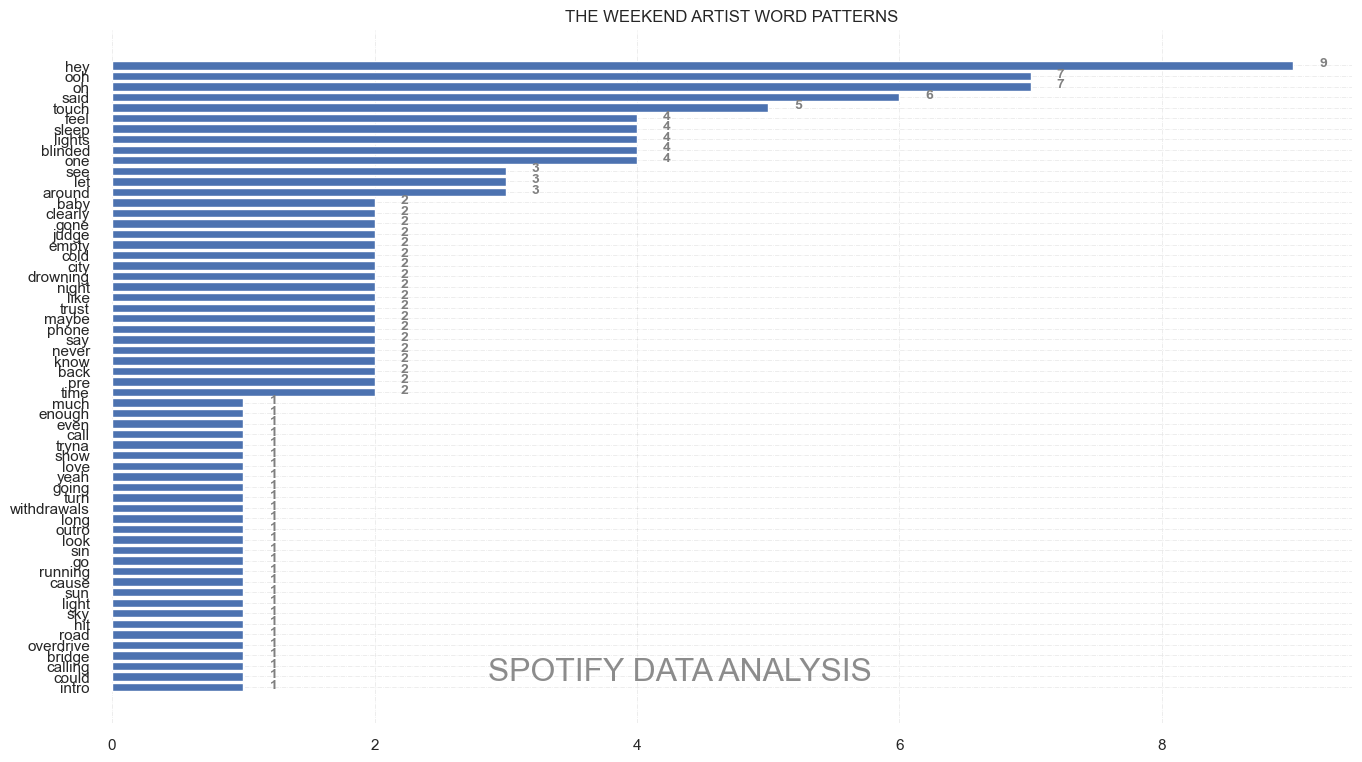

In [61]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#THE WEEKEND WORD PATTERNS
sp = THE_WEEKEND.split()
counts = Counter(sp)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(labels, values) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
    # Add Plot Title 
ax.set_title('THE WEEKEND ARTIST WORD PATTERNS', 
             loc ='center', ) 
  
# Add Text watermark 
fig.text(0.6, 0.15, 'SPOTIFY DATA ANALYSIS', fontsize = 23, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.9) 
  
# Show Plot 
plt.show()

C:\Users\barar\AppData\Local\Temp\ipykernel_11356\559704967.py:31: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



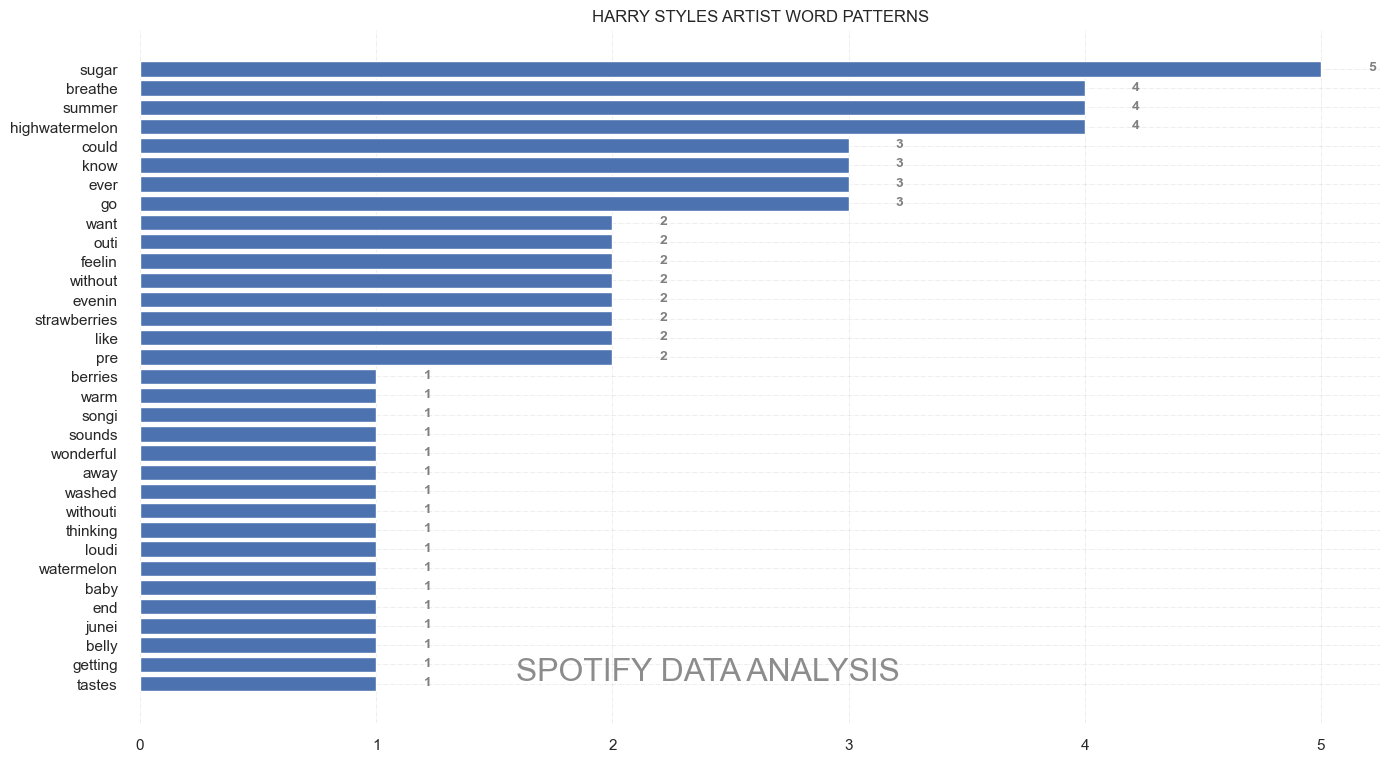

In [62]:
#HARRY STYLE WORD PATTERNS
sp = HARRY_STYLES.split()
counts = Counter(sp)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(labels, values) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
    # Add Plot Title 
ax.set_title('HARRY STYLES ARTIST WORD PATTERNS', 
             loc ='center', ) 
  
# Add Text watermark 
fig.text(0.6, 0.15, 'SPOTIFY DATA ANALYSIS', fontsize = 23, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.9) 
  
# Show Plot 
plt.show()

C:\Users\barar\AppData\Local\Temp\ipykernel_11356\2851056074.py:31: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



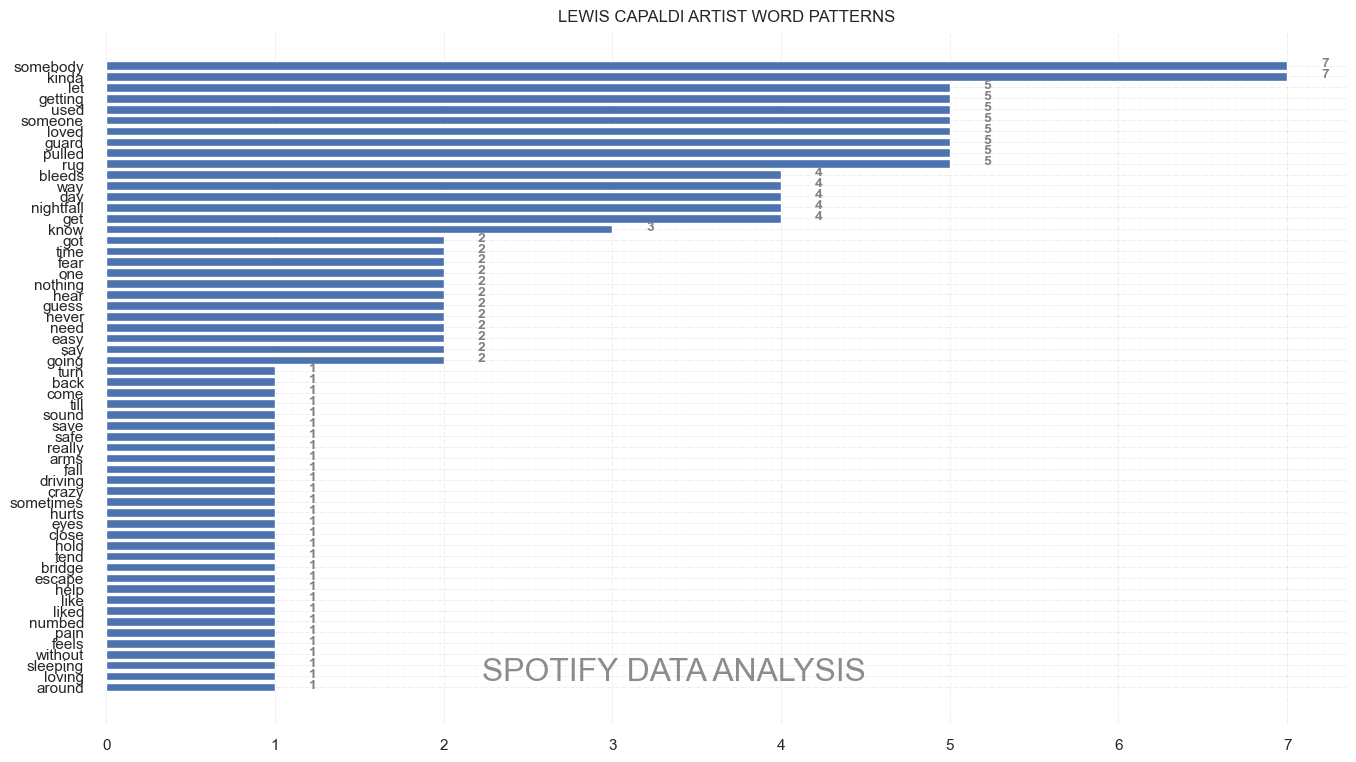

In [63]:
###LEWIS_CAPALDI PATTERNS
sp = LEWIS_CAPALDI.split()
counts = Counter(sp)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(labels, values) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
    # Add Plot Title 
ax.set_title('LEWIS CAPALDI ARTIST WORD PATTERNS', 
             loc ='center', ) 
  
# Add Text watermark 
fig.text(0.6, 0.15, 'SPOTIFY DATA ANALYSIS', fontsize = 23, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.9) 
  
# Show Plot 
plt.show()